# GO term and KEGG analysis for featureCounts data
alpha = 0.05, lfcThreshold = 1, altHypothesis = 'greaterAbs'

In [4]:
# loading libraries
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)
library(httr)

## unfiltered DESeq KEGG analysis
still looking at significantly differentially methylated genes for phase 1 warm vs. control, but now genes get assigned NA for adjusted p-values *only* when the gene has low counts (so this now includes outliers, instead of assigning outliers NA), therefore, different genes will be kept in the analysis for enriched pathways

- lfcThreshold = 0.25
- lfc_shrink normal
- cooksCutoff = FALSE
- independentFiltering = FALSE

#### **phase 1 warm vs. control**

In [5]:
# load in data frame
#unfiltered_p1wc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/unfiltered_lfc_p1wc.csv')

# using a diff df - this one is unfiltered, lfcThreshold=0.25, lfc_shrink = normal
unfiltered_p1wc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1wc_lfc25_genes.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p1wc, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

gene      lfc        padj     
1 111120752  0.5117345        NA
2 111109452  1.0072548        NA
3 111124802  0.4591660 1.0000000
4 111101273  0.4055670 1.0000000
5 111101250 -0.6027753 0.6036878
6 111101262  0.1674635 1.0000000

In [6]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

111116233 111128351 111111687 111136151 111127409 111133219 
 4.846533  4.571313  4.519728  4.399718  4.252964  4.031328

[1] "numeric"

In [7]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.05% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [8]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

ID       Description                             setSize
cvn00053 cvn00053 Ascorbate and aldarate metabolism        12    
cvn00910 cvn00910 Nitrogen metabolism                      10    
cvn00052 cvn00052 Galactose metabolism                     21    
cvn00511 cvn00511 Other glycan degradation                 37    
cvn03015 cvn03015 mRNA surveillance pathway                61    
cvn04814 cvn04814 Motor proteins                          111    
cvn00592 cvn00592 alpha-Linolenic acid metabolism          11    
cvn03250 cvn03250 Viral life cycle                         28    
cvn00071 cvn00071 Fatty acid degradation                   38    
cvn03013 cvn03013 Nucleocytoplasmic transport              92    
cvn00380 cvn00380 Tryptophan metabolism                    31    
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  18    
cvn04310 cvn04310 Wnt signaling pathway                    68    
cvn04144 cvn04144 Endocytosis                             132    
cvn03060 cvn03060 Protein export                           17    
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00053  0.7513381       1.644179 0.004279062 0.1926919 0.1693074 2374
cvn00910  0.7751841       1.629640 0.006272156 0.1926919 0.1693074 1398
cvn00052  0.6484812       1.590214 0.007562782 0.1926919 0.1693074 2261
cvn00511  0.5917499       1.574001 0.009554972 0.1926919 0.1693074 2221
cvn03015  0.5361300       1.527401 0.008054637 0.1926919 0.1693074 1968
cvn04814  0.4825362       1.453000 0.005160817 0.1926919 0.1693074 1179
cvn00592  0.7377666       1.599046 0.019359731 0.2513728 0.2208669 1602
cvn03250  0.6023539       1.553602 0.015899023 0.2513728 0.2208669 2628
cvn00071  0.5657277       1.508951 0.017203101 0.2513728 0.2208669 3018
cvn03013  0.4748788       1.408146 0.020774608 0.2513728 0.2208669 3059
cvn00380  0.5838480       1.531461 0.027446931 0.2620561 0.2302537 2374
cvn01040  0.6354291       1.519626 0.027148482 0.2620561 0.2302537 1602
cvn04310  0.4841371       1.400270 0.030320543 0.2620561 0.2302537 3740
cvn04144  0.4453777       1.351071 0.028673442 0.2620561 0.2302537 3185
cvn03060 -0.5120851      -1.568248 0.041033373 0.2974503 0.2613526 2375
         leading_edge                  
cvn00053 tags=58%, list=18%, signal=48%
cvn00910 tags=50%, list=10%, signal=45%
cvn00052 tags=38%, list=17%, signal=32%
cvn00511 tags=30%, list=16%, signal=25%
cvn03015 tags=36%, list=15%, signal=31%
cvn04814 tags=18%, list=9%, signal=17% 
cvn00592 tags=45%, list=12%, signal=40%
cvn03250 tags=46%, list=19%, signal=37%
cvn00071 tags=42%, list=22%, signal=33%
cvn03013 tags=34%, list=23%, signal=26%
cvn00380 tags=42%, list=18%, signal=35%
cvn01040 tags=33%, list=12%, signal=29%
cvn04310 tags=44%, list=28%, signal=32%
cvn04144 tags=33%, list=24%, signal=25%
cvn03060 tags=41%, list=18%, signal=34%
         core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                              
cvn00053 111124535/111103451/111124599/111127562/111112920/111115614/111103498                                                                                                                                                                                                                                                                                                                                                                        
cvn00910 111134700/111100398/111100399/111126492/111135592                                                                                                                                                                                                                                 

In [9]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

ID       Description                       setSize enrichmentScore
cvn00053 cvn00053 Ascorbate and aldarate metabolism  12     0.7513381      
cvn00910 cvn00910 Nitrogen metabolism                10     0.7751841      
cvn00052 cvn00052 Galactose metabolism               21     0.6484812      
cvn00511 cvn00511 Other glycan degradation           37     0.5917499      
cvn03015 cvn03015 mRNA surveillance pathway          61     0.5361300      
cvn04814 cvn04814 Motor proteins                    111     0.4825362      
         NES      pvalue      p.adjust  qvalue    rank
cvn00053 1.644179 0.004279062 0.1926919 0.1693074 2374
cvn00910 1.629640 0.006272156 0.1926919 0.1693074 1398
cvn00052 1.590214 0.007562782 0.1926919 0.1693074 2261
cvn00511 1.574001 0.009554972 0.1926919 0.1693074 2221
cvn03015 1.527401 0.008054637 0.1926919 0.1693074 1968
cvn04814 1.453000 0.005160817 0.1926919 0.1693074 1179
         leading_edge                  
cvn00053 tags=58%, list=18%, signal=48%
cvn00910 tags=50%, list=10%, signal=45%
cvn00052 tags=38%, list=17%, signal=32%
cvn00511 tags=30%, list=16%, signal=25%
cvn03015 tags=36%, list=15%, signal=31%
cvn04814 tags=18%, list=9%, signal=17% 
         core_enrichment                                                                                                                                                                                                            
cvn00053 111124535/111103451/111124599/111127562/111112920/111115614/111103498                                                                                                                                                      
cvn00910 111134700/111100398/111100399/111126492/111135592                                                                                                                                                                          
cvn00052 111101197/111118471/111101820/111113388/111109442/111099882/111120703/111118006                                                                                                                                            
cvn00511 111106921/111106925/111106928/111119851/111119435/111120040/111113388/111119434/111106926/111119431/111106930                                                                                                              
cvn03015 111135039/111127981/111101410/111100273/111134286/111121238/111129219/111132883/111122880/111118318/111103910/111119442/111126090/111138352/111108043/111130886/111118849/111136672/111104361/111129063/111135694/111129838
cvn04814 111136151/111134768/111107338/111102596/111112439/111103394/111115784/111129526/111107250/111127380/111134843/111137068/111131563/111119946/111134888/111120500/111129376/111130940/111125250/111131555

In [10]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/pathways_p1wc.csv')

In [11]:
options(repr.plot.width=10, repr.plot.height=10)

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


```
# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```

**adding pathway meta data to data frame**

```
# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))
```

now need to **clean up data frame**

```
df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)
```

```
# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p1wc_lfc25_kegg_pathway.csv')
```

In [12]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1wc_lfc25_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [13]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [14]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

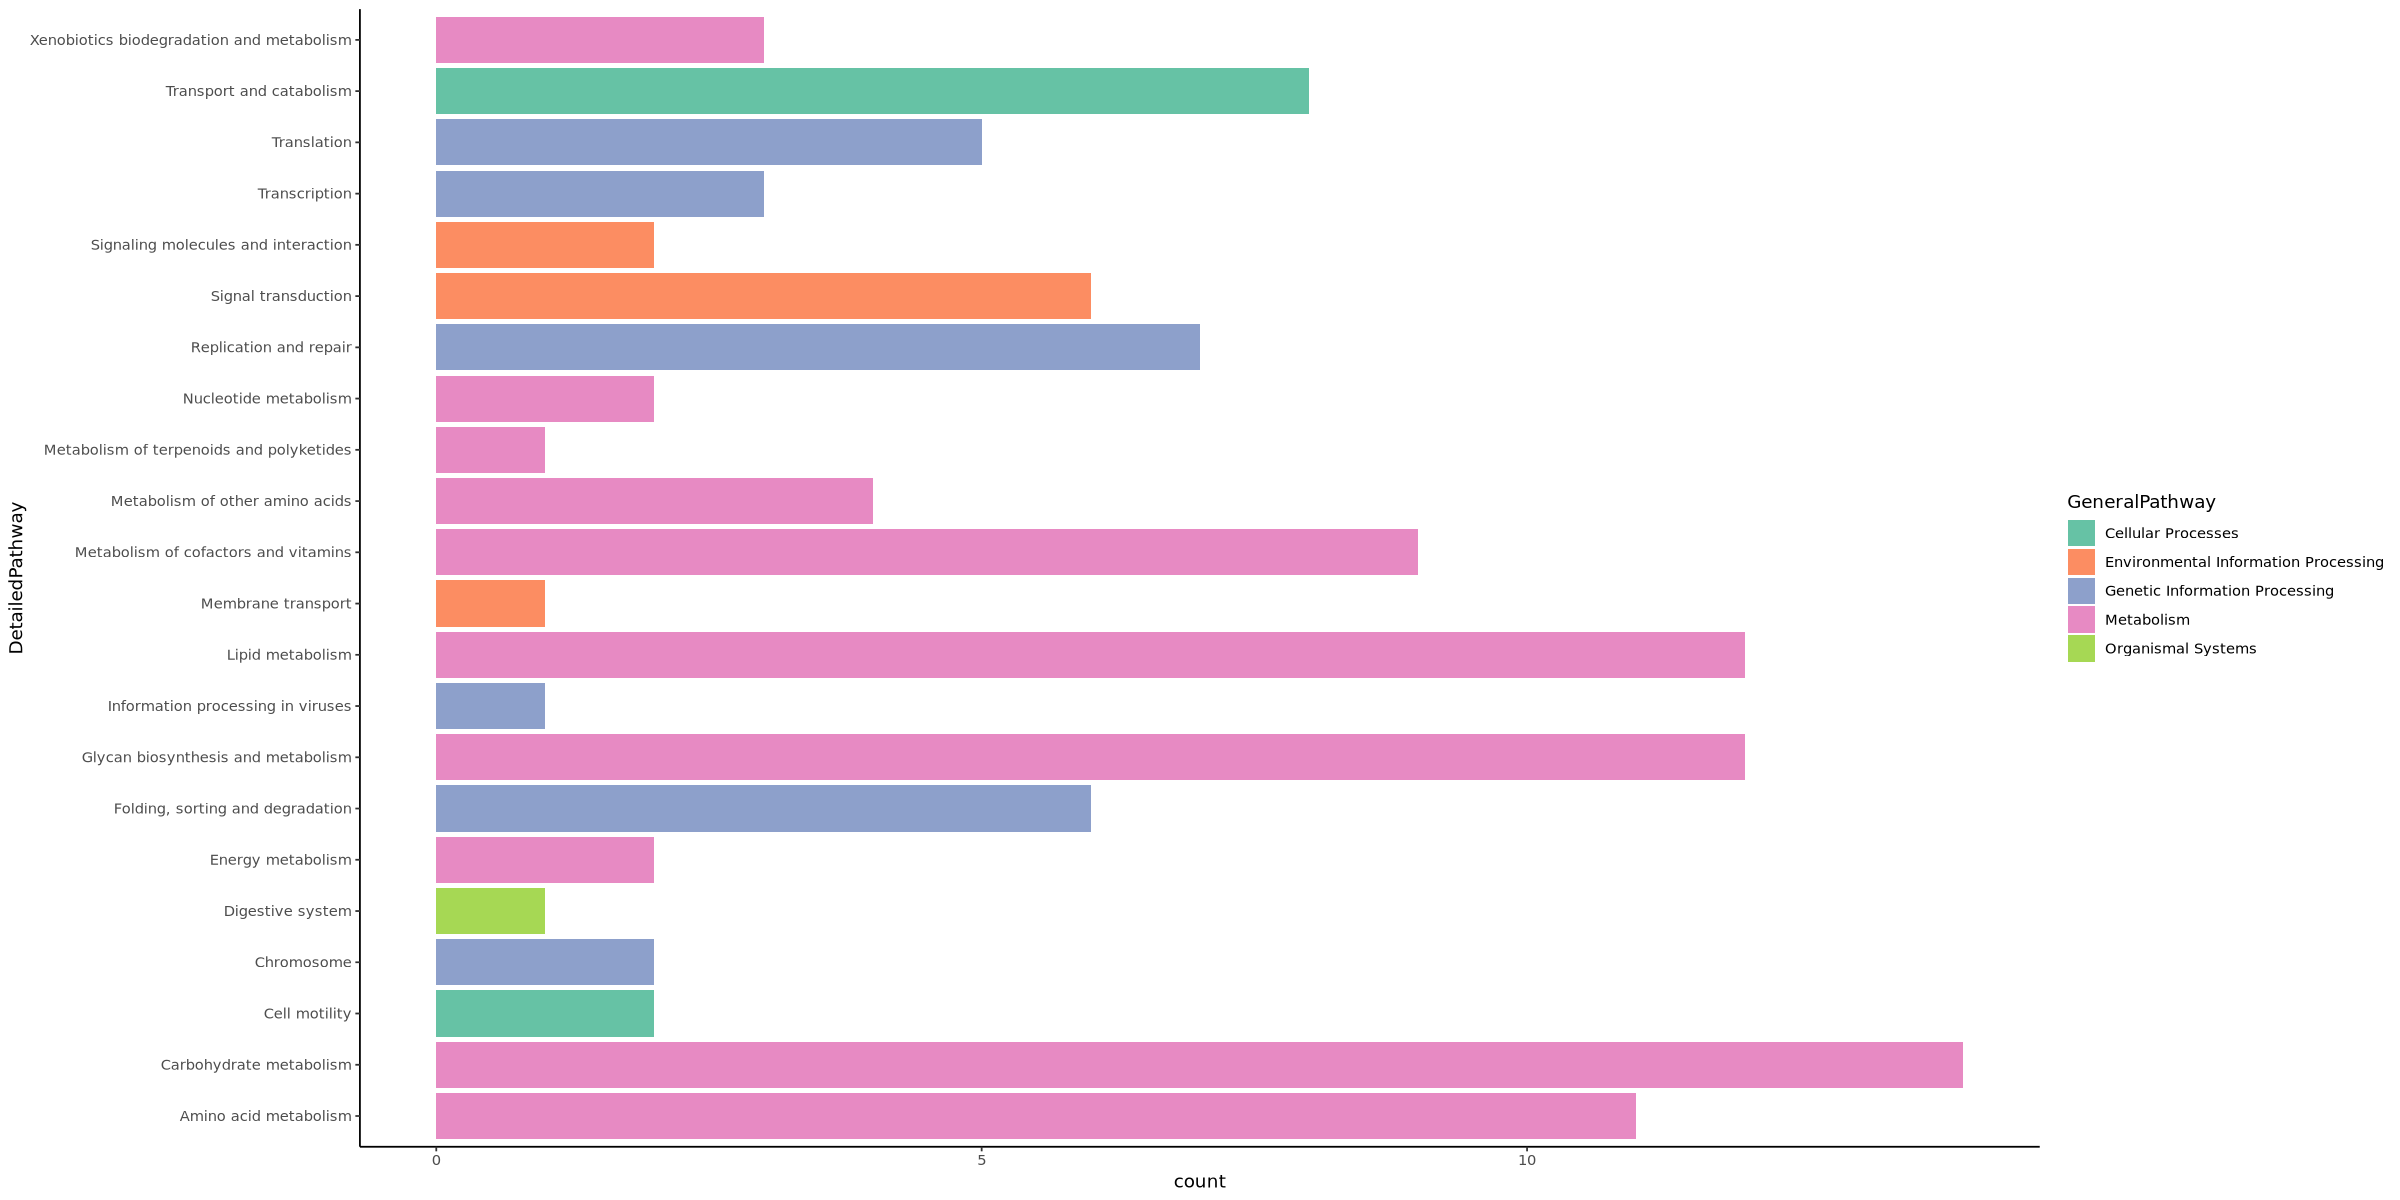

In [15]:
ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar() + 
coord_flip() +
theme_classic() + 
scale_fill_brewer(palette = 'Set2')

want to get the same general pathway bars next to each other 

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [16]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "warm", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                       enrichmentScore
1 cvn00053 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
2 cvn00910 cvn00910 Nitrogen metabolism               0.7751841      
3 cvn00511 cvn00511 Other glycan degradation          0.5917499      
4 cvn00052 cvn00052 Galactose metabolism              0.6484812      
5 cvn00592 cvn00592 alpha-Linolenic acid metabolism   0.7377666      
6 cvn03250 cvn03250 Viral life cycle                  0.6023539      
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Carbohydrate metabolism            warm     
2 Metabolism                     Energy metabolism                  warm     
3 Metabolism                     Glycan biosynthesis and metabolism warm     
4 Metabolism                     Carbohydrate metabolism            warm     
5 Metabolism                     Lipid metabolism                   warm     
6 Genetic Information Processing Information processing in viruses  warm

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

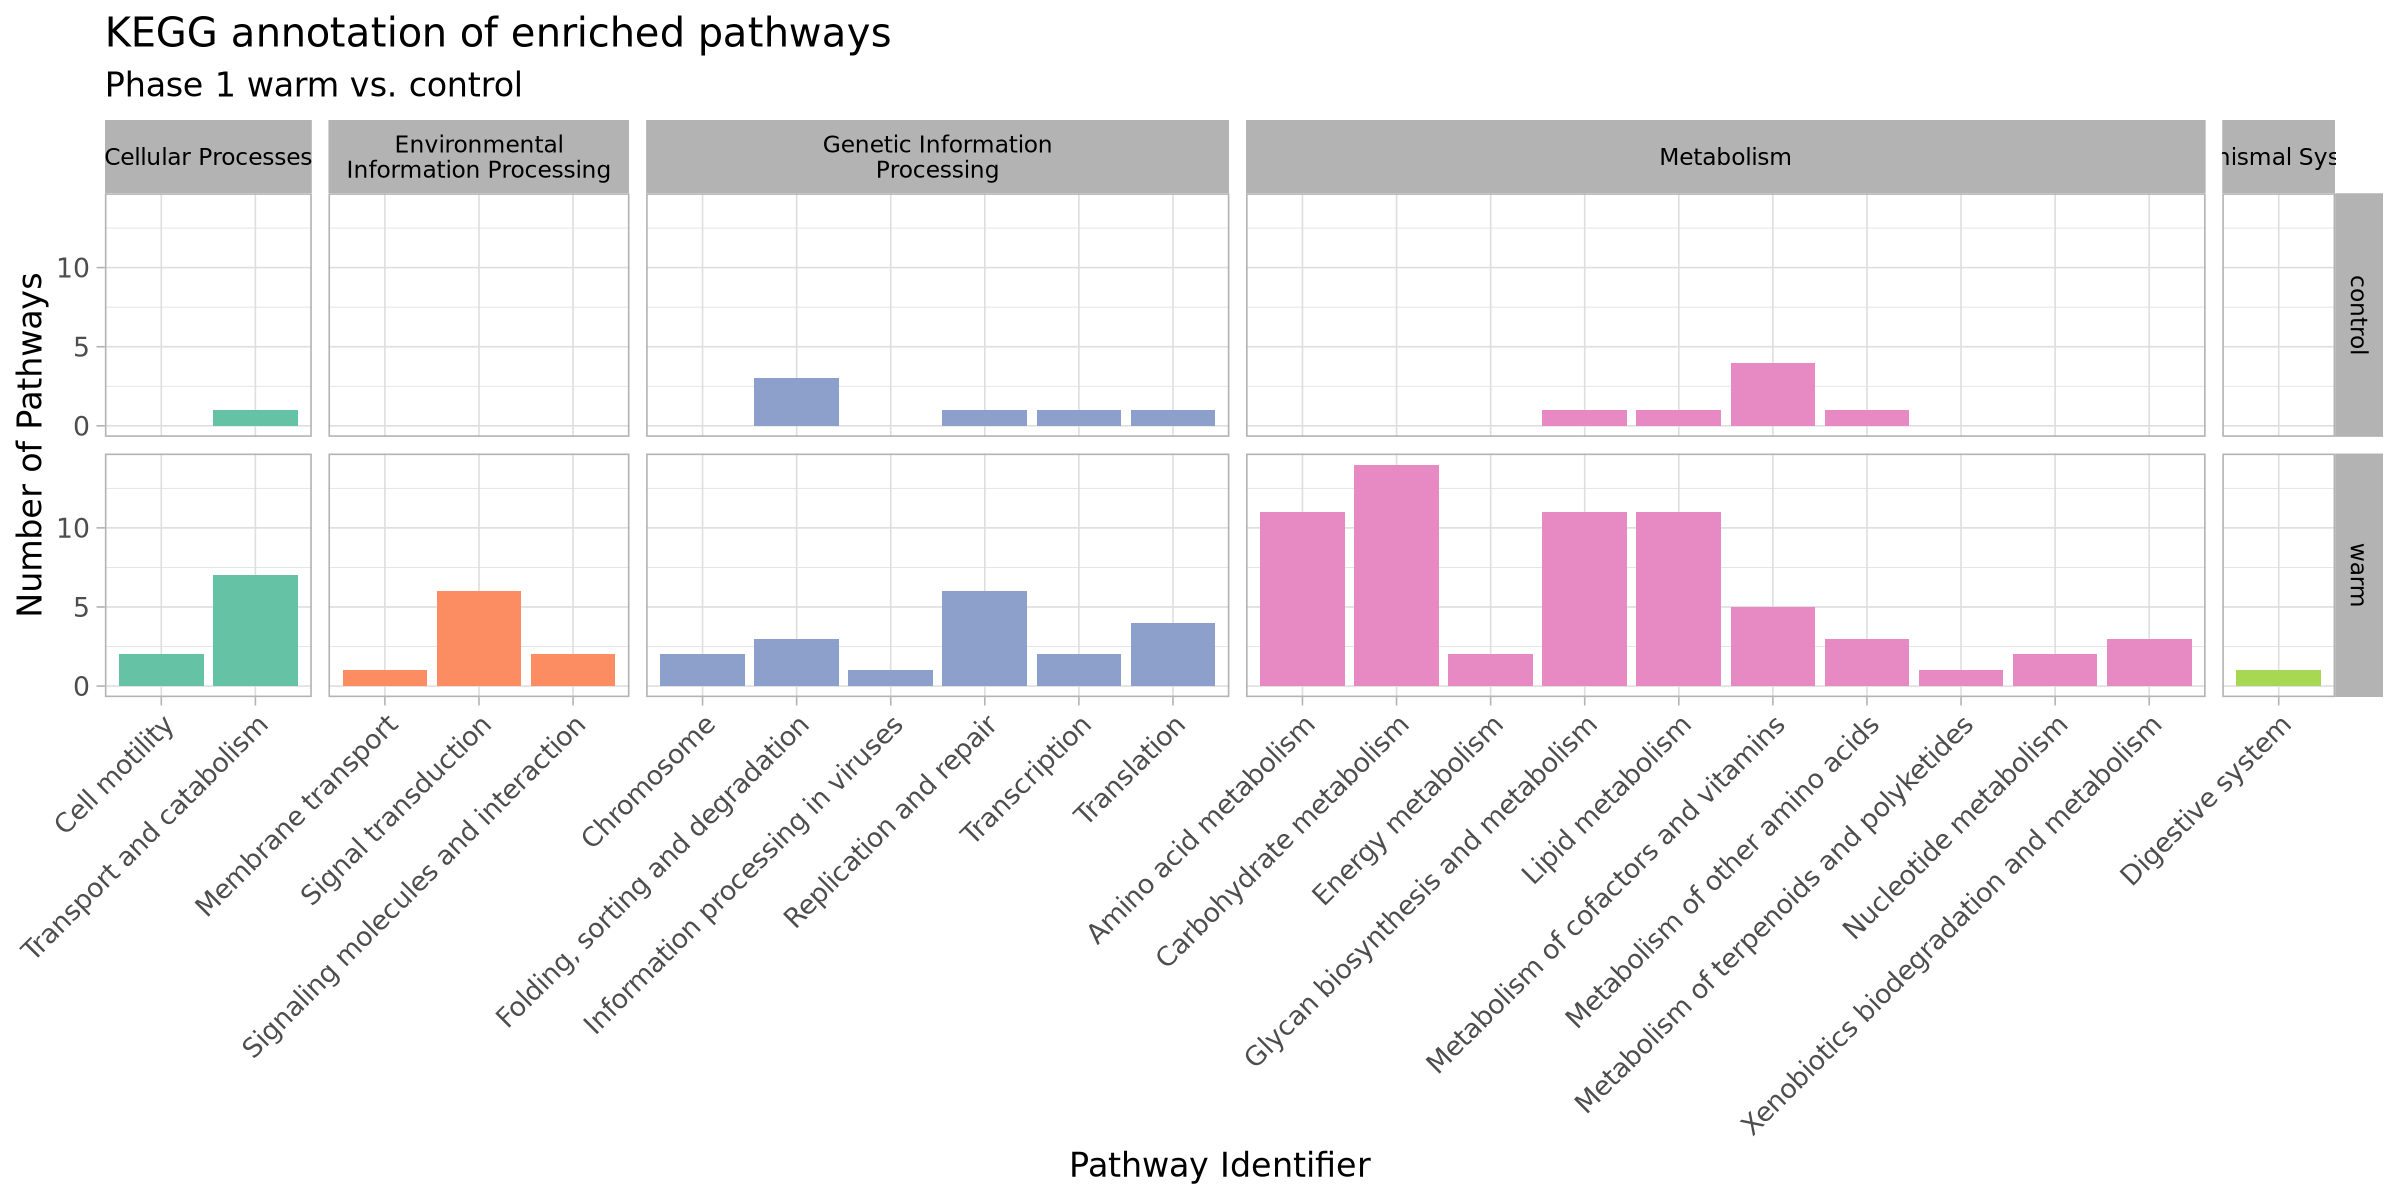

In [17]:
options(repr.plot.width=20, repr.plot.height=10)

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=20) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x', space = 'free', labeller = label_wrap_gen(multi_line = TRUE)) +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 warm vs. control', y = 'Number of Pathways', 
    x = 'Pathway Identifier',)

p1_wc_kegg_plot

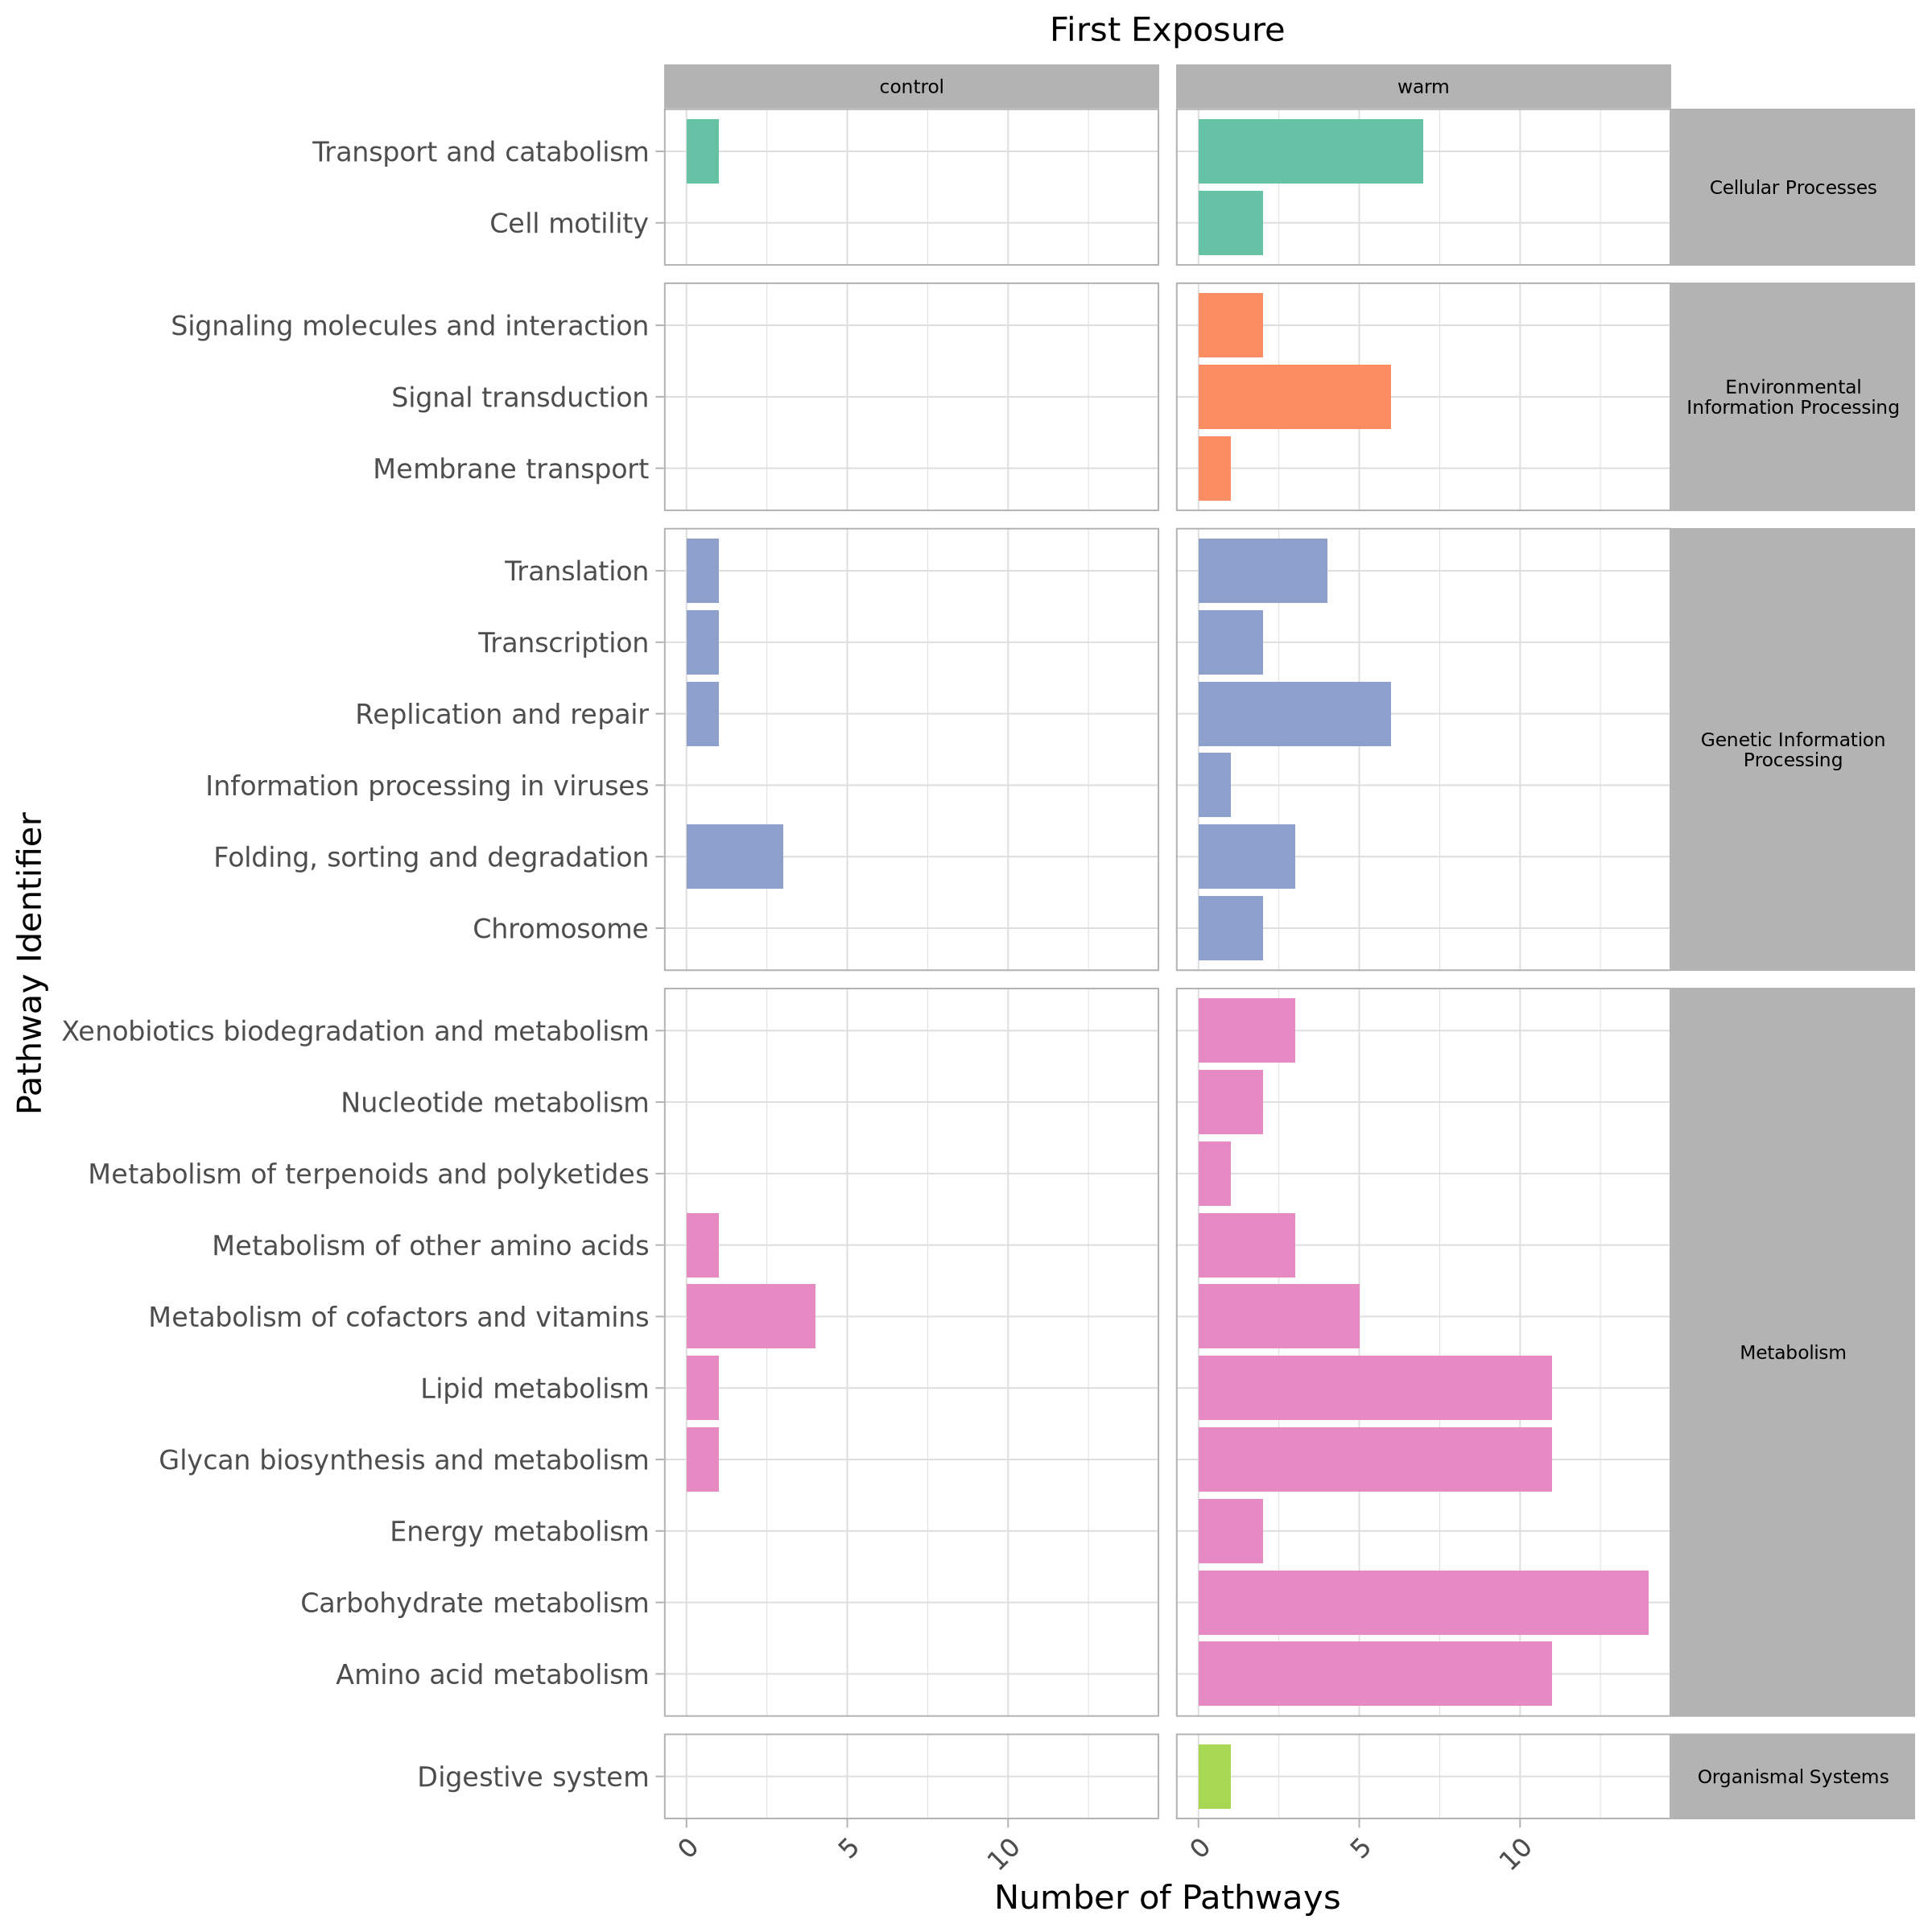

In [18]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

p1_wc_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(GeneralPathway~direction, scales='free_y', space = 'free', labeller = label_wrap_gen(multi_line = TRUE)) +
theme(axis.text.x = element_text(angle = 45, hjust=1), 
      strip.text.y.right = element_text(angle = 0),
     plot.subtitle = element_text(hjust = 0.5)) +
labs(subtitle = 'First Exposure', x = 'Number of Pathways', 
    y = 'Pathway Identifier',)

p1_wc_kegg_plot

[theme options for ggplot](https://ggplot2.tidyverse.org/reference/theme.html)

I think this is really interesting to see only warming treatment had methylated environmental information processing, maybe triggerring that cascade of genes in response to stress?

this plot below is the same but colored differently

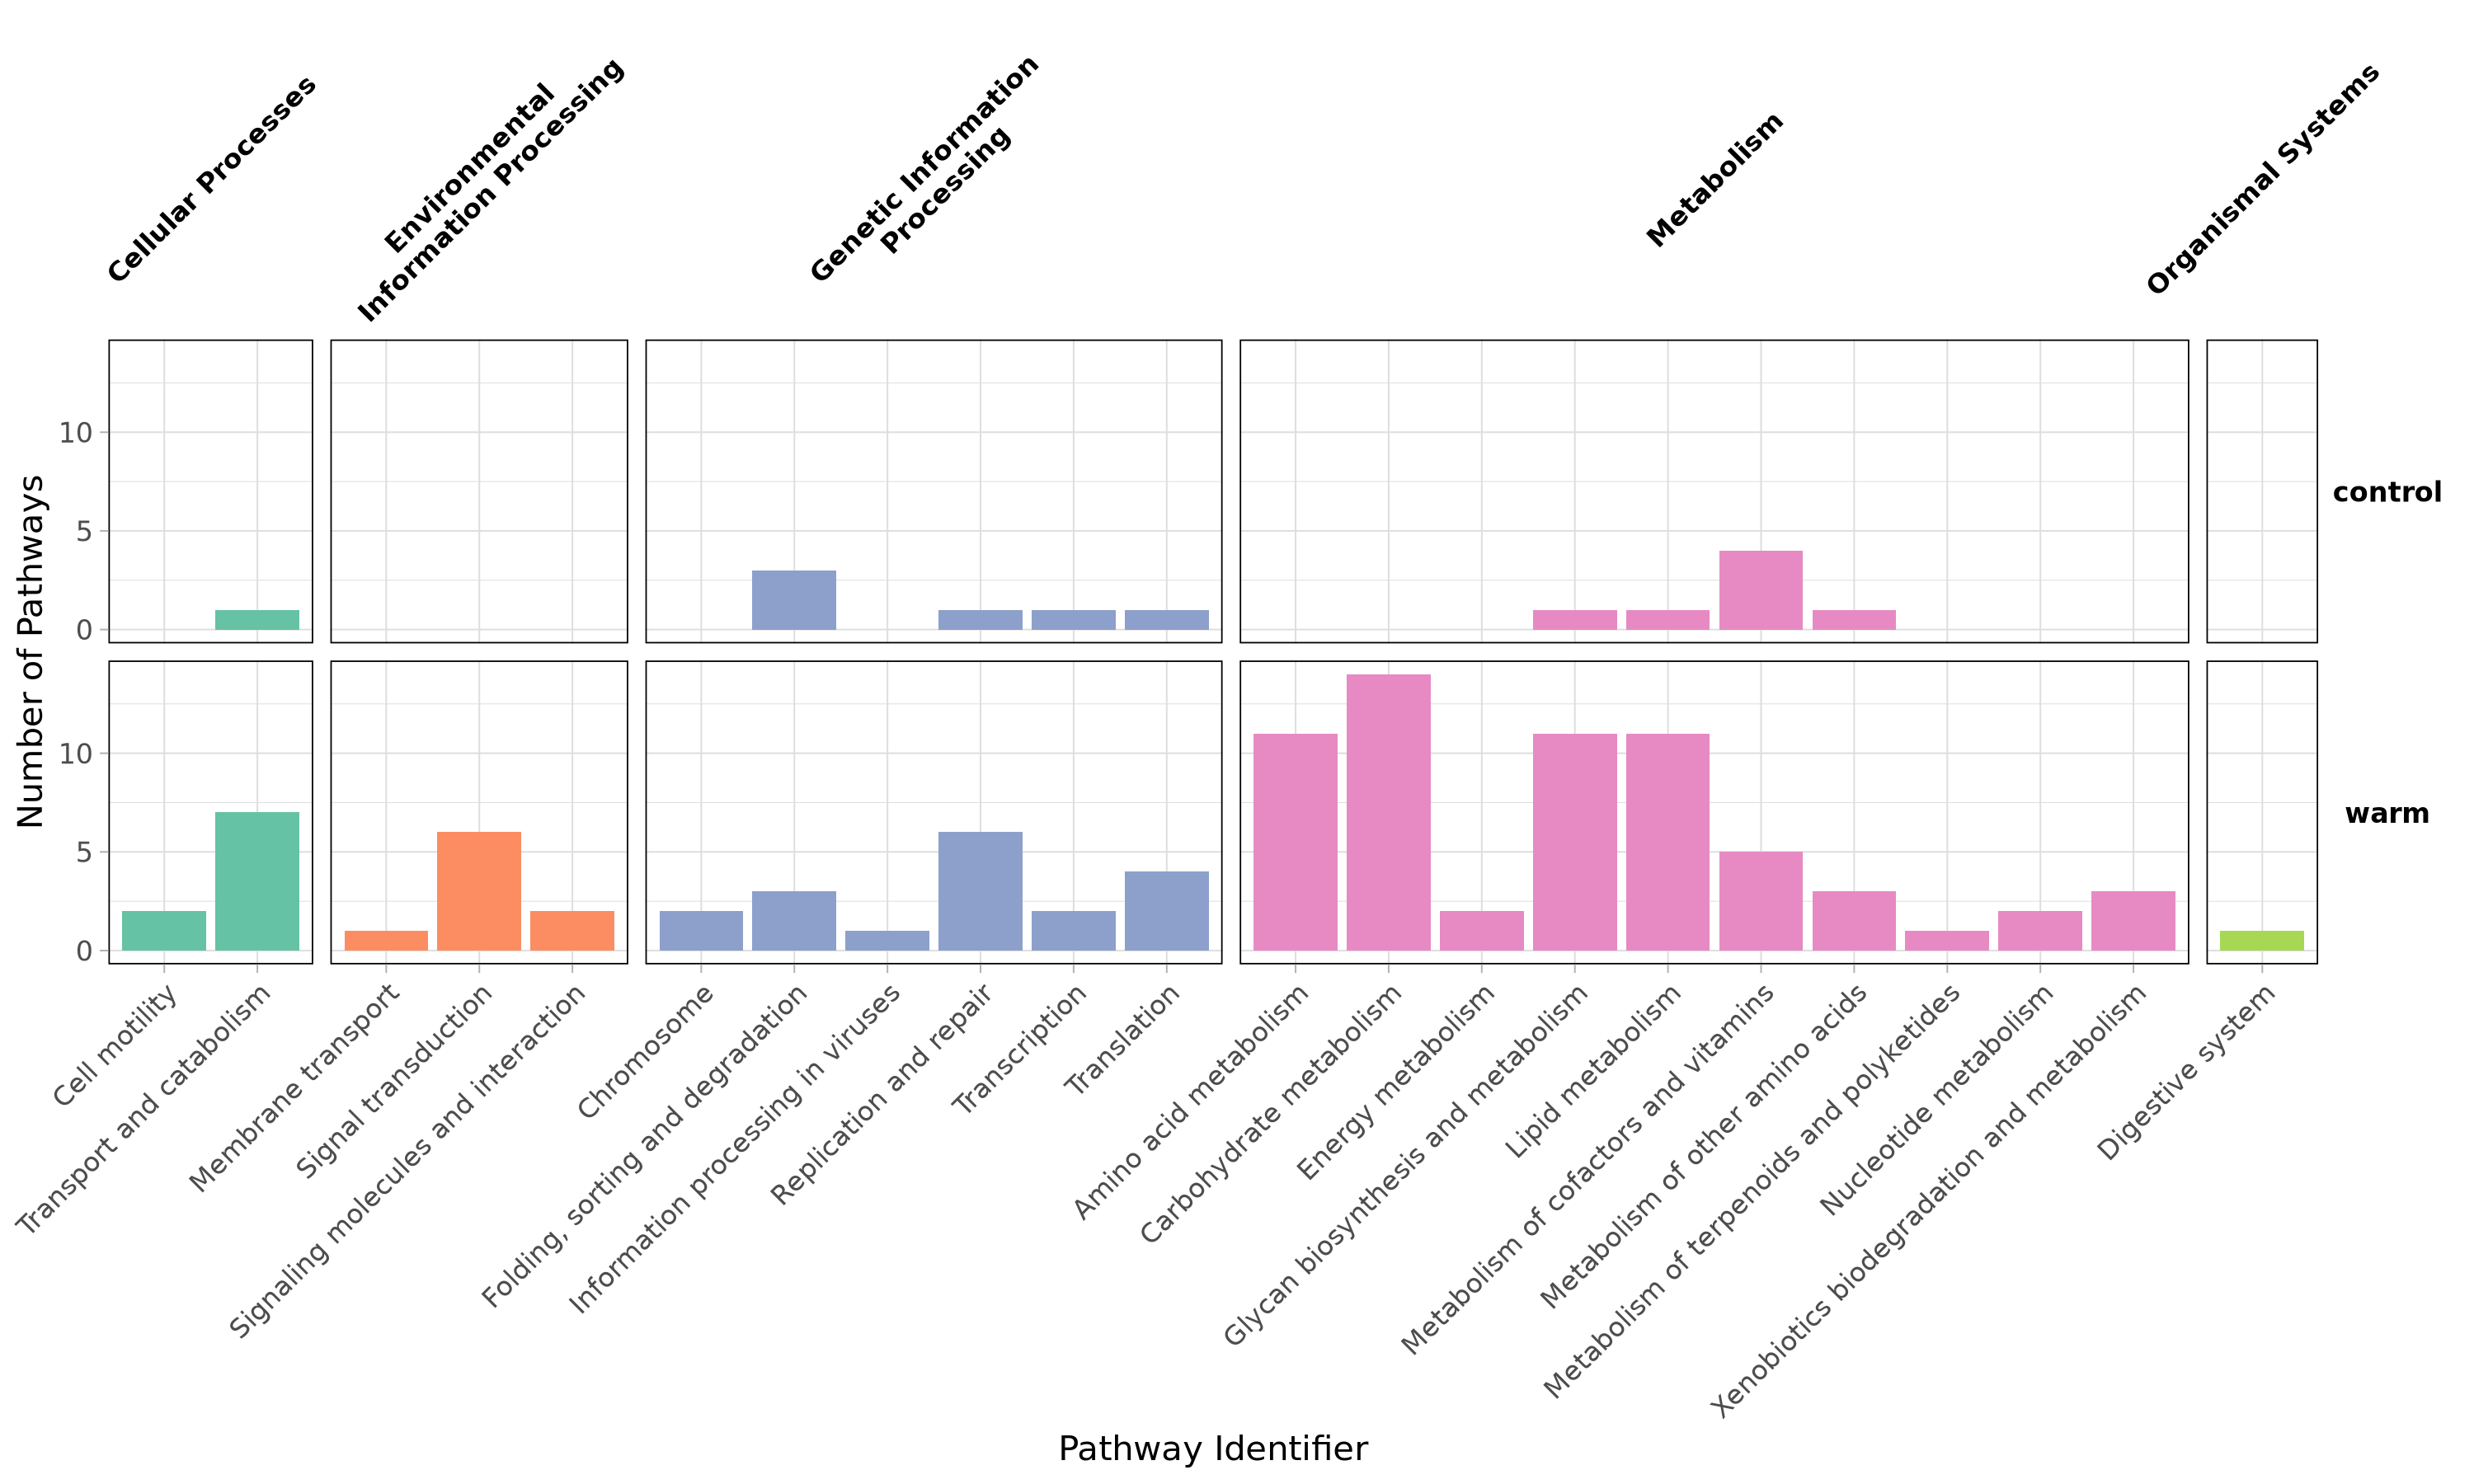

In [19]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_brewer(palette = 'Set2') +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

feel like the vertical plot is harder to understand for whatever reason... want to try out a couple of different things:
- horizontal, but keeping color scheme
- veritcal, but each general pathway is it's own color
- coloring exposure labels to match volcano plots

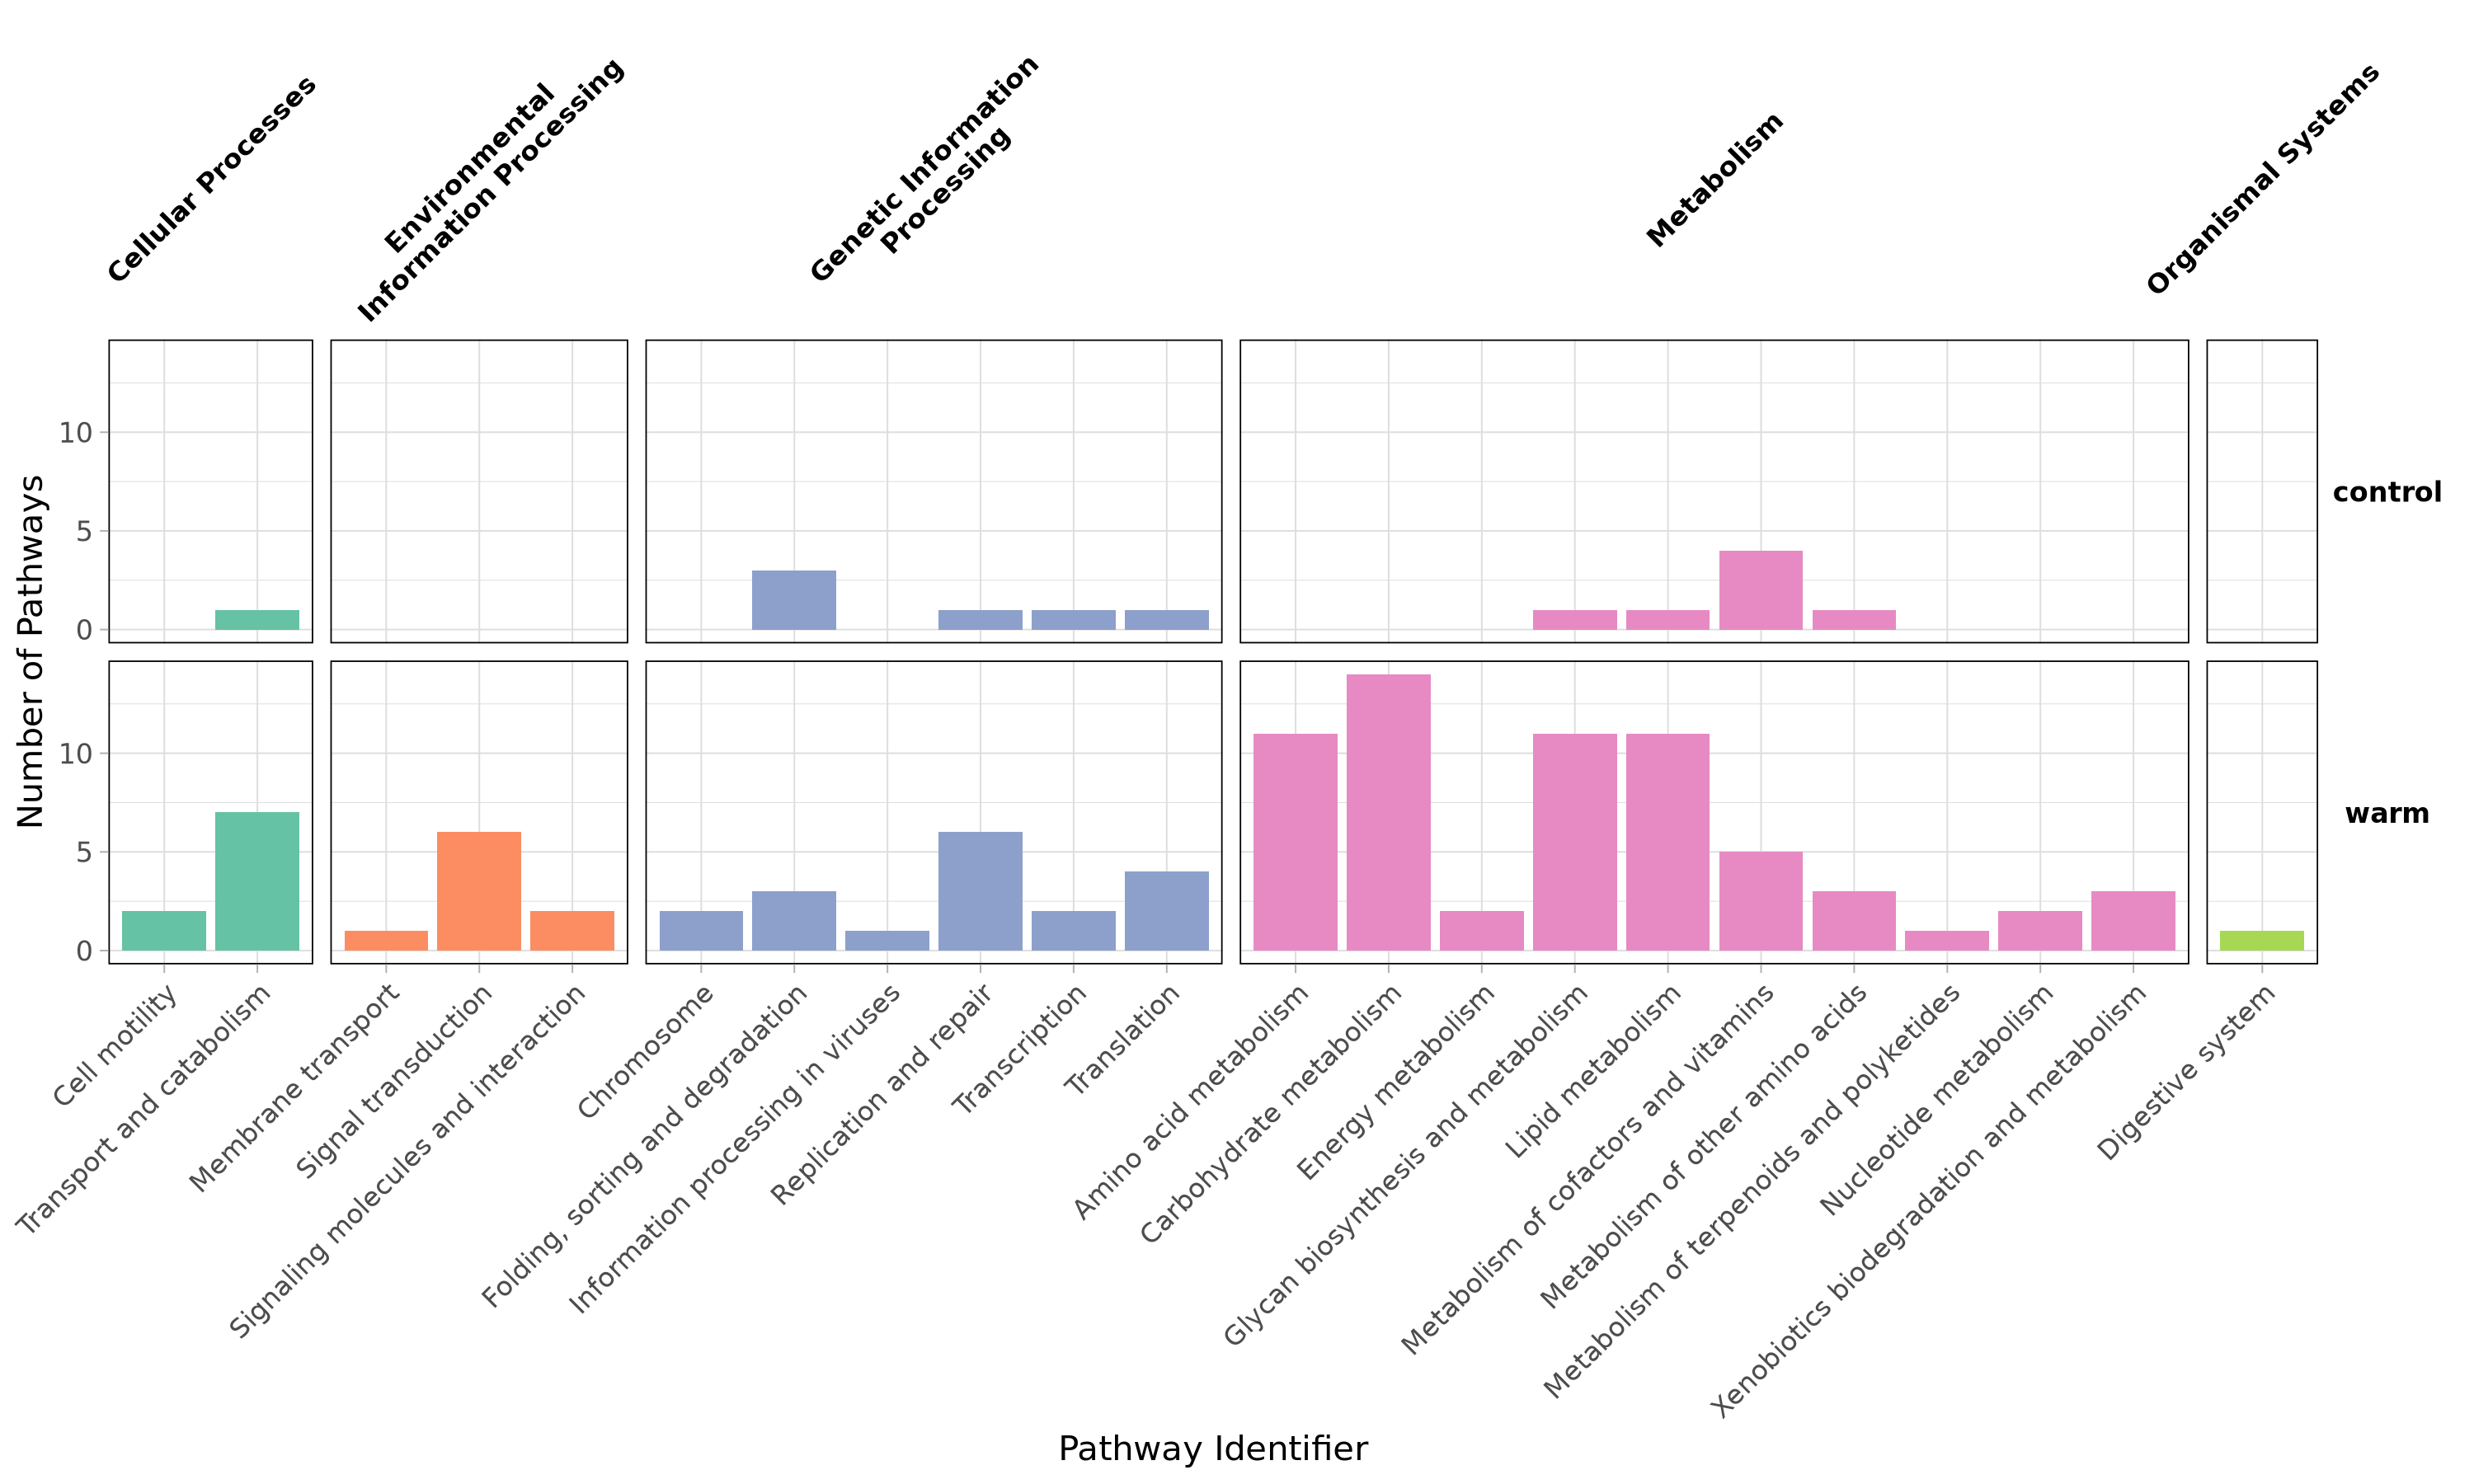

In [20]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_brewer(palette = 'Set2') +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [21]:
library(ggh4x)

In [22]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("lightgreen",'hotpink1')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [23]:
df2$exposure <- 'First Exposure'
head(df2)

X        ID       Description                       enrichmentScore
1 cvn00053 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
2 cvn00910 cvn00910 Nitrogen metabolism               0.7751841      
3 cvn00511 cvn00511 Other glycan degradation          0.5917499      
4 cvn00052 cvn00052 Galactose metabolism              0.6484812      
5 cvn00592 cvn00592 alpha-Linolenic acid metabolism   0.7377666      
6 cvn03250 cvn03250 Viral life cycle                  0.6023539      
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Carbohydrate metabolism            warm     
2 Metabolism                     Energy metabolism                  warm     
3 Metabolism                     Glycan biosynthesis and metabolism warm     
4 Metabolism                     Carbohydrate metabolism            warm     
5 Metabolism                     Lipid metabolism                   warm     
6 Genetic Information Processing Information processing in viruses  warm     
  exposure      
1 First Exposure
2 First Exposure
3 First Exposure
4 First Exposure
5 First Exposure
6 First Exposure

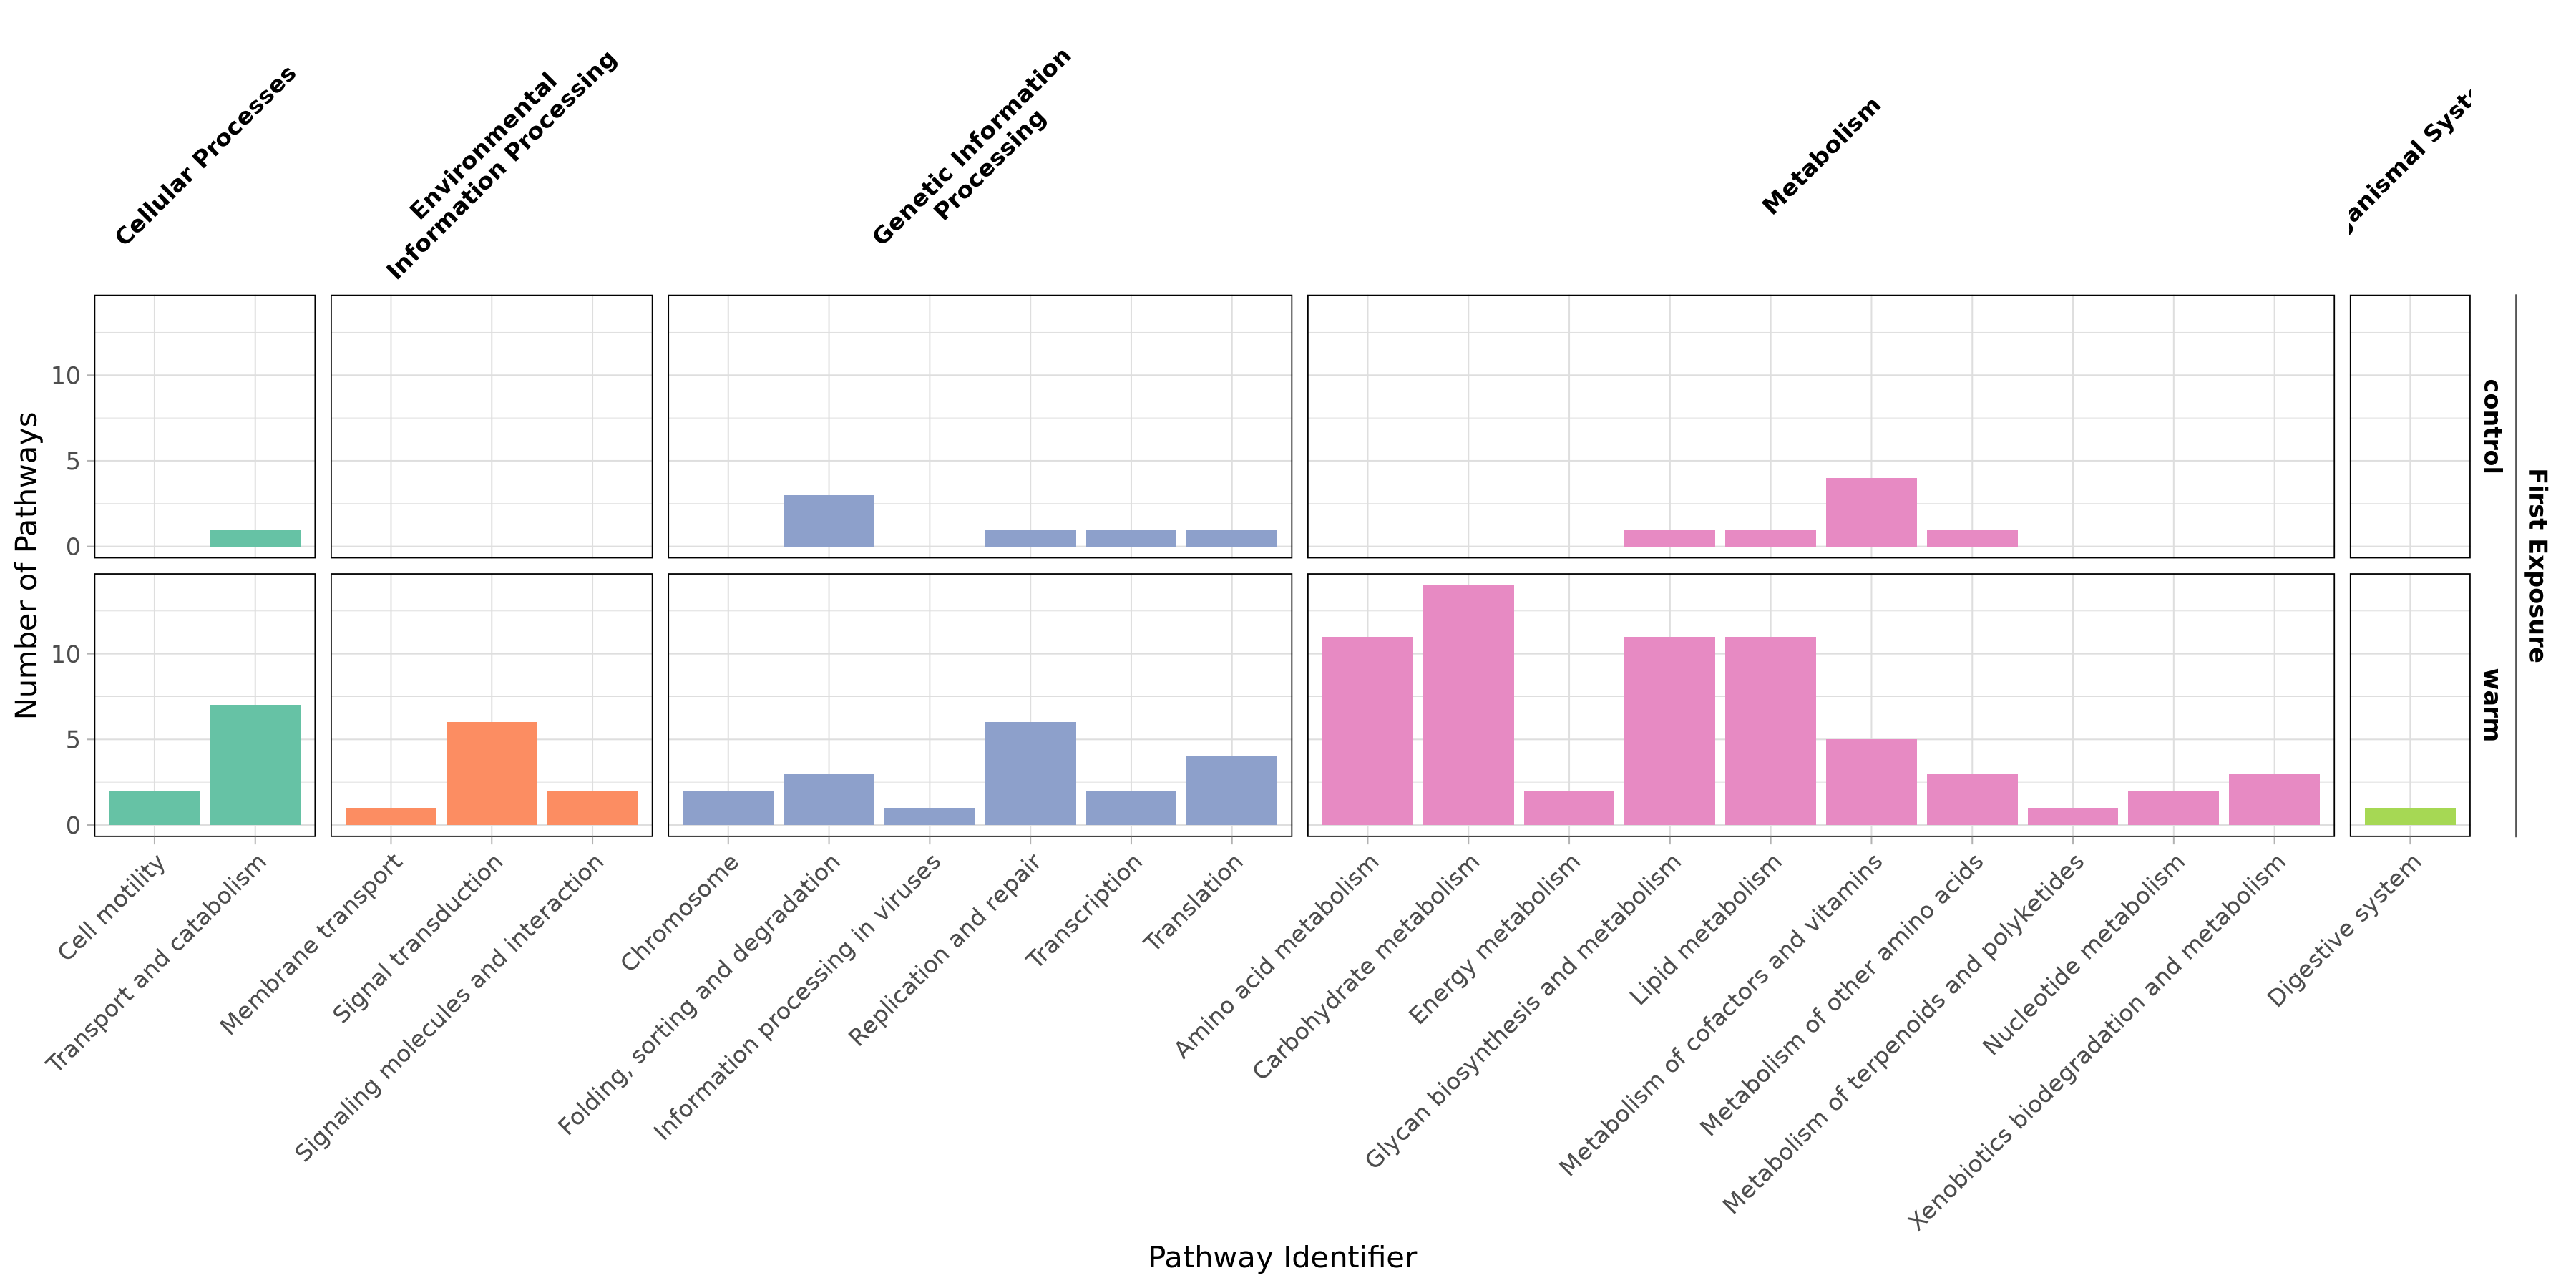

In [24]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=30, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_nested(exposure + direction ~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           nest_line = TRUE,
            # strip = strip2,
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_fill_brewer(palette = 'Set2') +
theme(strip.text.y.right = element_text(angle = 270, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

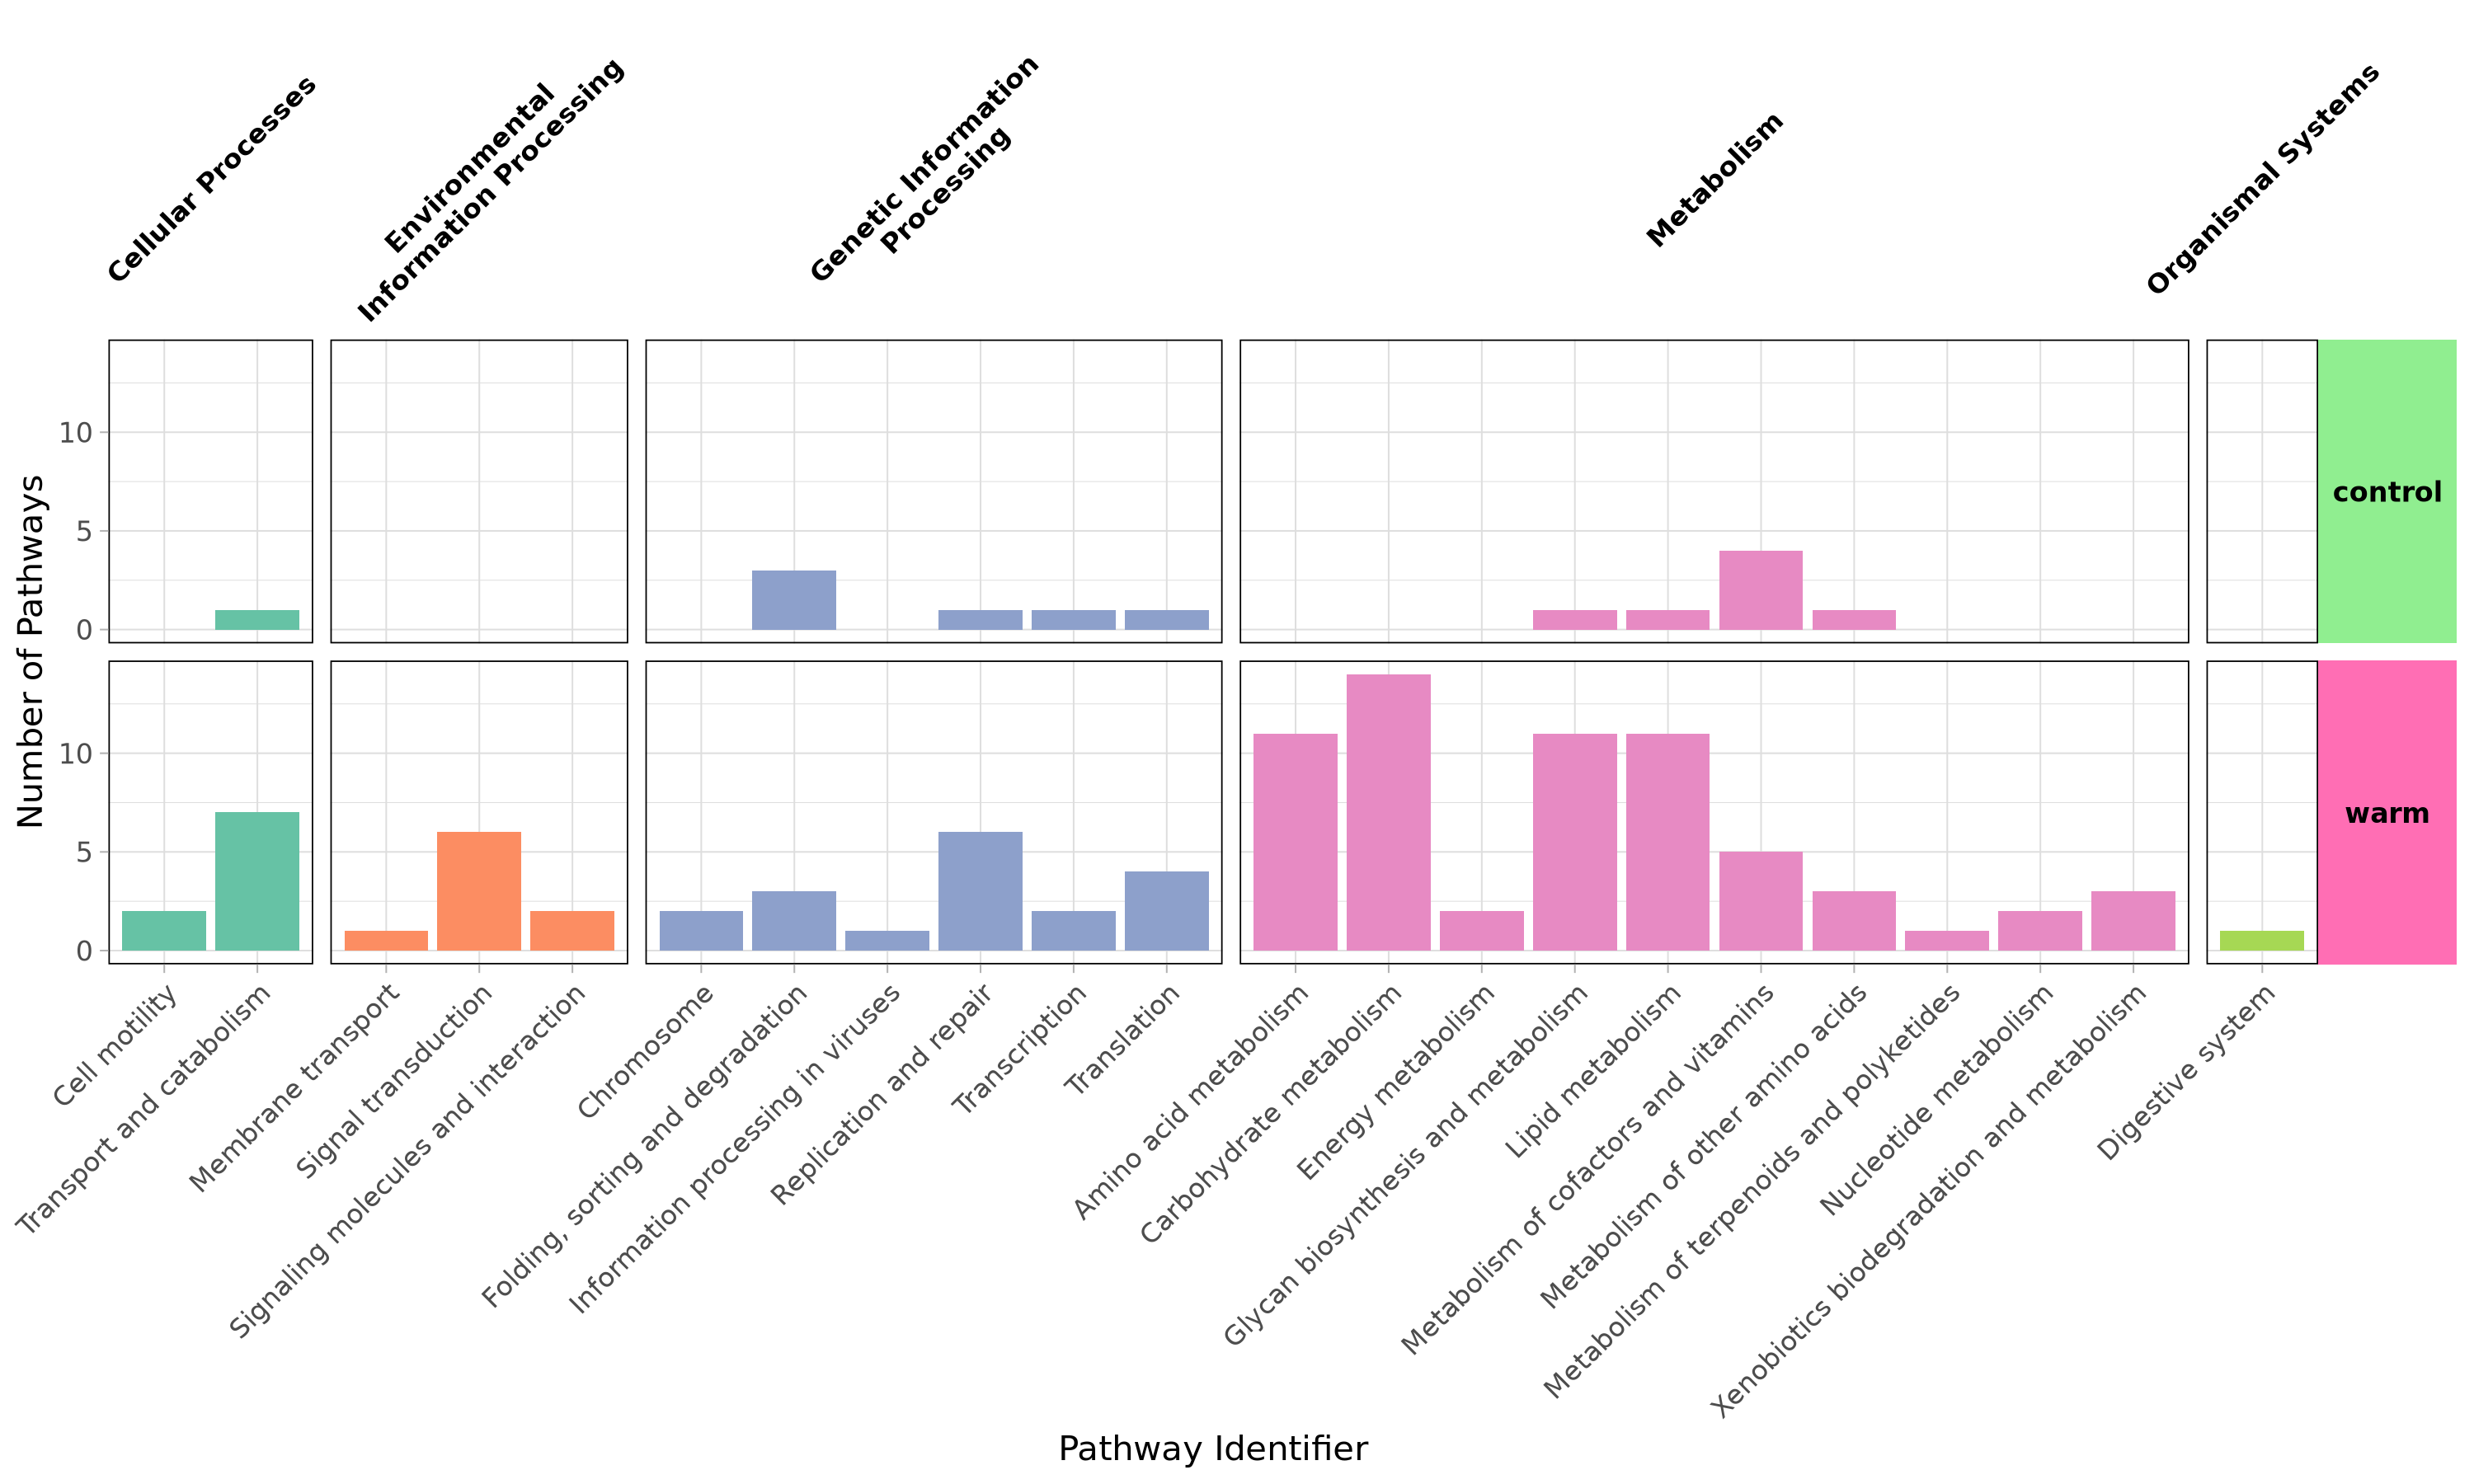

In [25]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_brewer(palette = 'Set2') +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

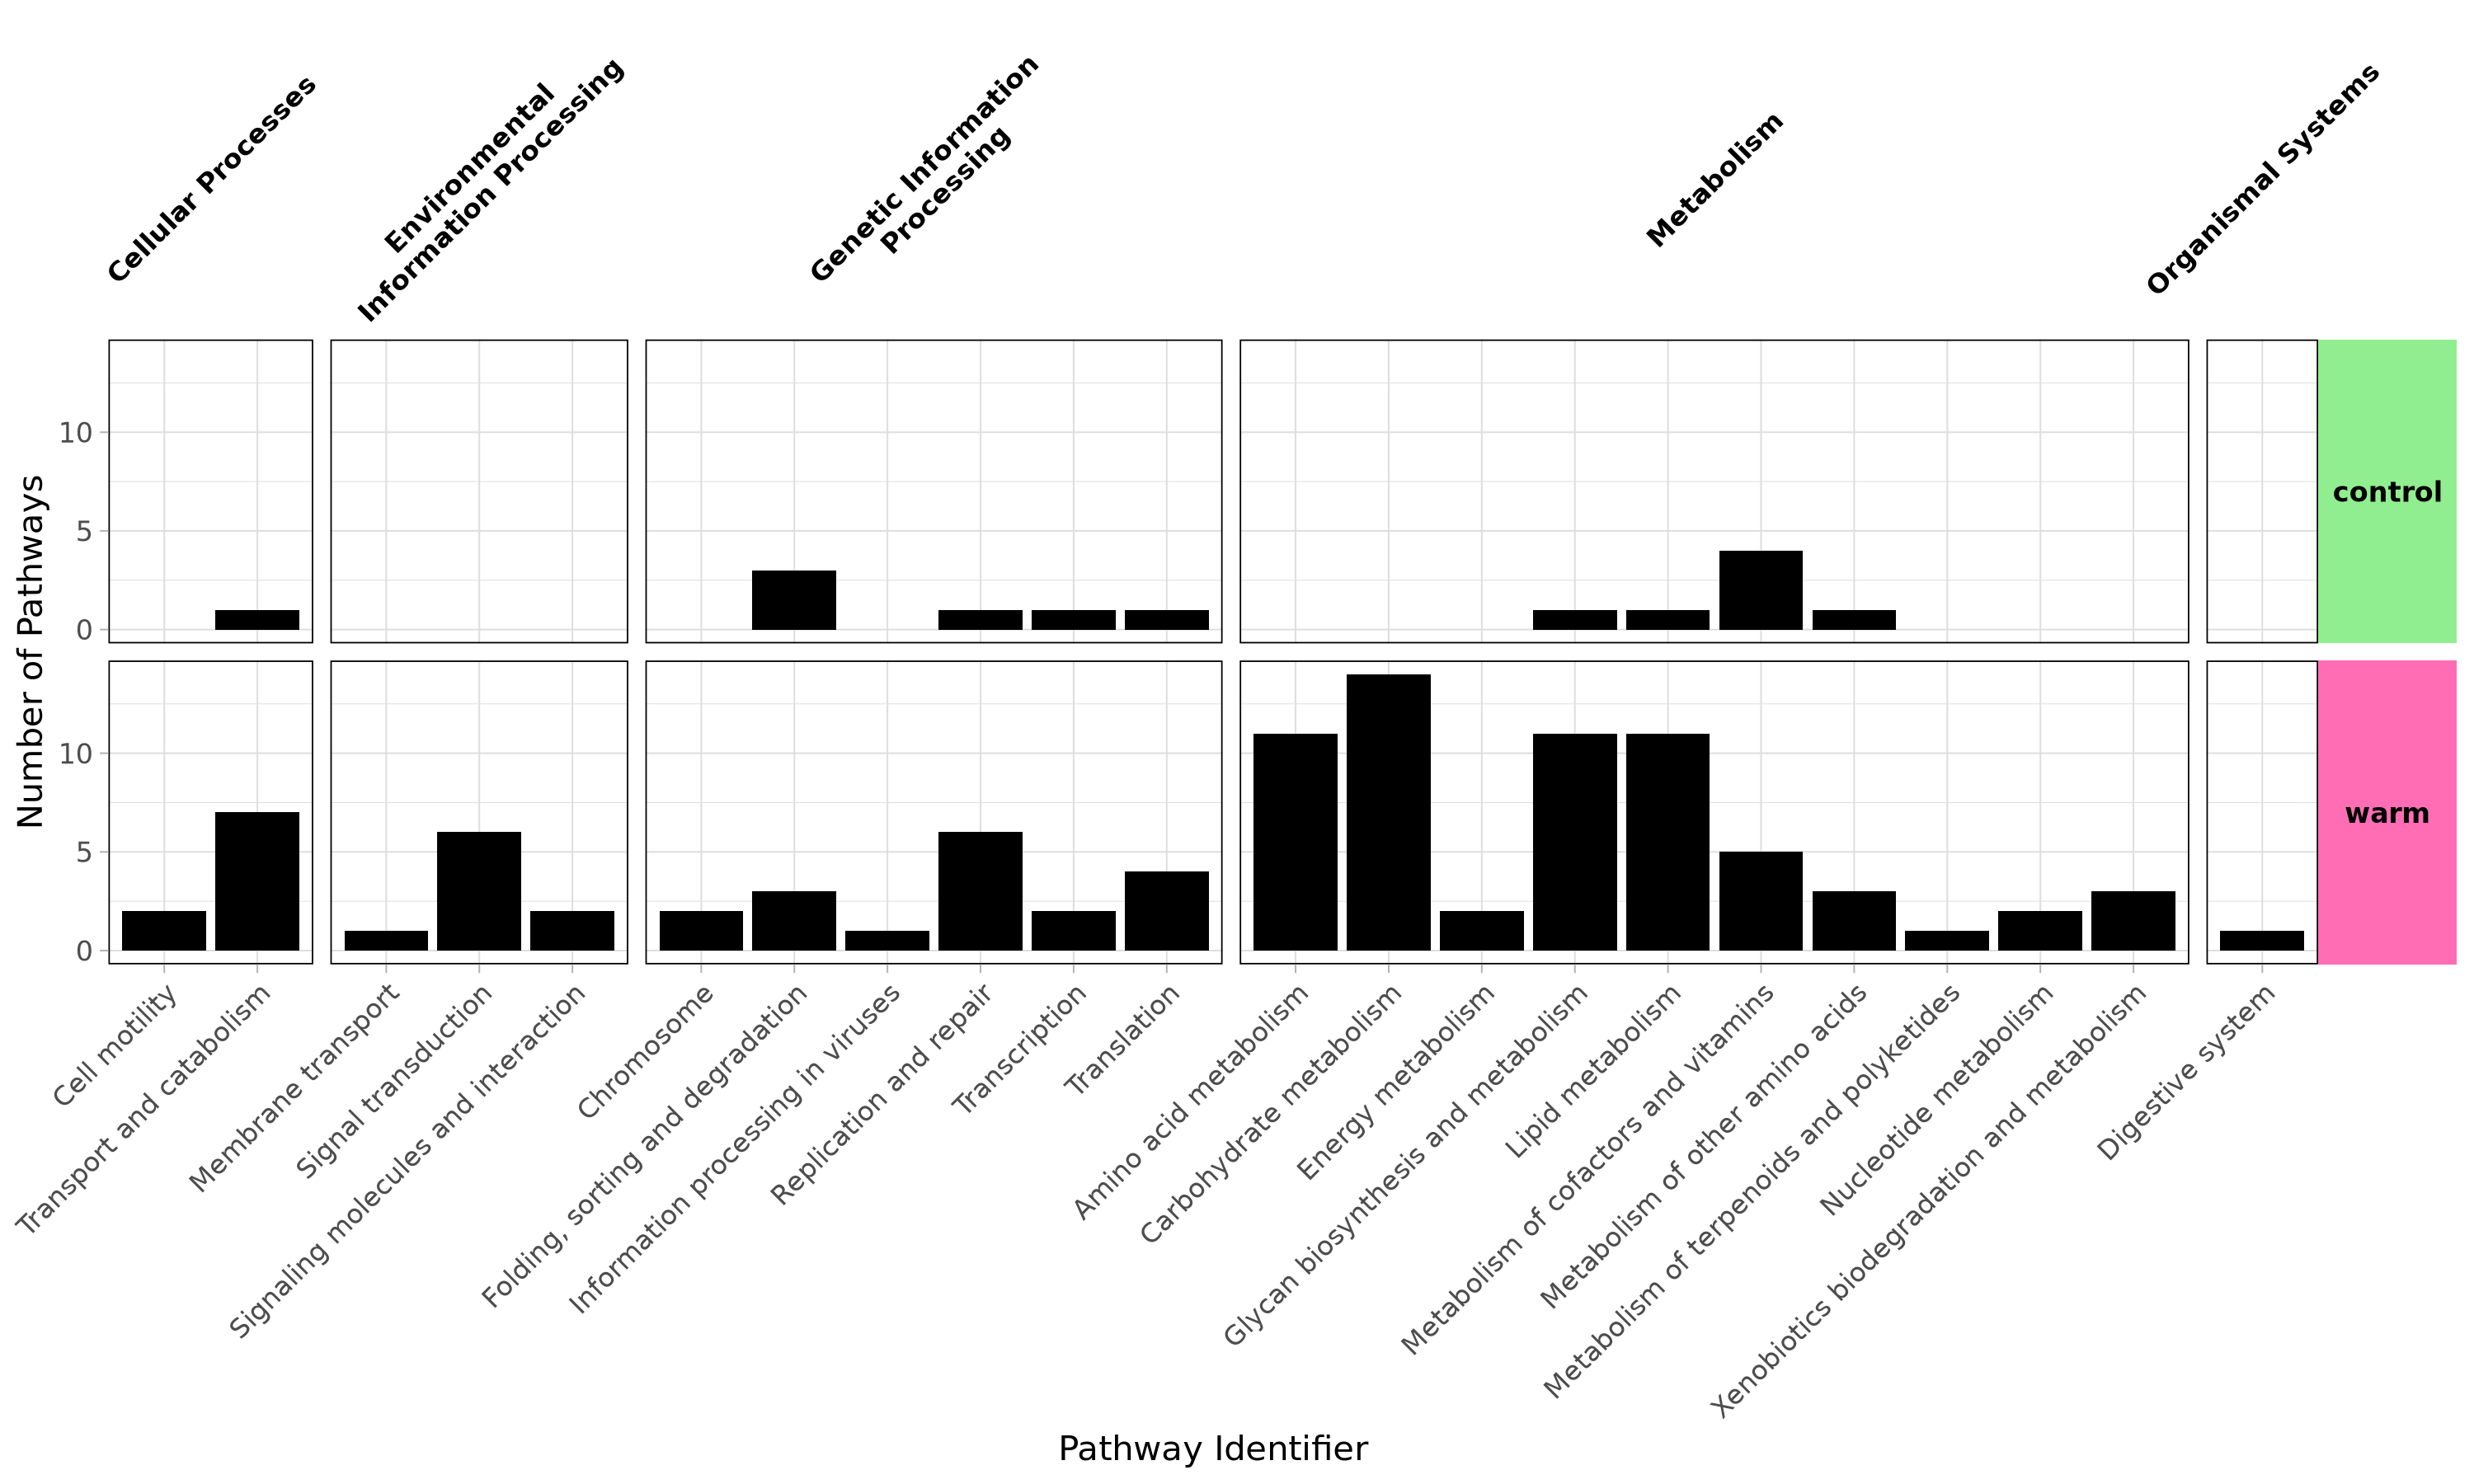

In [26]:
# horizontal, but color by general pathway

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values=c('black','black','black','black','black')) +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [27]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("lightgreen",'hotpink1')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [28]:
df2$exposure <- 'First Exposure'
head(df2)

X        ID       Description                       enrichmentScore
1 cvn00053 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
2 cvn00910 cvn00910 Nitrogen metabolism               0.7751841      
3 cvn00511 cvn00511 Other glycan degradation          0.5917499      
4 cvn00052 cvn00052 Galactose metabolism              0.6484812      
5 cvn00592 cvn00592 alpha-Linolenic acid metabolism   0.7377666      
6 cvn03250 cvn03250 Viral life cycle                  0.6023539      
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Carbohydrate metabolism            warm     
2 Metabolism                     Energy metabolism                  warm     
3 Metabolism                     Glycan biosynthesis and metabolism warm     
4 Metabolism                     Carbohydrate metabolism            warm     
5 Metabolism                     Lipid metabolism                   warm     
6 Genetic Information Processing Information processing in viruses  warm     
  exposure      
1 First Exposure
2 First Exposure
3 First Exposure
4 First Exposure
5 First Exposure
6 First Exposure

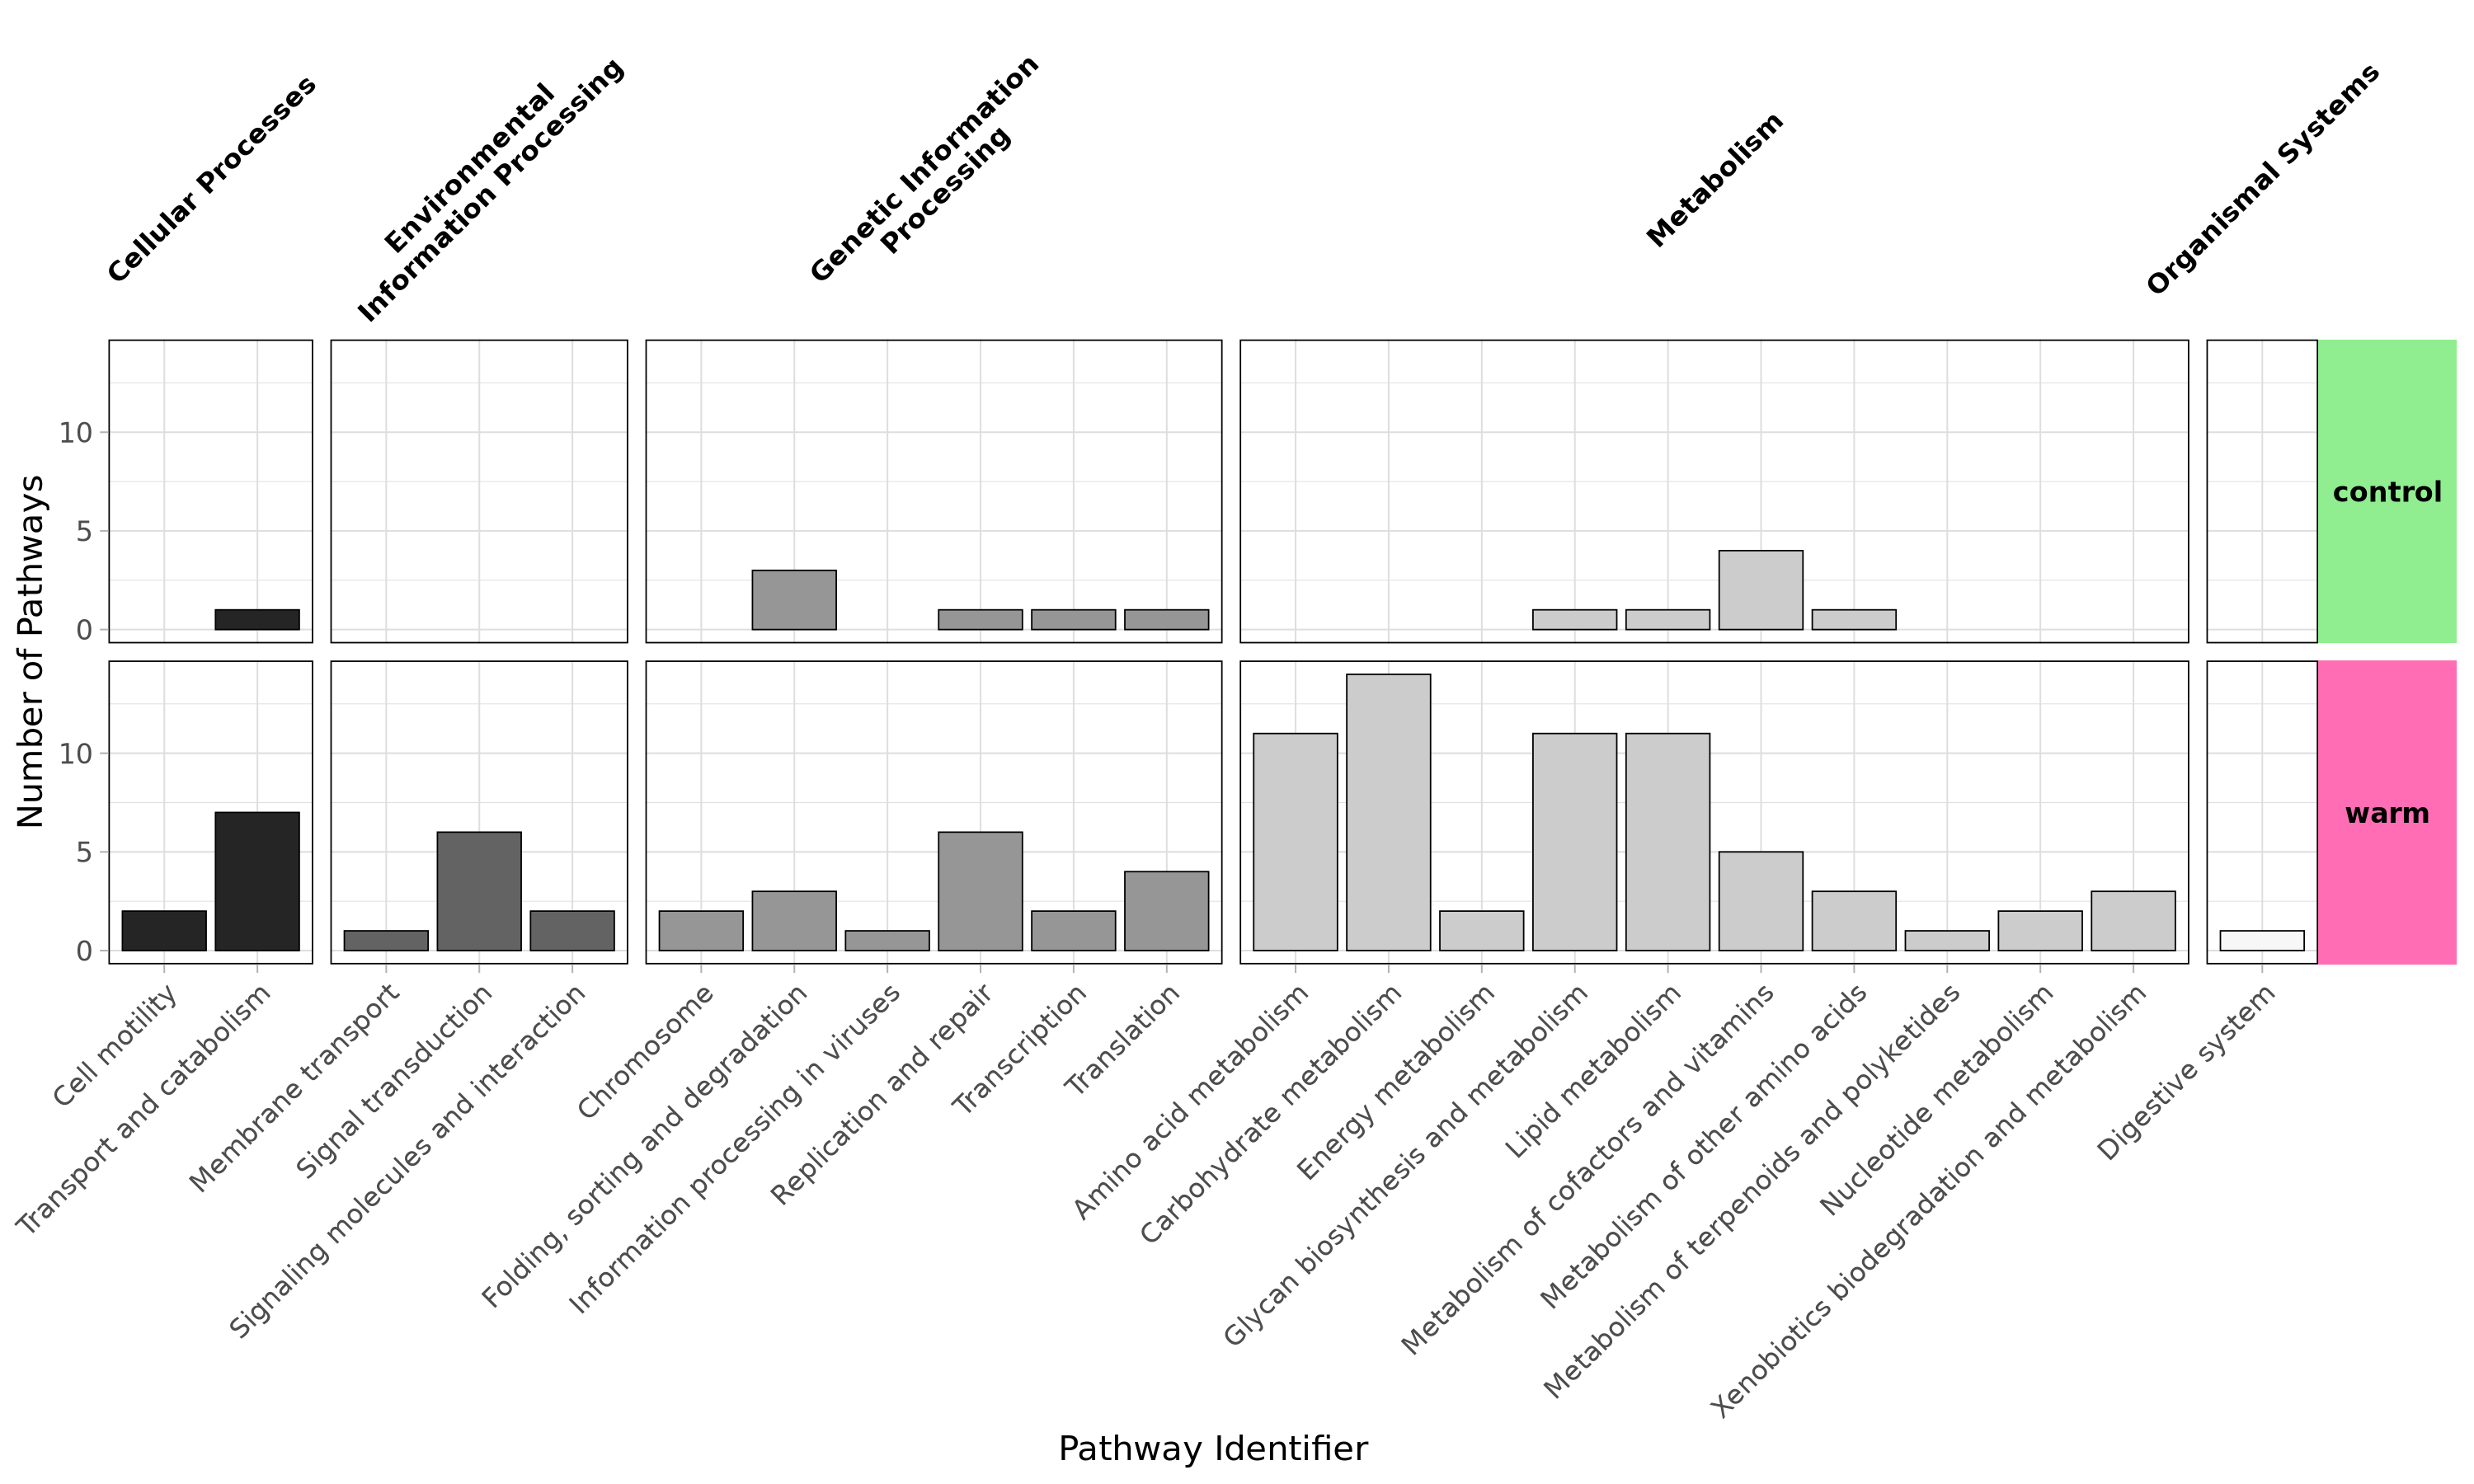

In [29]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_brewer(palette = 'Greys', direction=-1) +
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

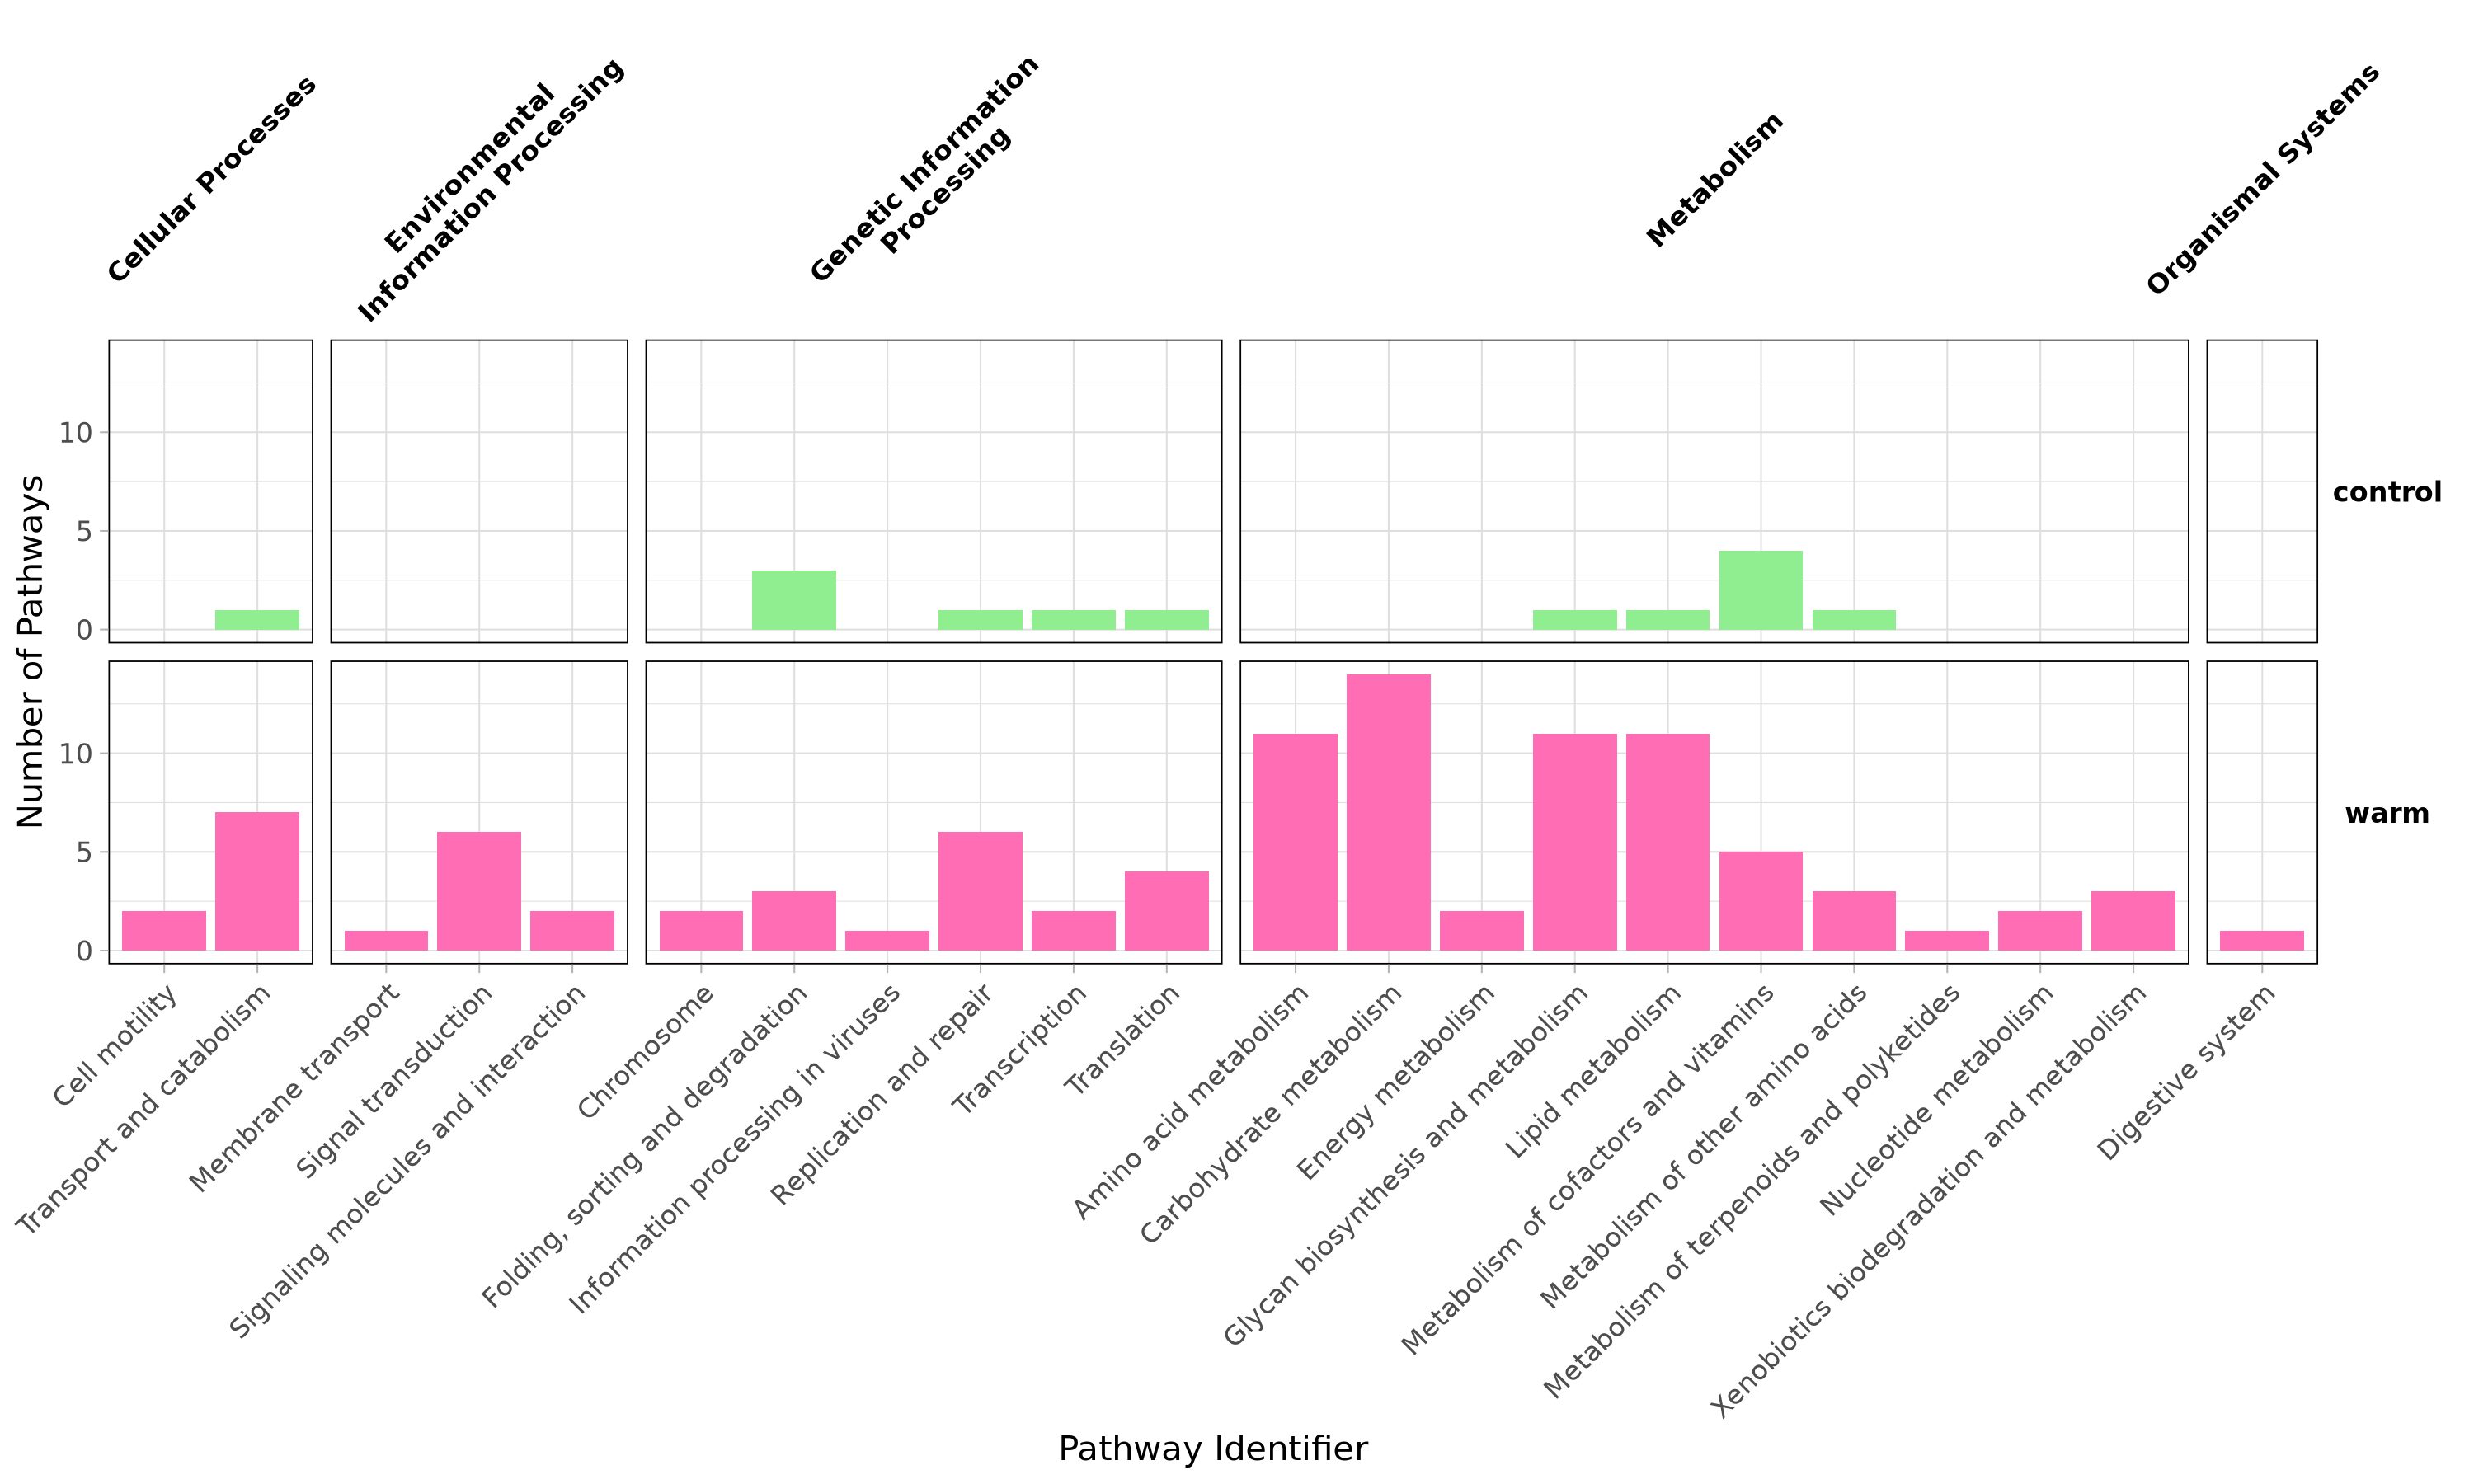

In [30]:
# horizontal, but keeping color scheme

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('lightgreen', 'hotpink1')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [31]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p1_wc_kegg_pathways_vertical.pdf', width=20, height=20)

# open plot
p1_wc_kegg_plot

# close pdf file
dev.off()

png 
  2

### How many of my genes are in each pathway?
Extracting the genes in each pathway, and seeing how many of my significant genes are in that pathway

will add these numbers to the OG dataframe to replicate bar plot above, but with total number of sig genes for the x axis (instead of number of pathways)

In [32]:
# filtering df for only genes that were significant
sig_genes <- filter(unfilter_df, unfilter_df$padj < 0.05)
dim(sig_genes) #344 total genes
head(sig_genes)

[1] 344   3

gene      lfc      padj       
1 111117672 1.314266 0.005811498
2 111128103 1.644558 0.001509994
3 111137770 2.655903 0.002201055
4 111125333 1.461069 0.017320572
5 111111295 2.360240 0.001233208
6 111125391 2.205531 0.001875643

In [33]:
id <- kk2$ID
pathways <- kk2$ID
genes <- geneInCategory(kk2)[id]

# Your significant genes
significant_genes <- sig_genes$gene

# Create an empty data frame to store the results
result_df <- data.frame(Pathway = character(), Significant_Genes_Count = numeric(), stringsAsFactors = FALSE)

# Loop through each pathway
for (pathway in pathways) {
  # Count the significant genes in the pathway
  sig_genes_count <- sum(genes[[pathway]] %in% significant_genes)
  
  # Append the result to the data frame
  result_df <- rbind(result_df, data.frame(Pathway = pathway, Significant_Genes_Count = sig_genes_count))
}

# Print the result data frame
head(result_df)

Pathway  Significant_Genes_Count
1 cvn00053 1                      
2 cvn00910 3                      
3 cvn00052 1                      
4 cvn00511 0                      
5 cvn03015 1                      
6 cvn04814 8

In [34]:
id <- kk2$ID
pathways <- kk2$ID
genes <- geneInCategory(kk2)[id]

# Your significant genes
significant_genes <- sig_genes$gene

# Create an empty data frame to store the results
result_df2 <- data.frame(Gene = character(), Pathway = character(), stringsAsFactors = FALSE)

# Loop through each gene in the significant_genes list
for (gene in significant_genes) {
  # Find the pathway(s) that contain the gene
  pathways_with_gene <- pathways[sapply(genes, function(x) gene %in% x)]
  
  # Add the gene and its corresponding pathway(s) to the result_df
  for (pathway in pathways_with_gene) {
    result_df2 <- rbind(result_df2, data.frame(Gene = gene, Pathway = pathway))
  }
}

# Print the result data frame
head(result_df2)

Gene      Pathway 
1 111117672 cvn04142
2 111137770 cvn03040
3 111111295 cvn04140
4 111111295 cvn04137
5 111116519 cvn04310
6 111137396 cvn04137

In [35]:
# Example pathway information datafram

# Merge result_df with pathway_info_df based on PathwayID
result_df_merged <- merge(result_df2, df2, by.x = "Pathway", by.y = "ID", all.x = TRUE)

# Print the merged result
result_df_merged <- na.omit(result_df_merged)
unique(result_df_merged$direction)
head(result_df_merged)


[1] "warm"

Pathway  Gene      X        Description                       enrichmentScore
1 cvn00010 111103451 cvn00010 Glycolysis / Gluconeogenesis      0.4227819      
2 cvn00020 111100625 cvn00020 Citrate cycle (TCA cycle)         0.4038871      
3 cvn00020 111105925 cvn00020 Citrate cycle (TCA cycle)         0.4038871      
4 cvn00051 111131656 cvn00051 Fructose and mannose metabolism   0.3367824      
5 cvn00052 111118471 cvn00052 Galactose metabolism              0.6484812      
6 cvn00053 111103451 cvn00053 Ascorbate and aldarate metabolism 0.7513381      
  GeneralPathway DetailedPathway         direction exposure      
1 Metabolism     Carbohydrate metabolism warm      First Exposure
2 Metabolism     Carbohydrate metabolism warm      First Exposure
3 Metabolism     Carbohydrate metabolism warm      First Exposure
4 Metabolism     Carbohydrate metabolism warm      First Exposure
5 Metabolism     Carbohydrate metabolism warm      First Exposure
6 Metabolism     Carbohydrate metabolism warm      First Exposure

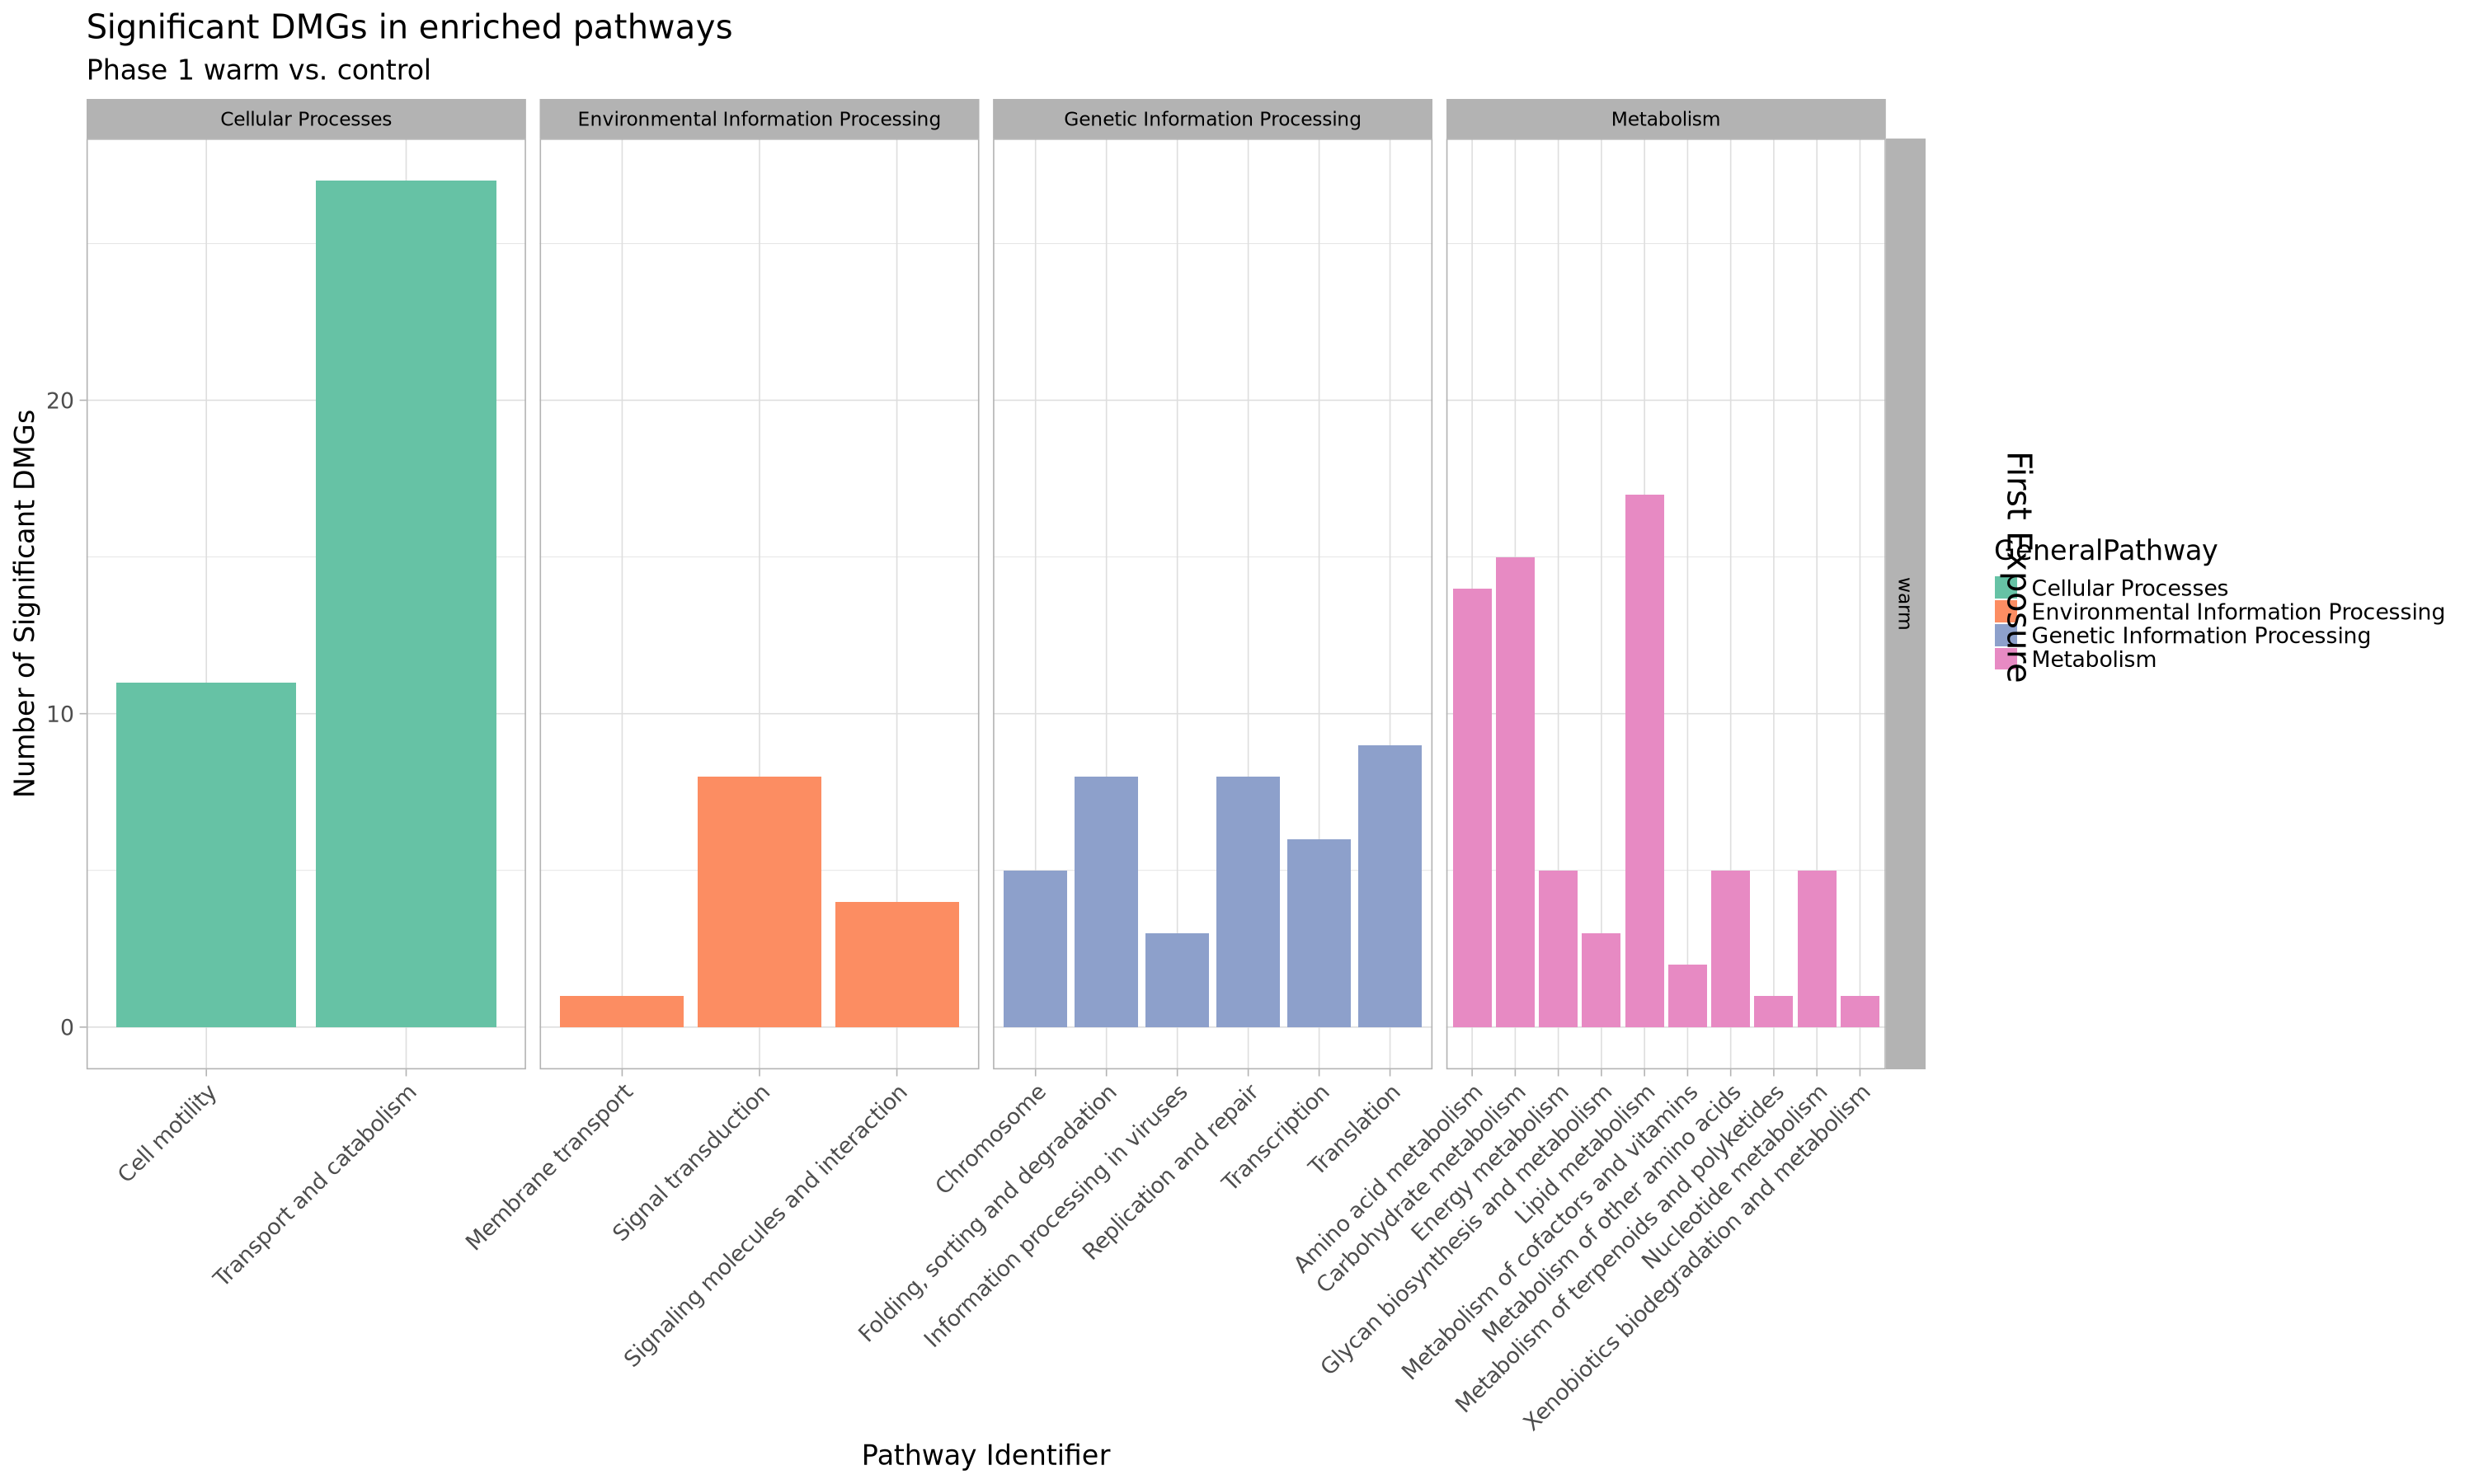

In [36]:
p1_wc_kegg_plot <- ggplot(data= result_df_merged, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar() + 
#coord_flip() +
theme_light(base_size=20) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1), 
      legend.box.margin=margin(l=20),
      plot.tag=element_text(angle=-90),
      plot.tag.position=c(0.82, 0.62)) +
labs(title = 'Significant DMGs in enriched pathways', subtitle = 'Phase 1 warm vs. control', y = 'Number of Significant DMGs', 
    x = 'Pathway Identifier', tag='First Exposure')

p1_wc_kegg_plot

now need to do the same thing for phase 1 hypoxic, phase 2 hypoxic or control

## unfiltered DESeq KEGG analysis - CE Phase 1 Hypoxic

looking at **phase 1 hypoxic, phase 2 hypoxic or control**

In [37]:
# load in data frame
unfiltered_p1h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1h_lfc25_genes.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p1h, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1h_lfc25_genes.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

In [ ]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

In [ ]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

In [ ]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

In [ ]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1hyp_p2hc_pathways.csv')

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


```
# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```

**adding pathway meta data to data frame**

```
# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))
```

now need to **clean up data frame**

```
df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)
```

```
# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p1h_ce_kegg_pathway.csv')
```

In [76]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1h_ce_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [77]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [78]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

want to get the same general pathway bars next to each other 

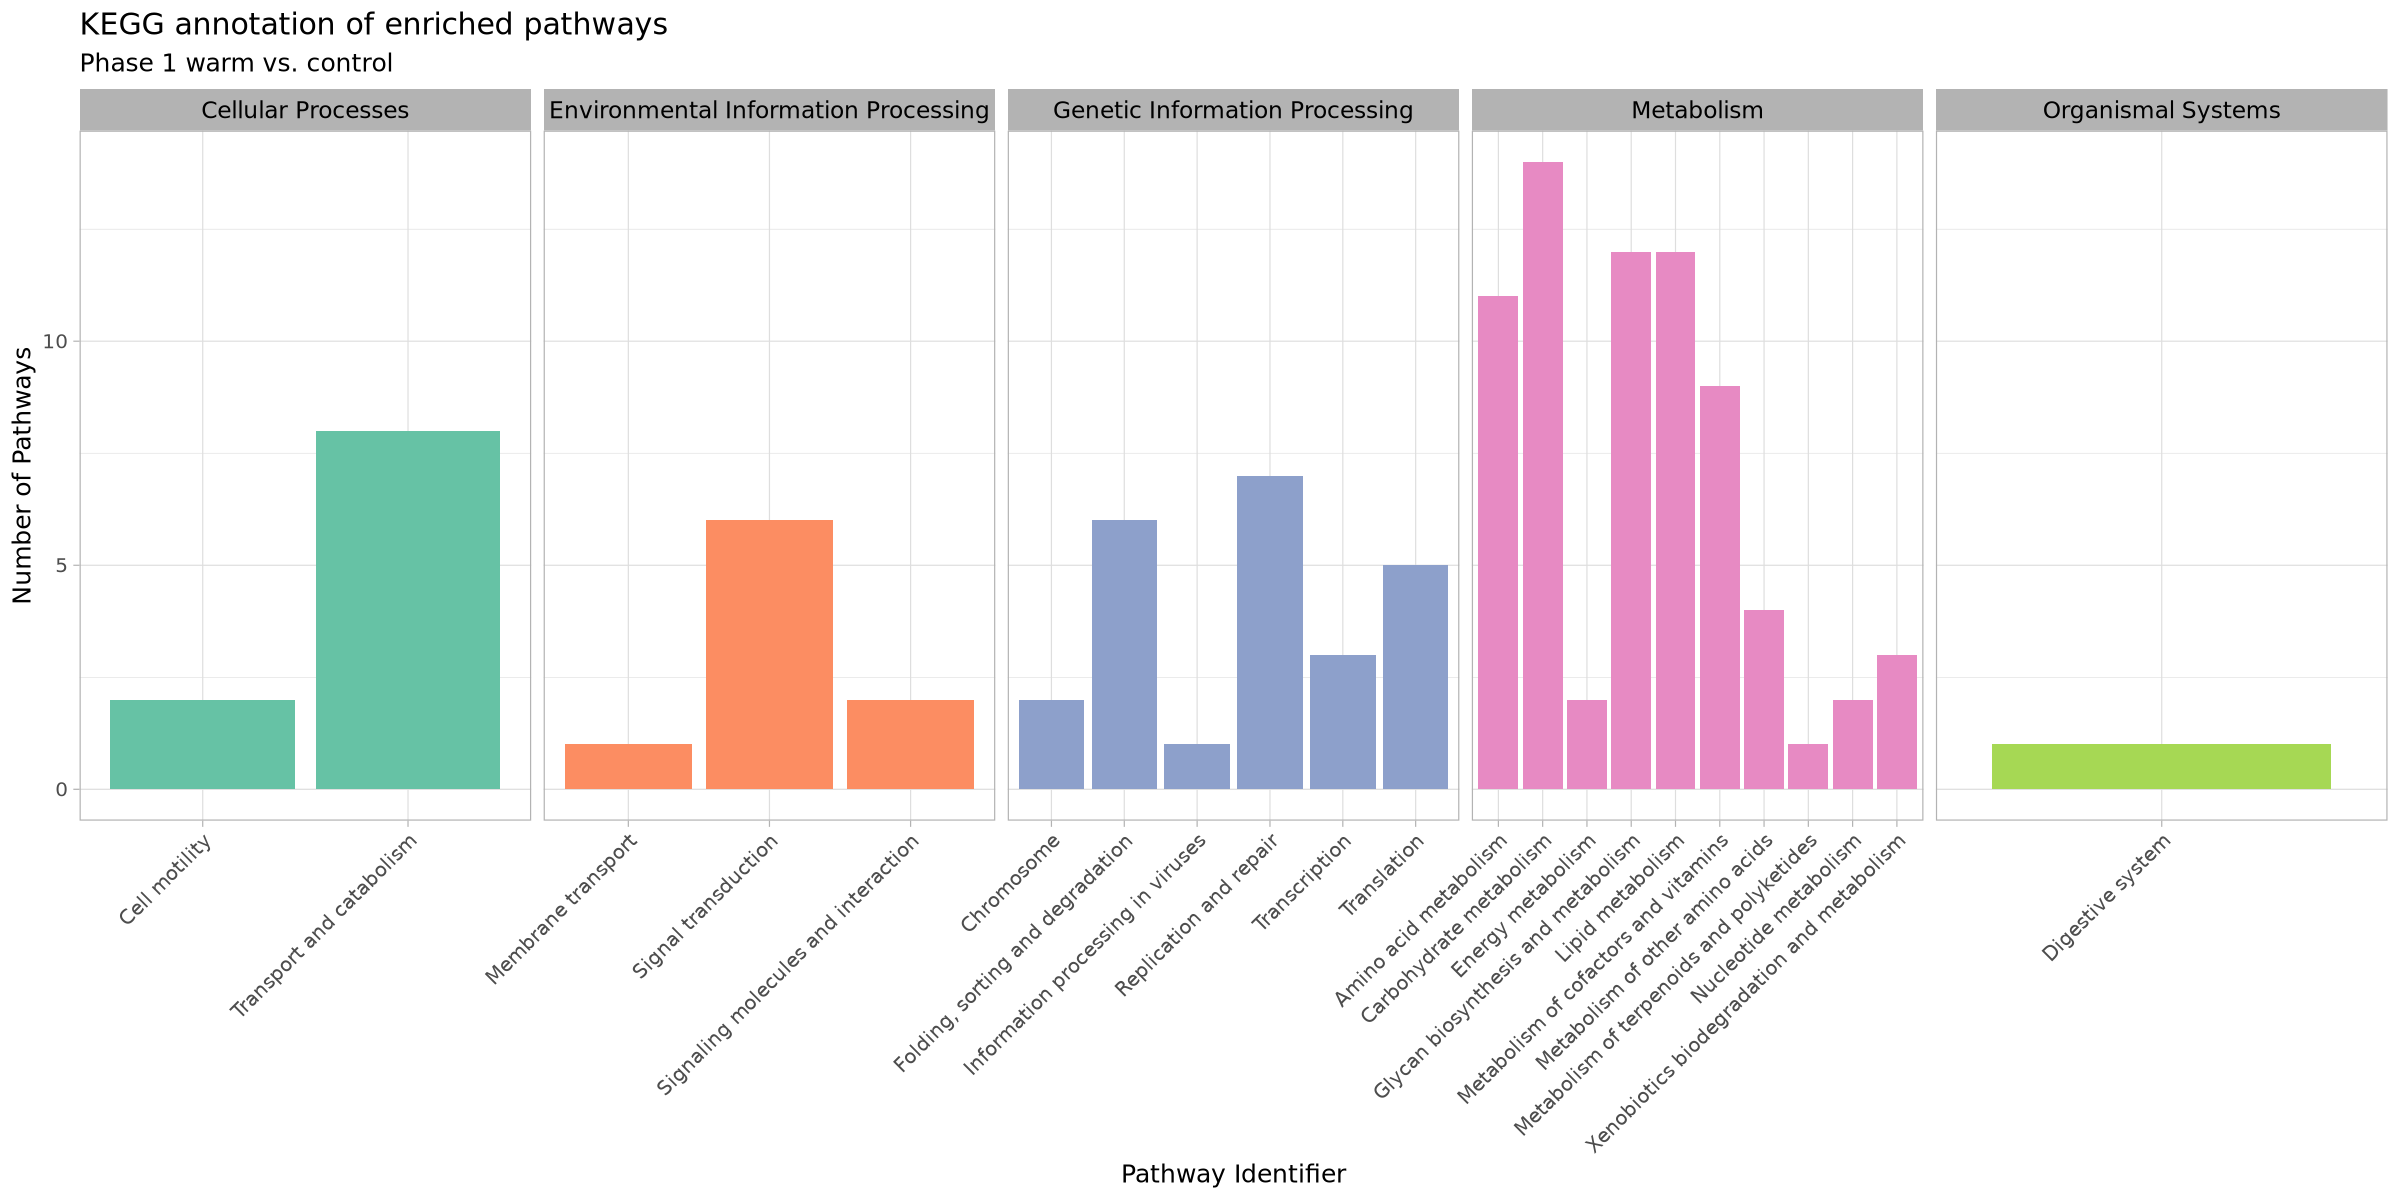

In [41]:
ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(~GeneralPathway, scales='free') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 warm vs. control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [79]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                             enrichmentScore
1 cvn00270 cvn00270 Cysteine and methionine metabolism       0.5220963     
2 cvn00592 cvn00592 alpha-Linolenic acid metabolism         -0.6794618     
3 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids -0.5761533     
4 cvn03082 cvn03082 ATP-dependent chromatin remodeling      -0.3769411     
5 cvn04120 cvn04120 Ubiquitin mediated proteolysis           0.3668674     
6 cvn00860 cvn00860 Porphyrin metabolism                     0.5385620     
  GeneralPathway                 DetailedPathway                      direction
1 Metabolism                     Amino acid metabolism                hypoxic  
2 Metabolism                     Lipid metabolism                     control  
3 Metabolism                     Lipid metabolism                     control  
4 Genetic Information Processing Chromosome                           control  
5 Genetic Information Processing Folding, sorting and degradation     hypoxic  
6 Metabolism                     Metabolism of cofactors and vitamins hypoxic

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

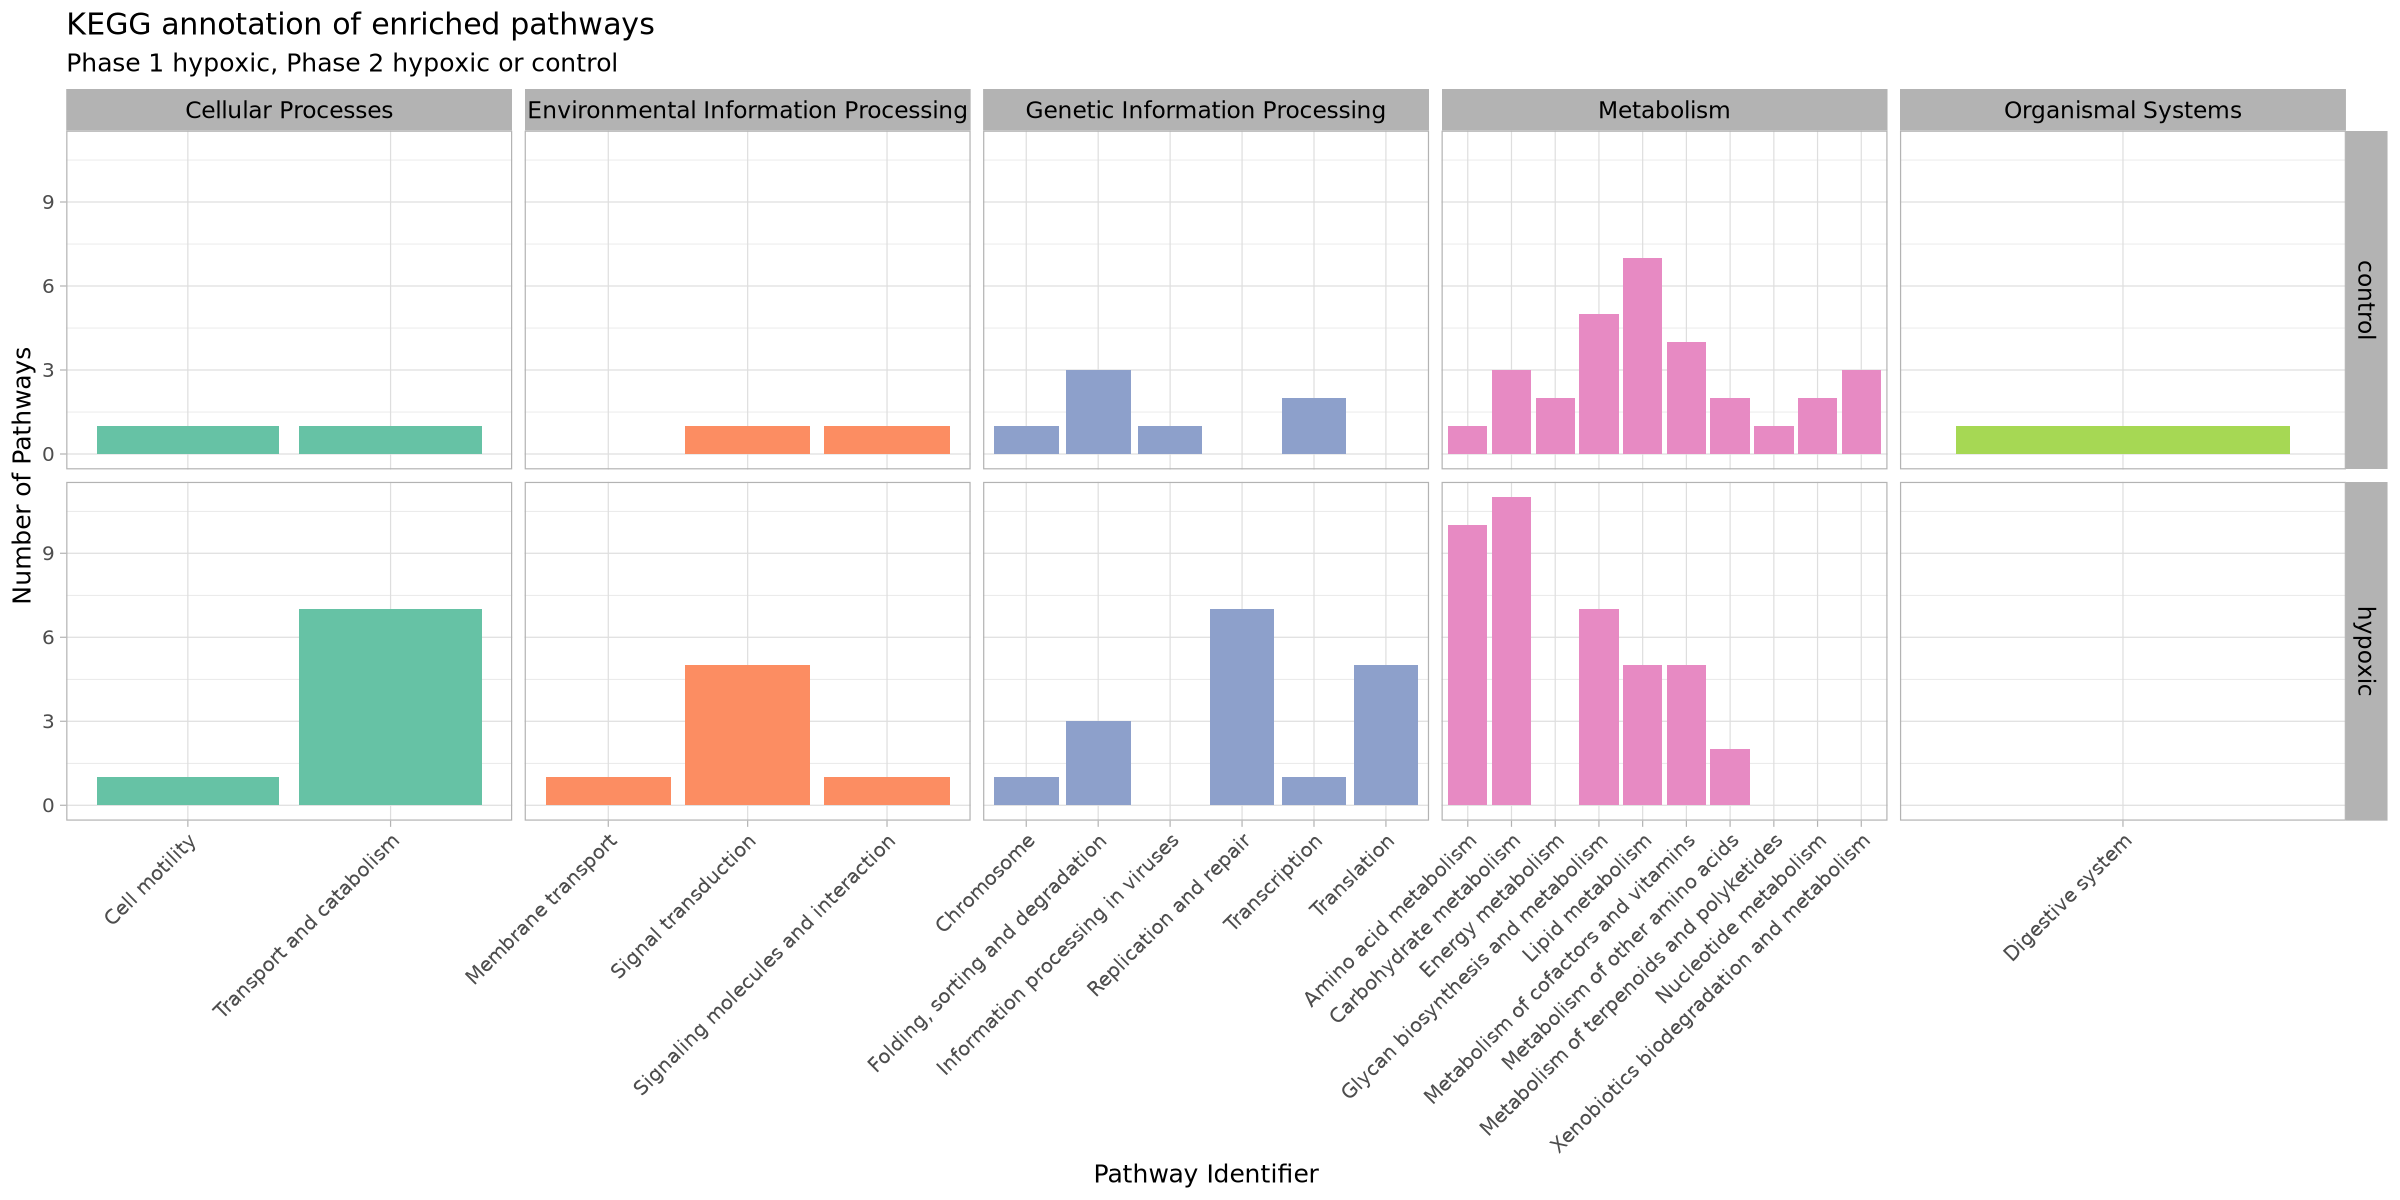

In [80]:
p1h_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic, Phase 2 hypoxic or control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1h_ce_kegg_plot

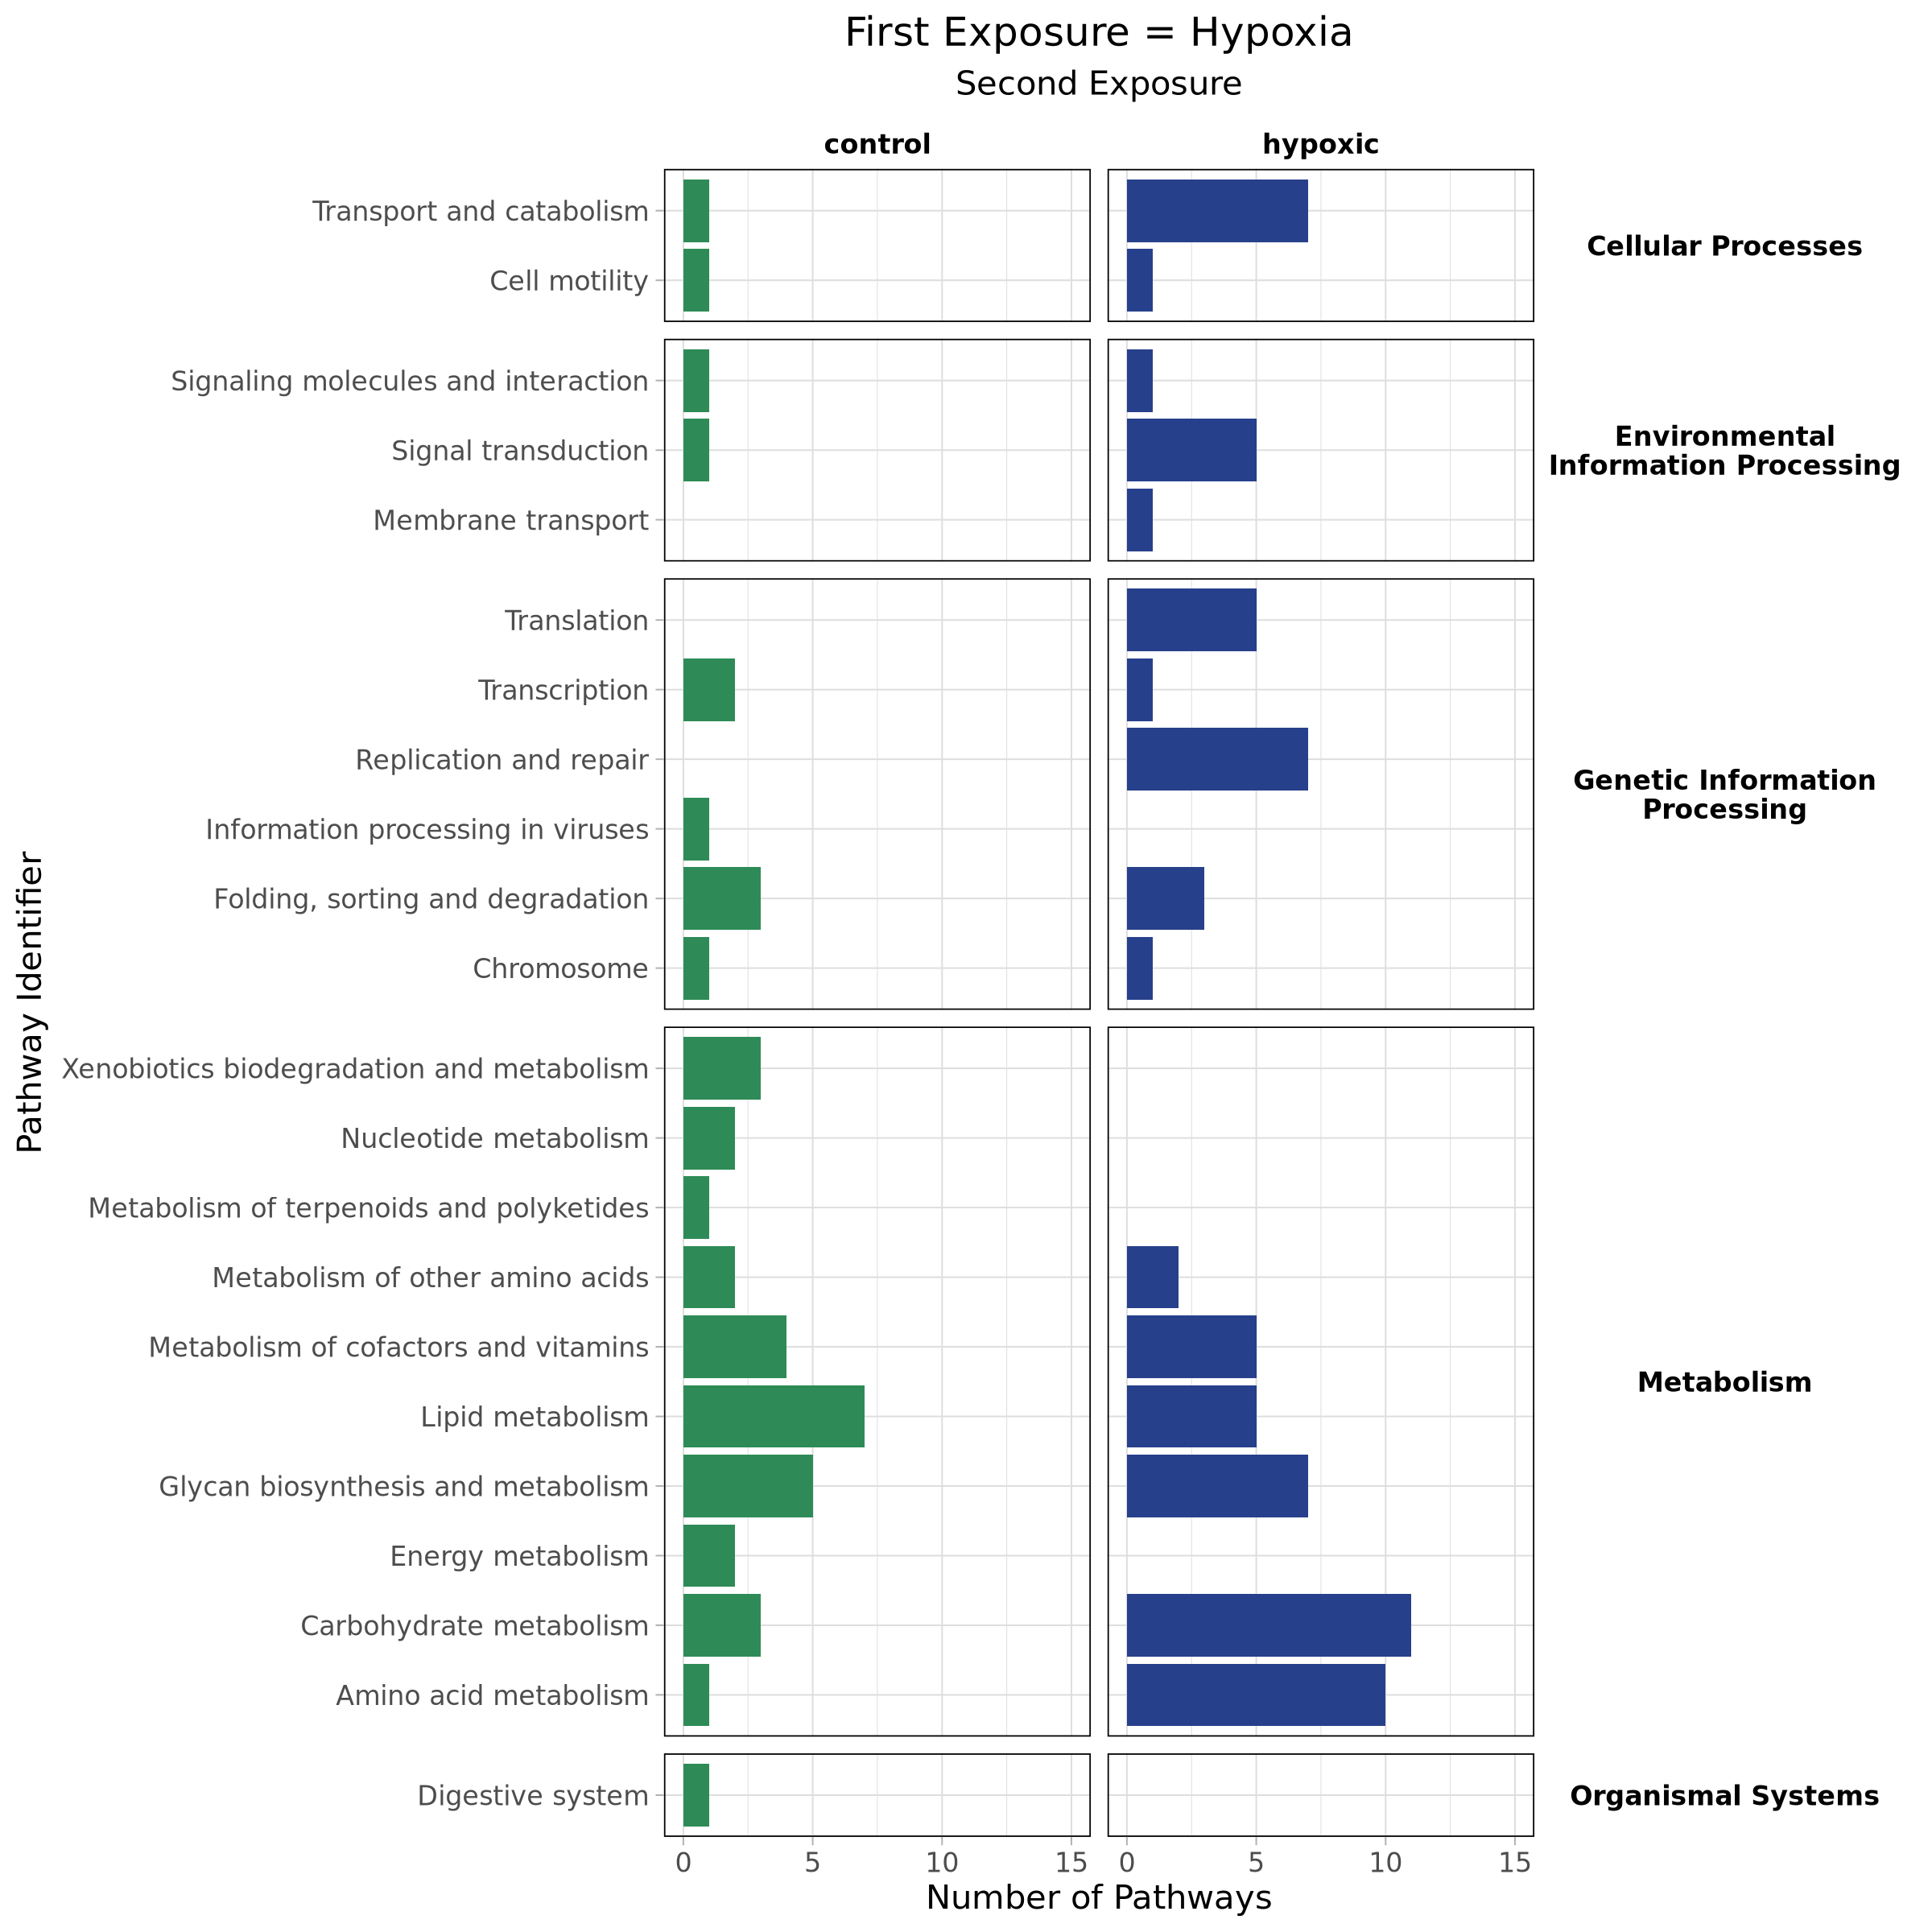

In [81]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

# changing color scheme

p1h_ce_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('seagreen4', 'royalblue4')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(GeneralPathway~direction, 
           scales='free_y', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_x_continuous(limits = c(0,15)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(size=20),
      plot.subtitle = element_text(hjust = 0.5),
      plot.title = element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(subtitle = 'Second Exposure', x = 'Number of Pathways', title = 'First Exposure = Hypoxia', 
    y = 'Pathway Identifier')

p1h_ce_kegg_plot

In [82]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("seagreen4",'royalblue4')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [83]:
# bc all had a first exposure of hypoxia here
df2$exposure <- 'Second Exposure'
head(df2)

X        ID       Description                             enrichmentScore
1 cvn00270 cvn00270 Cysteine and methionine metabolism       0.5220963     
2 cvn00592 cvn00592 alpha-Linolenic acid metabolism         -0.6794618     
3 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids -0.5761533     
4 cvn03082 cvn03082 ATP-dependent chromatin remodeling      -0.3769411     
5 cvn04120 cvn04120 Ubiquitin mediated proteolysis           0.3668674     
6 cvn00860 cvn00860 Porphyrin metabolism                     0.5385620     
  GeneralPathway                 DetailedPathway                      direction
1 Metabolism                     Amino acid metabolism                hypoxic  
2 Metabolism                     Lipid metabolism                     control  
3 Metabolism                     Lipid metabolism                     control  
4 Genetic Information Processing Chromosome                           control  
5 Genetic Information Processing Folding, sorting and degradation     hypoxic  
6 Metabolism                     Metabolism of cofactors and vitamins hypoxic  
  exposure       
1 Second Exposure
2 Second Exposure
3 Second Exposure
4 Second Exposure
5 Second Exposure
6 Second Exposure

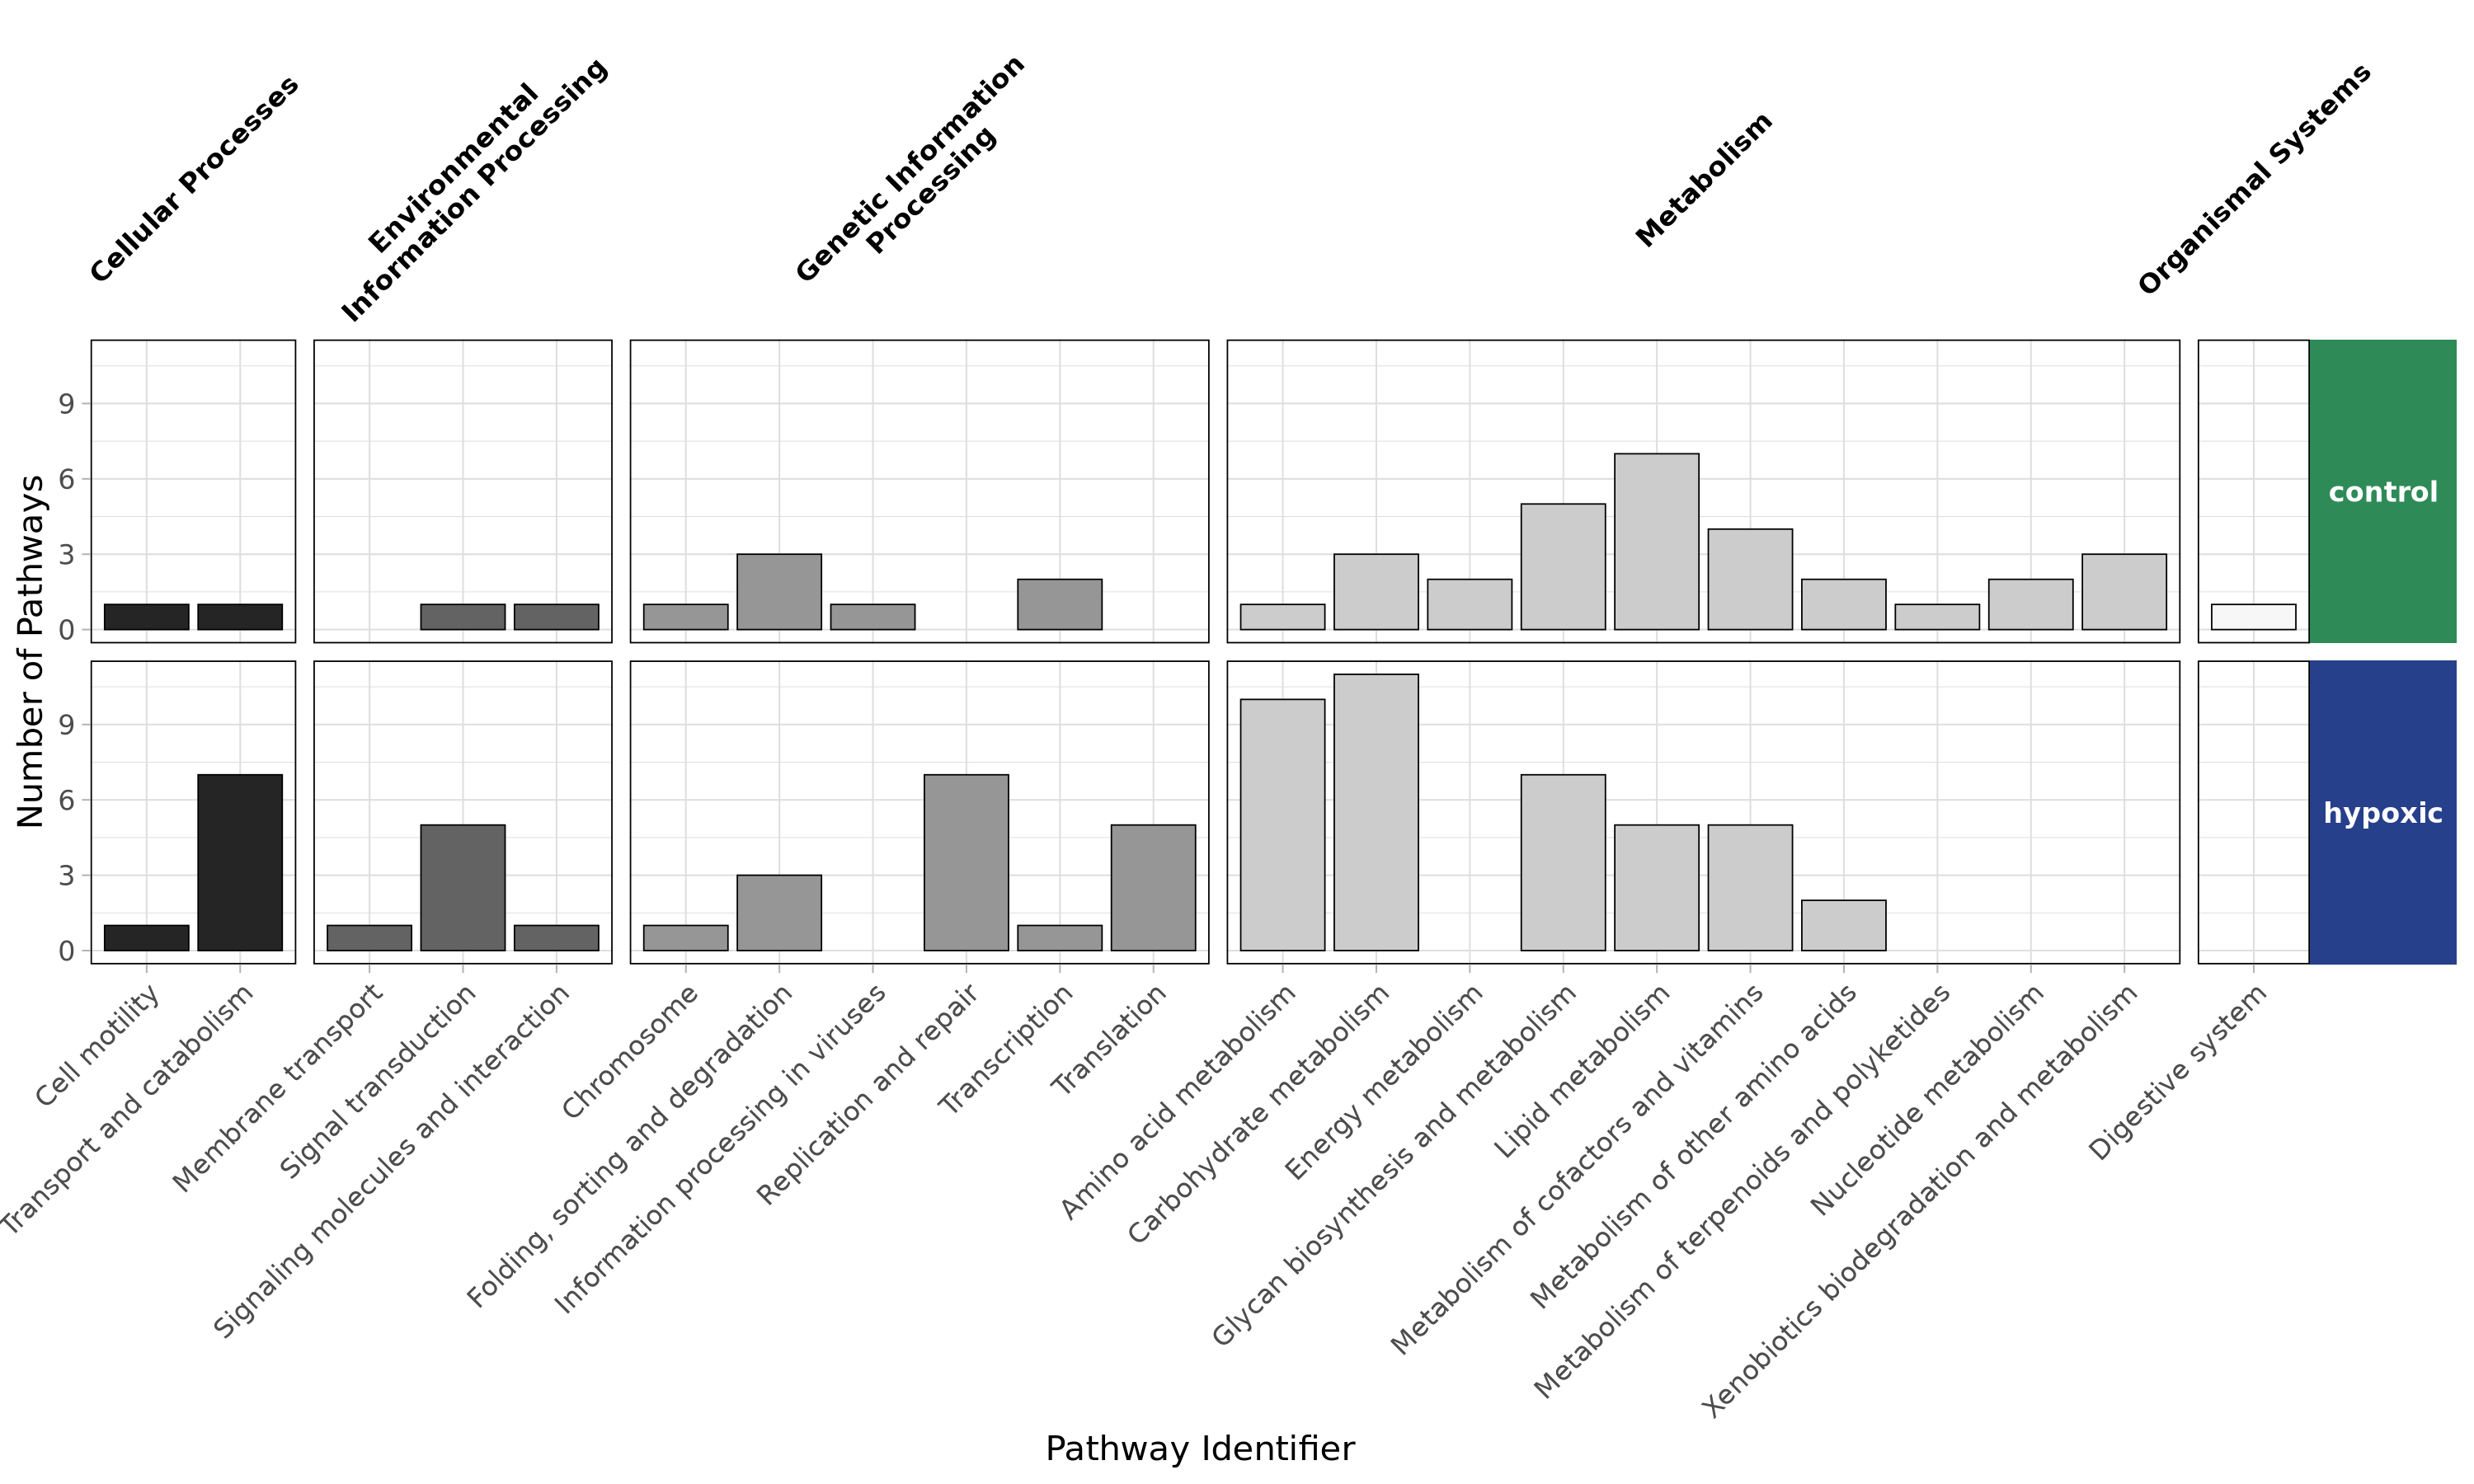

In [84]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_brewer(palette = 'Greys', direction=-1) +
theme(strip.text = element_text(size = 14),
      strip.text.x = element_text(color = 'black'),
     strip.text.y = element_text(color = 'white')) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

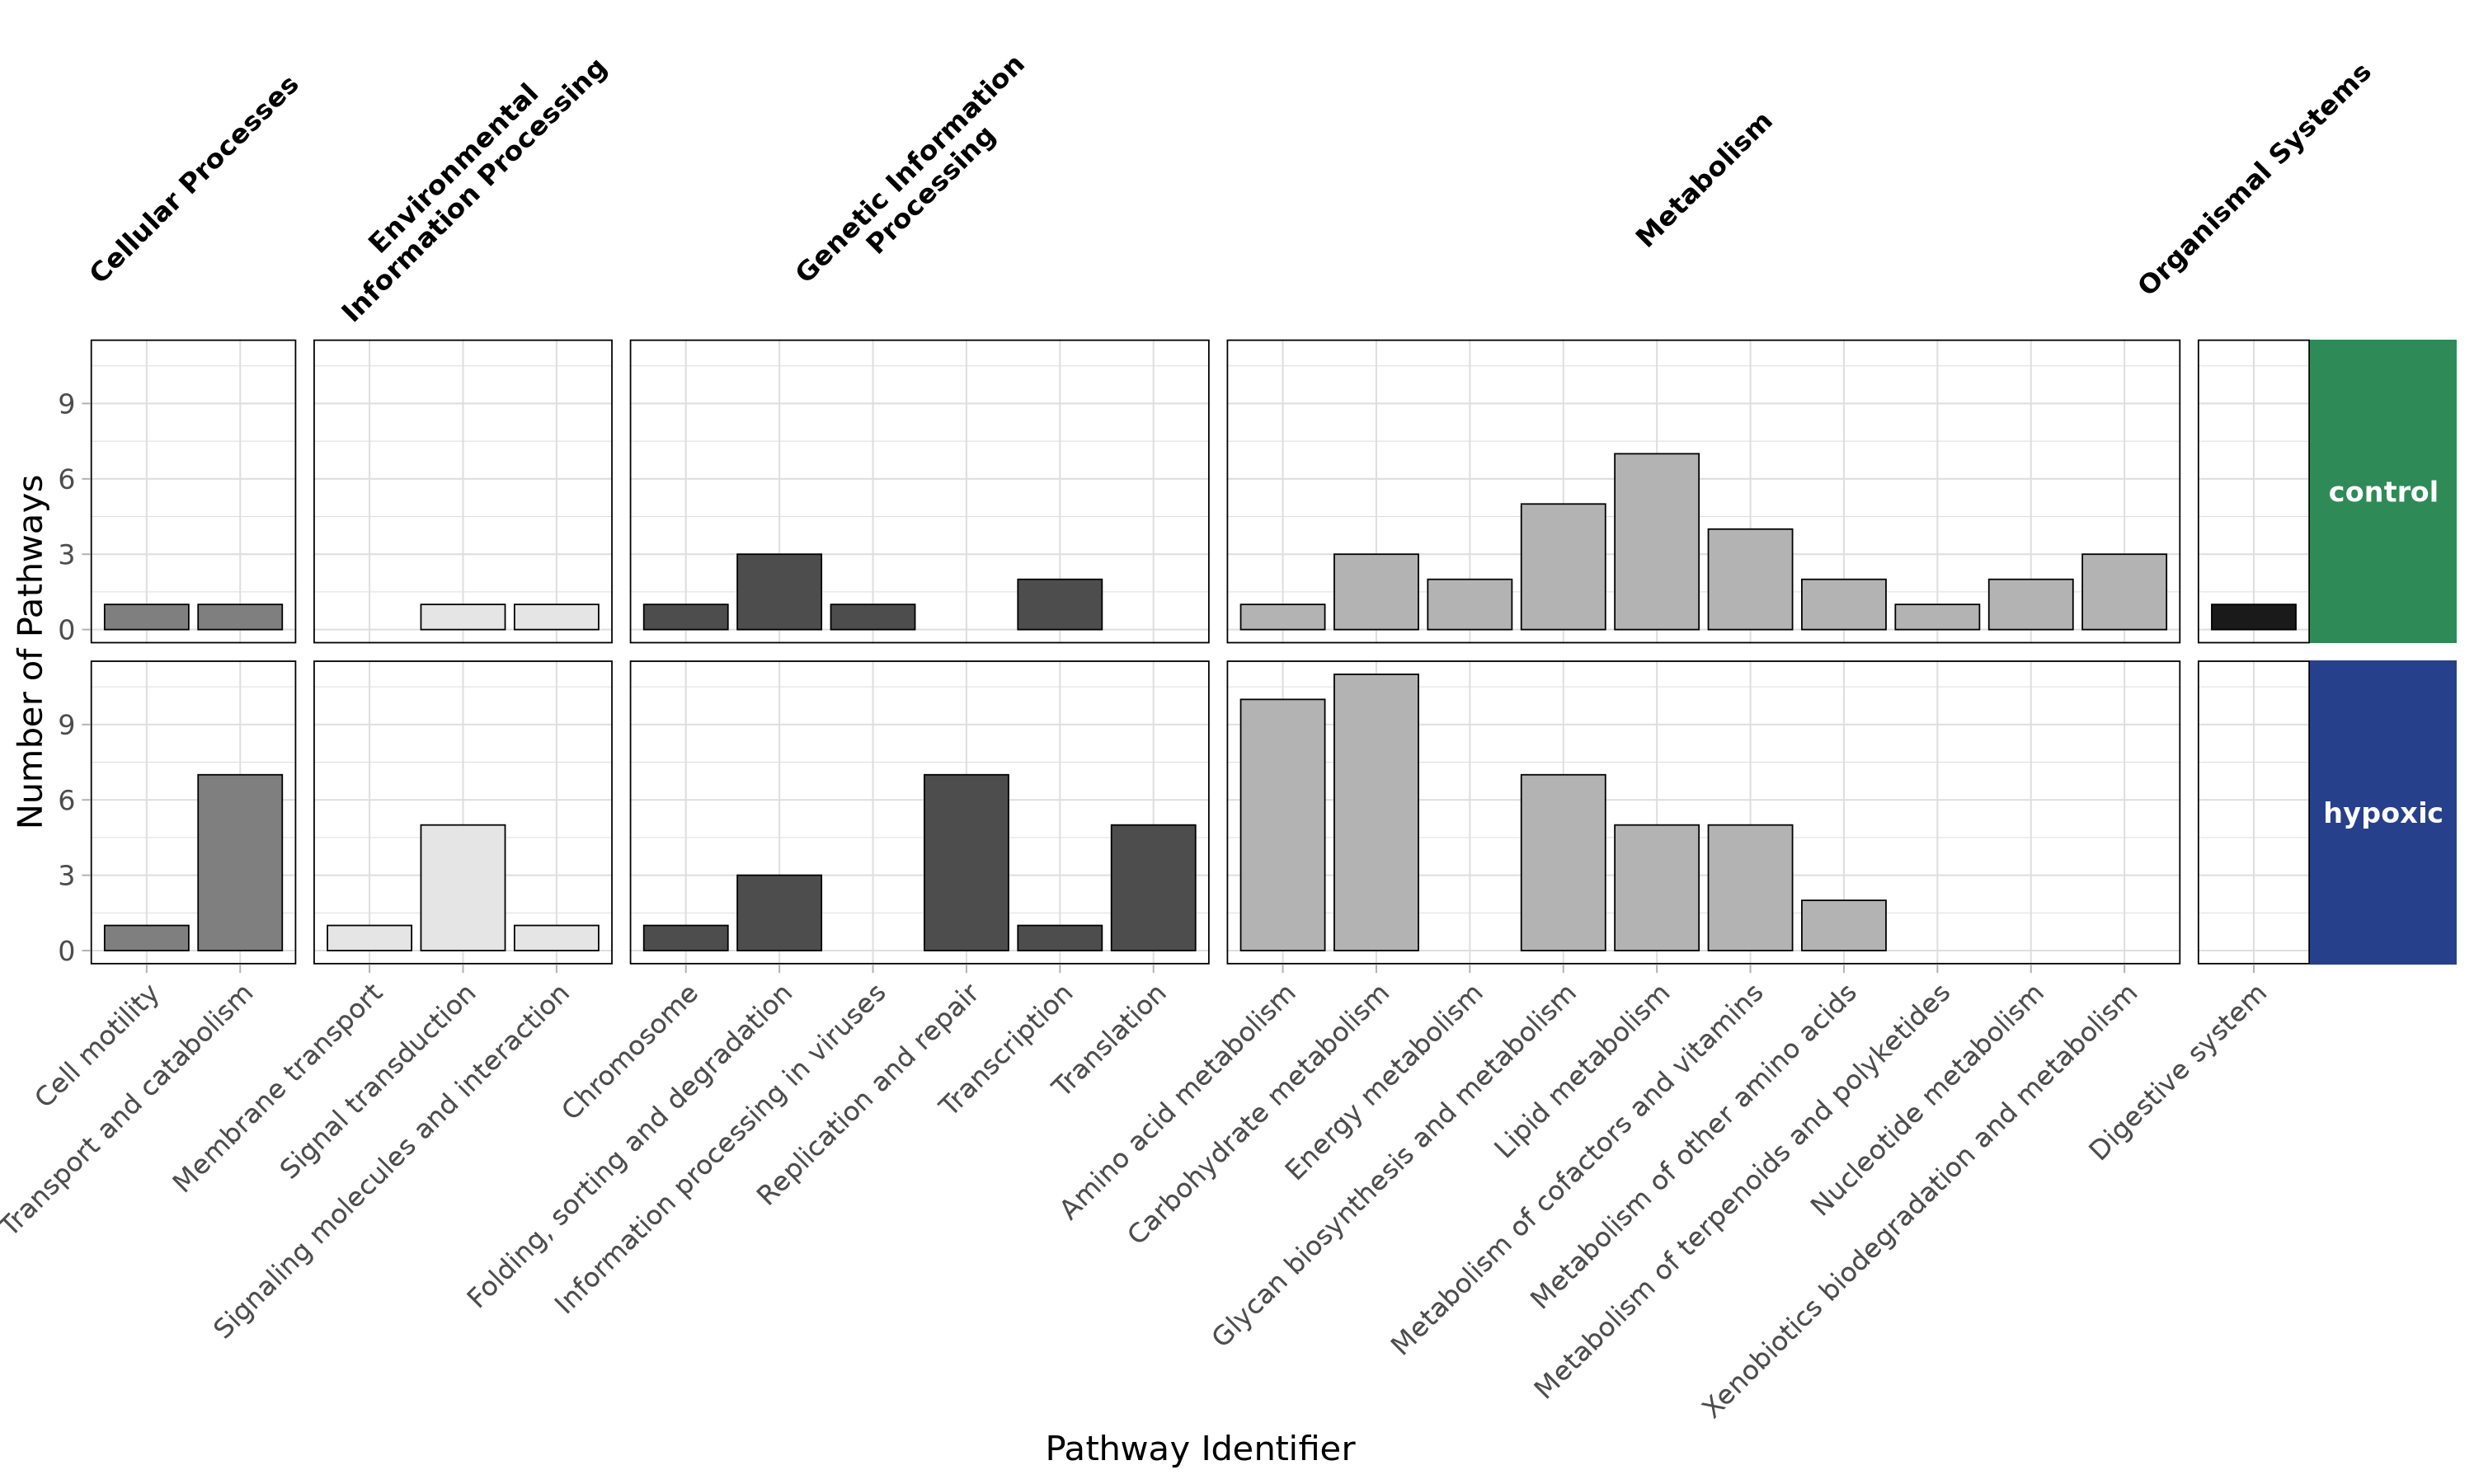

In [85]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_manual(values = c('grey50', 'grey90', 'grey30', 'grey70', 'grey10')) +
theme(strip.text = element_text(size = 14),
      strip.text.x = element_text(color = 'black'),
     strip.text.y = element_text(color = 'white')) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

In [48]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p1h_ce_kegg_pathways.pdf', width=20, height=10)

# open plot
p1h_ce_kegg_plot

# close pdf file
dev.off()

png 
  2

## unfiltered DESeq KEGG analysis - all oysters phase 2 = control
still looking at significantly differentially methylated genes for phase 1 warm vs. control, but now genes get assigned NA for adjusted p-values *only* when the gene has low counts (so this now includes outliers, instead of assigning outliers NA), therefore, different genes will be kept in the analysis for enriched pathways

looking at **phase 1 hypoxic or control, phase 2 control**

In [49]:
# load in data frame
unfiltered_p2c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p2c_lfc25_genes.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p2c, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p2c_lfc25_genes.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

In [ ]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

In [ ]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

In [ ]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

In [ ]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2cont_p1ch_pathways.csv')

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


```
# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```

**adding pathway meta data to data frame**

```
# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))
```

now need to **clean up data frame**

```
df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)
```

```
# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_kegg_pathways/p2c_ce_kegg_pathway.csv')
```

In [50]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2c_ce_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [51]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [52]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

want to get the same general pathway bars next to each other 

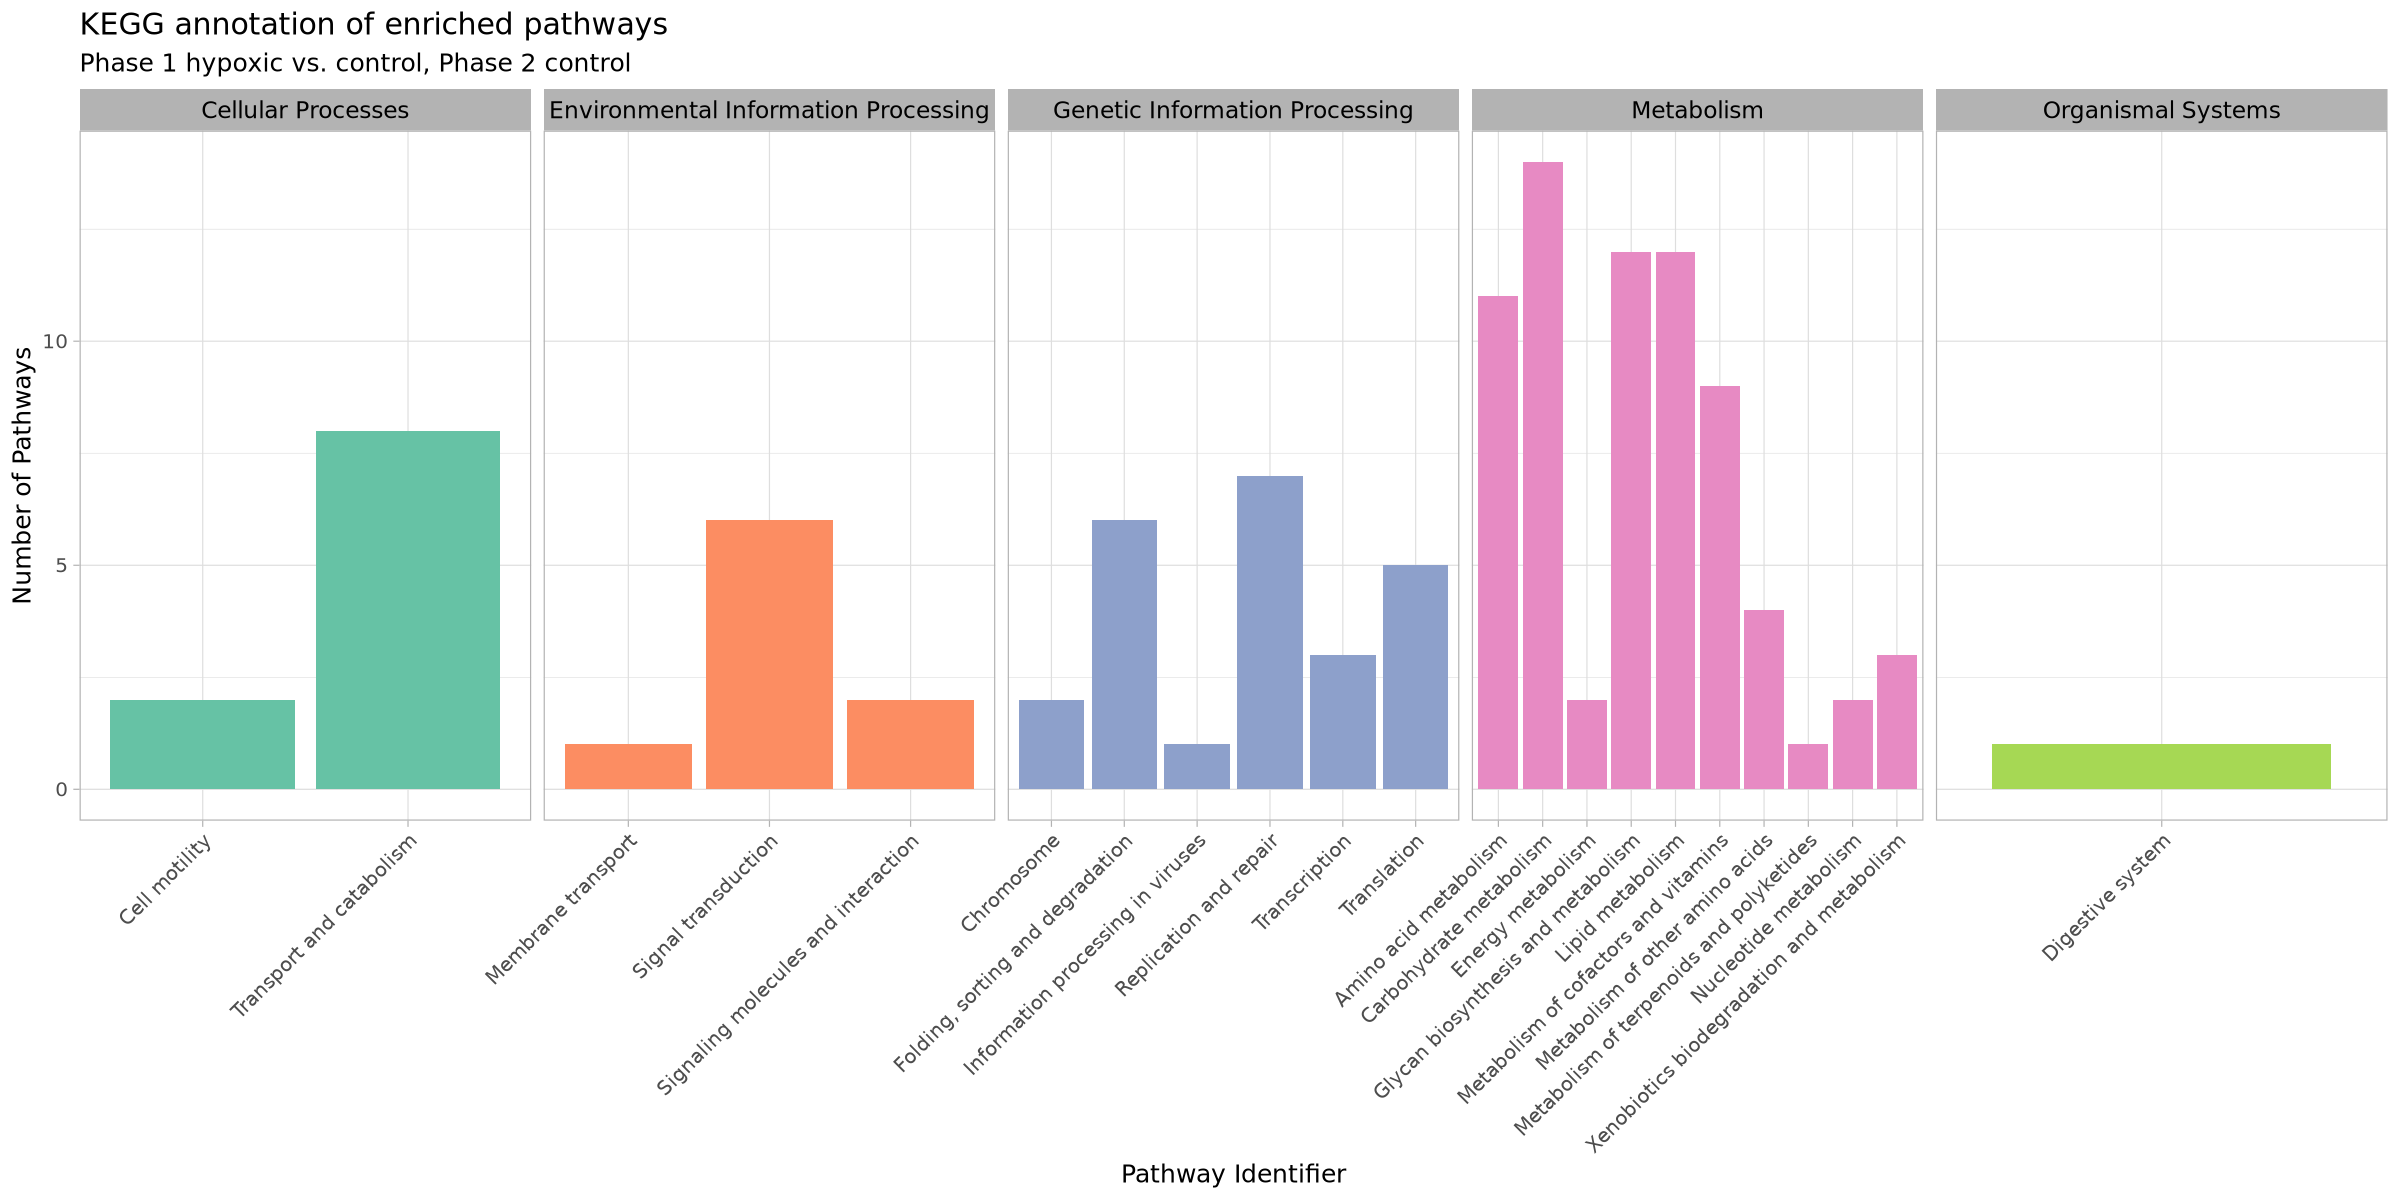

In [53]:
ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(~GeneralPathway, scales='free') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic vs. control, Phase 2 control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [54]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                             enrichmentScore
1 cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
2 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
3 cvn00310 cvn00310 Lysine degradation                      -0.4896714     
4 cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
5 cvn04146 cvn04146 Peroxisome                               0.3458777     
6 cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
  GeneralPathway                       DetailedPathway          direction
1 Metabolism                           Lipid metabolism         hypoxic  
2 Metabolism                           Lipid metabolism         hypoxic  
3 Metabolism                           Amino acid metabolism    control  
4 Genetic Information Processing       Translation              control  
5 Cellular Processes                   Transport and catabolism hypoxic  
6 Environmental Information Processing Signal transduction      control

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

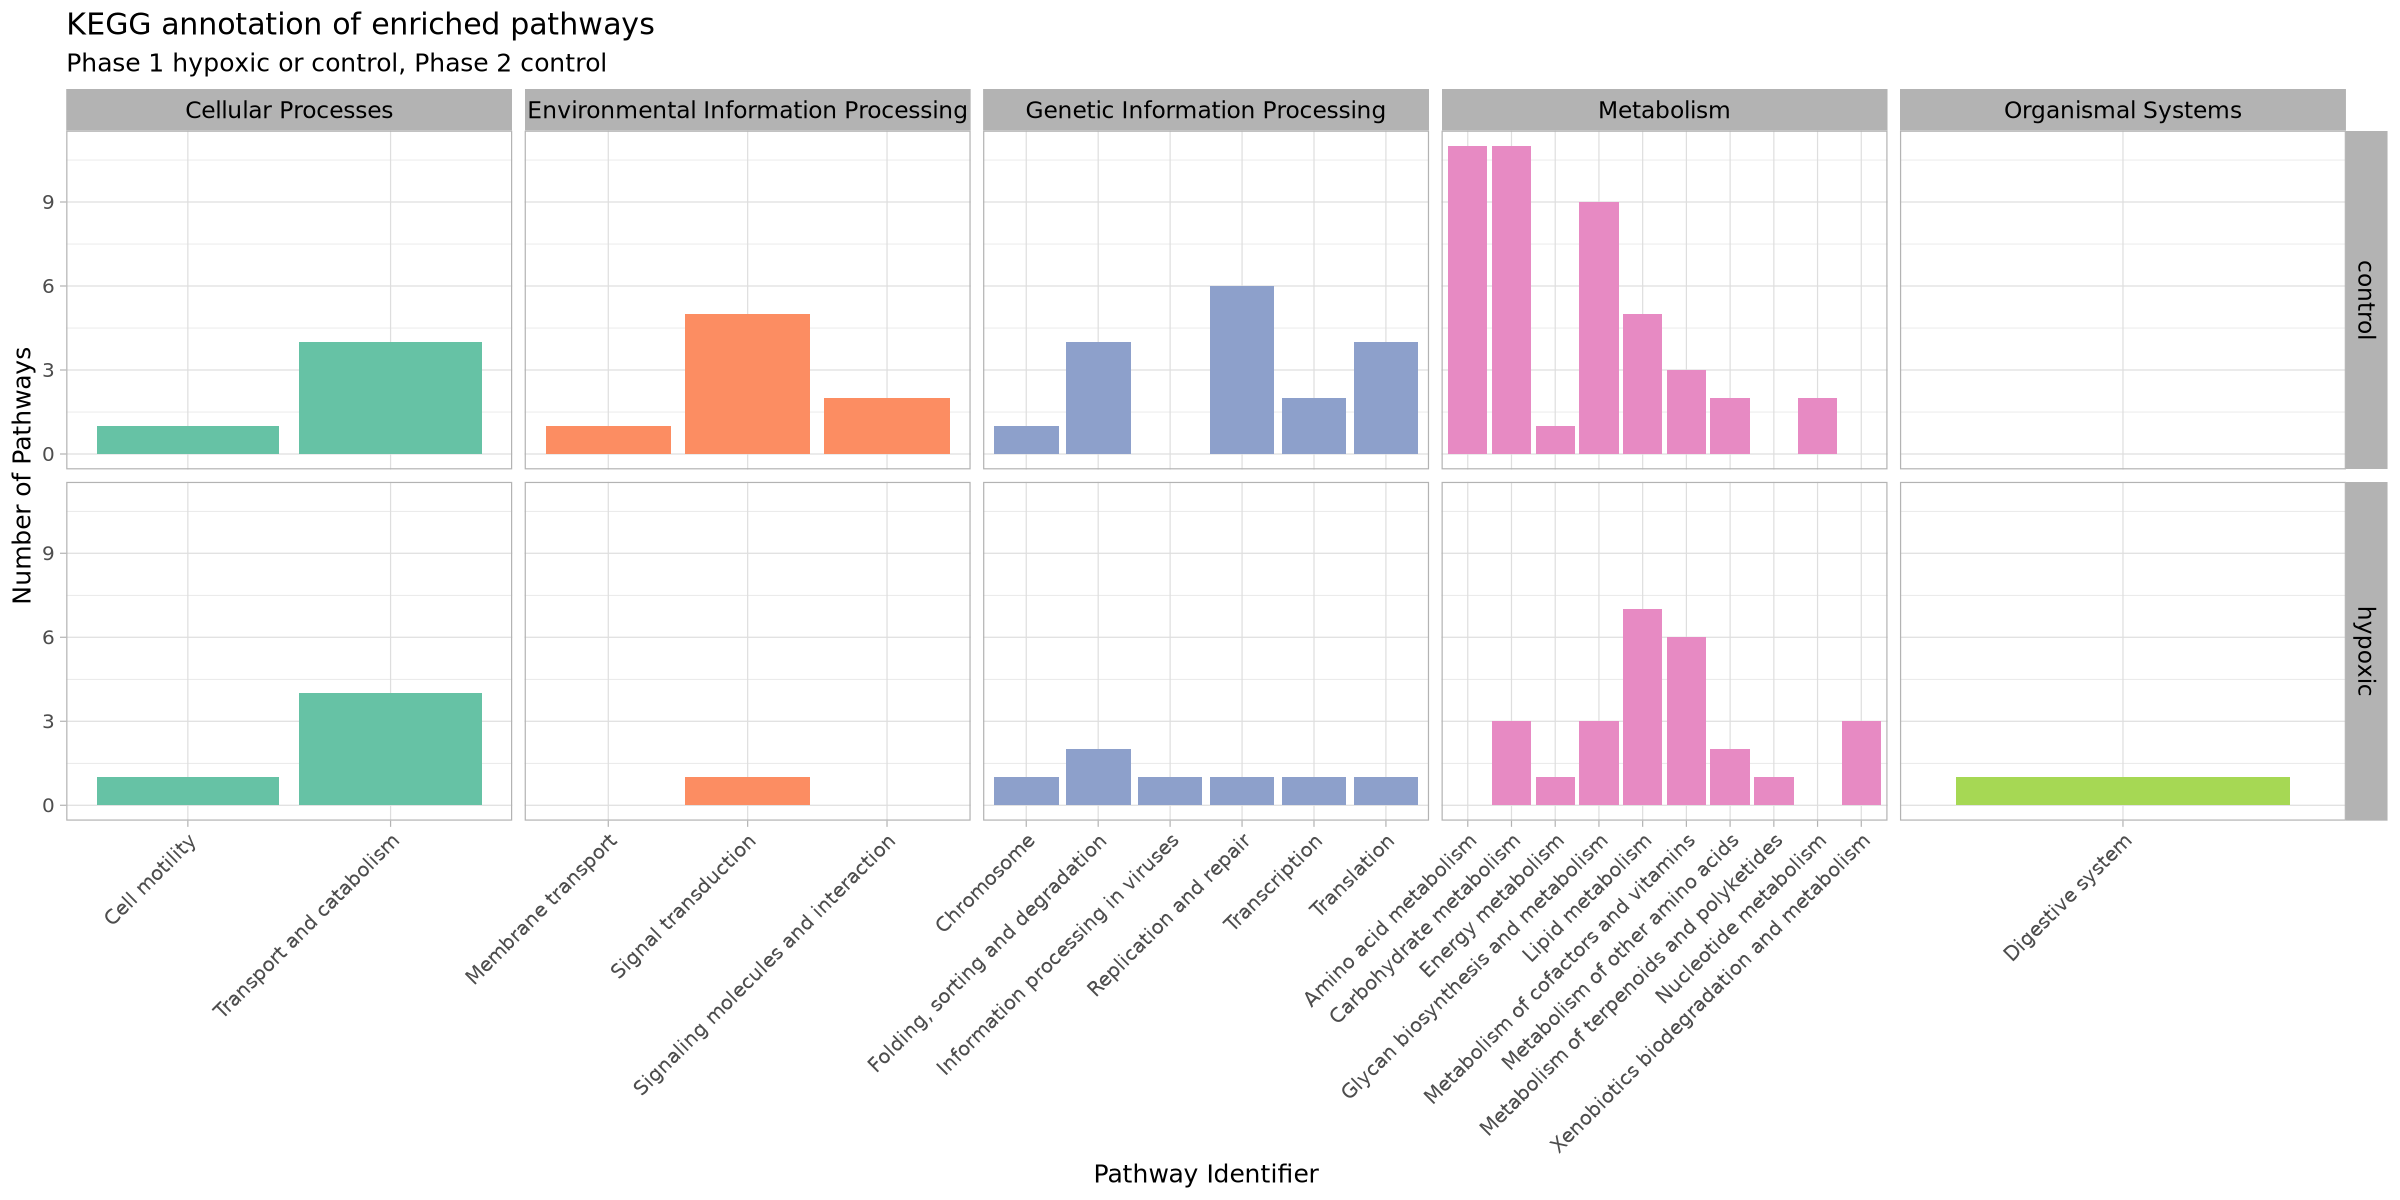

In [55]:
p2c_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic or control, Phase 2 control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p2c_ce_kegg_plot

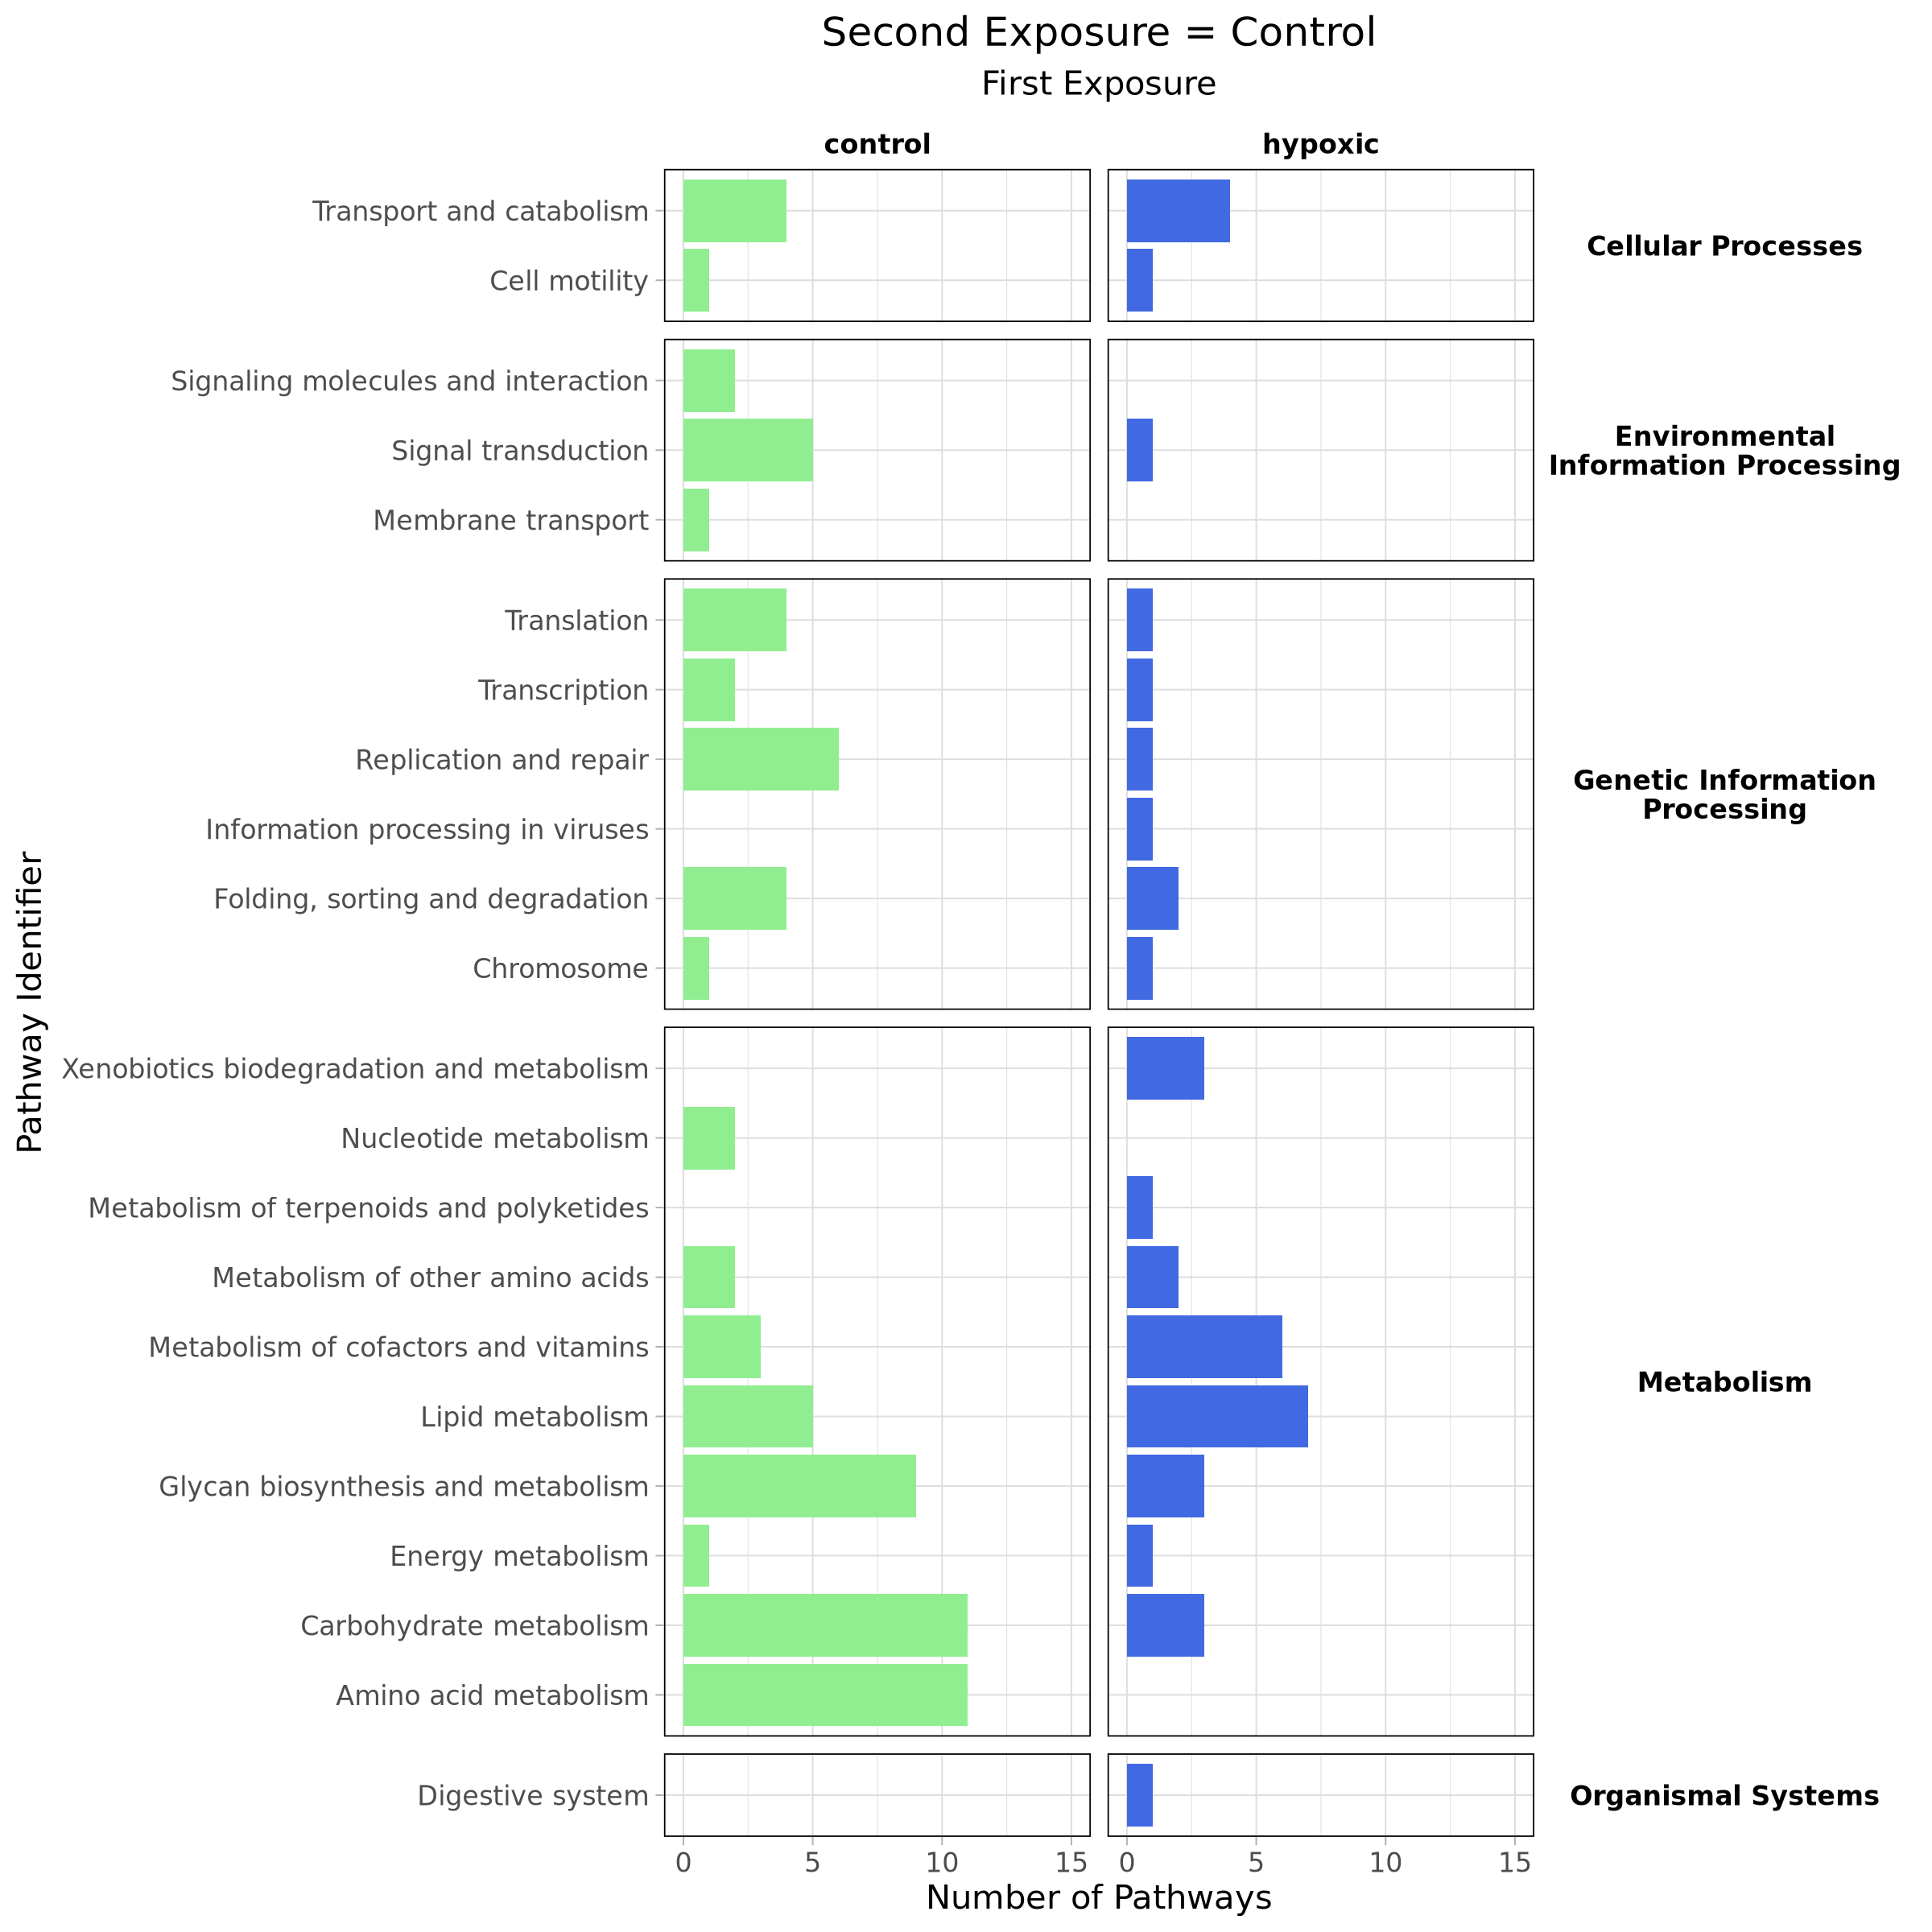

In [56]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

# changing color scheme

p2c_ce_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('lightgreen', 'royalblue')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(GeneralPathway~direction, 
           scales='free_y', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_x_continuous(limits = c(0,15)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(size=20),
      plot.subtitle = element_text(hjust = 0.5),
      plot.title = element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(subtitle = 'First Exposure', x = 'Number of Pathways', title = 'Second Exposure = Control', 
    y = 'Pathway Identifier')

p2c_ce_kegg_plot

In [57]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("lightgreen",'royalblue')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [58]:
# bc all had a first exposure of hypoxia here
df2$exposure <- 'First Exposure'
head(df2)

X        ID       Description                             enrichmentScore
1 cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
2 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
3 cvn00310 cvn00310 Lysine degradation                      -0.4896714     
4 cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
5 cvn04146 cvn04146 Peroxisome                               0.3458777     
6 cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
  GeneralPathway                       DetailedPathway          direction
1 Metabolism                           Lipid metabolism         hypoxic  
2 Metabolism                           Lipid metabolism         hypoxic  
3 Metabolism                           Amino acid metabolism    control  
4 Genetic Information Processing       Translation              control  
5 Cellular Processes                   Transport and catabolism hypoxic  
6 Environmental Information Processing Signal transduction      control  
  exposure      
1 First Exposure
2 First Exposure
3 First Exposure
4 First Exposure
5 First Exposure
6 First Exposure

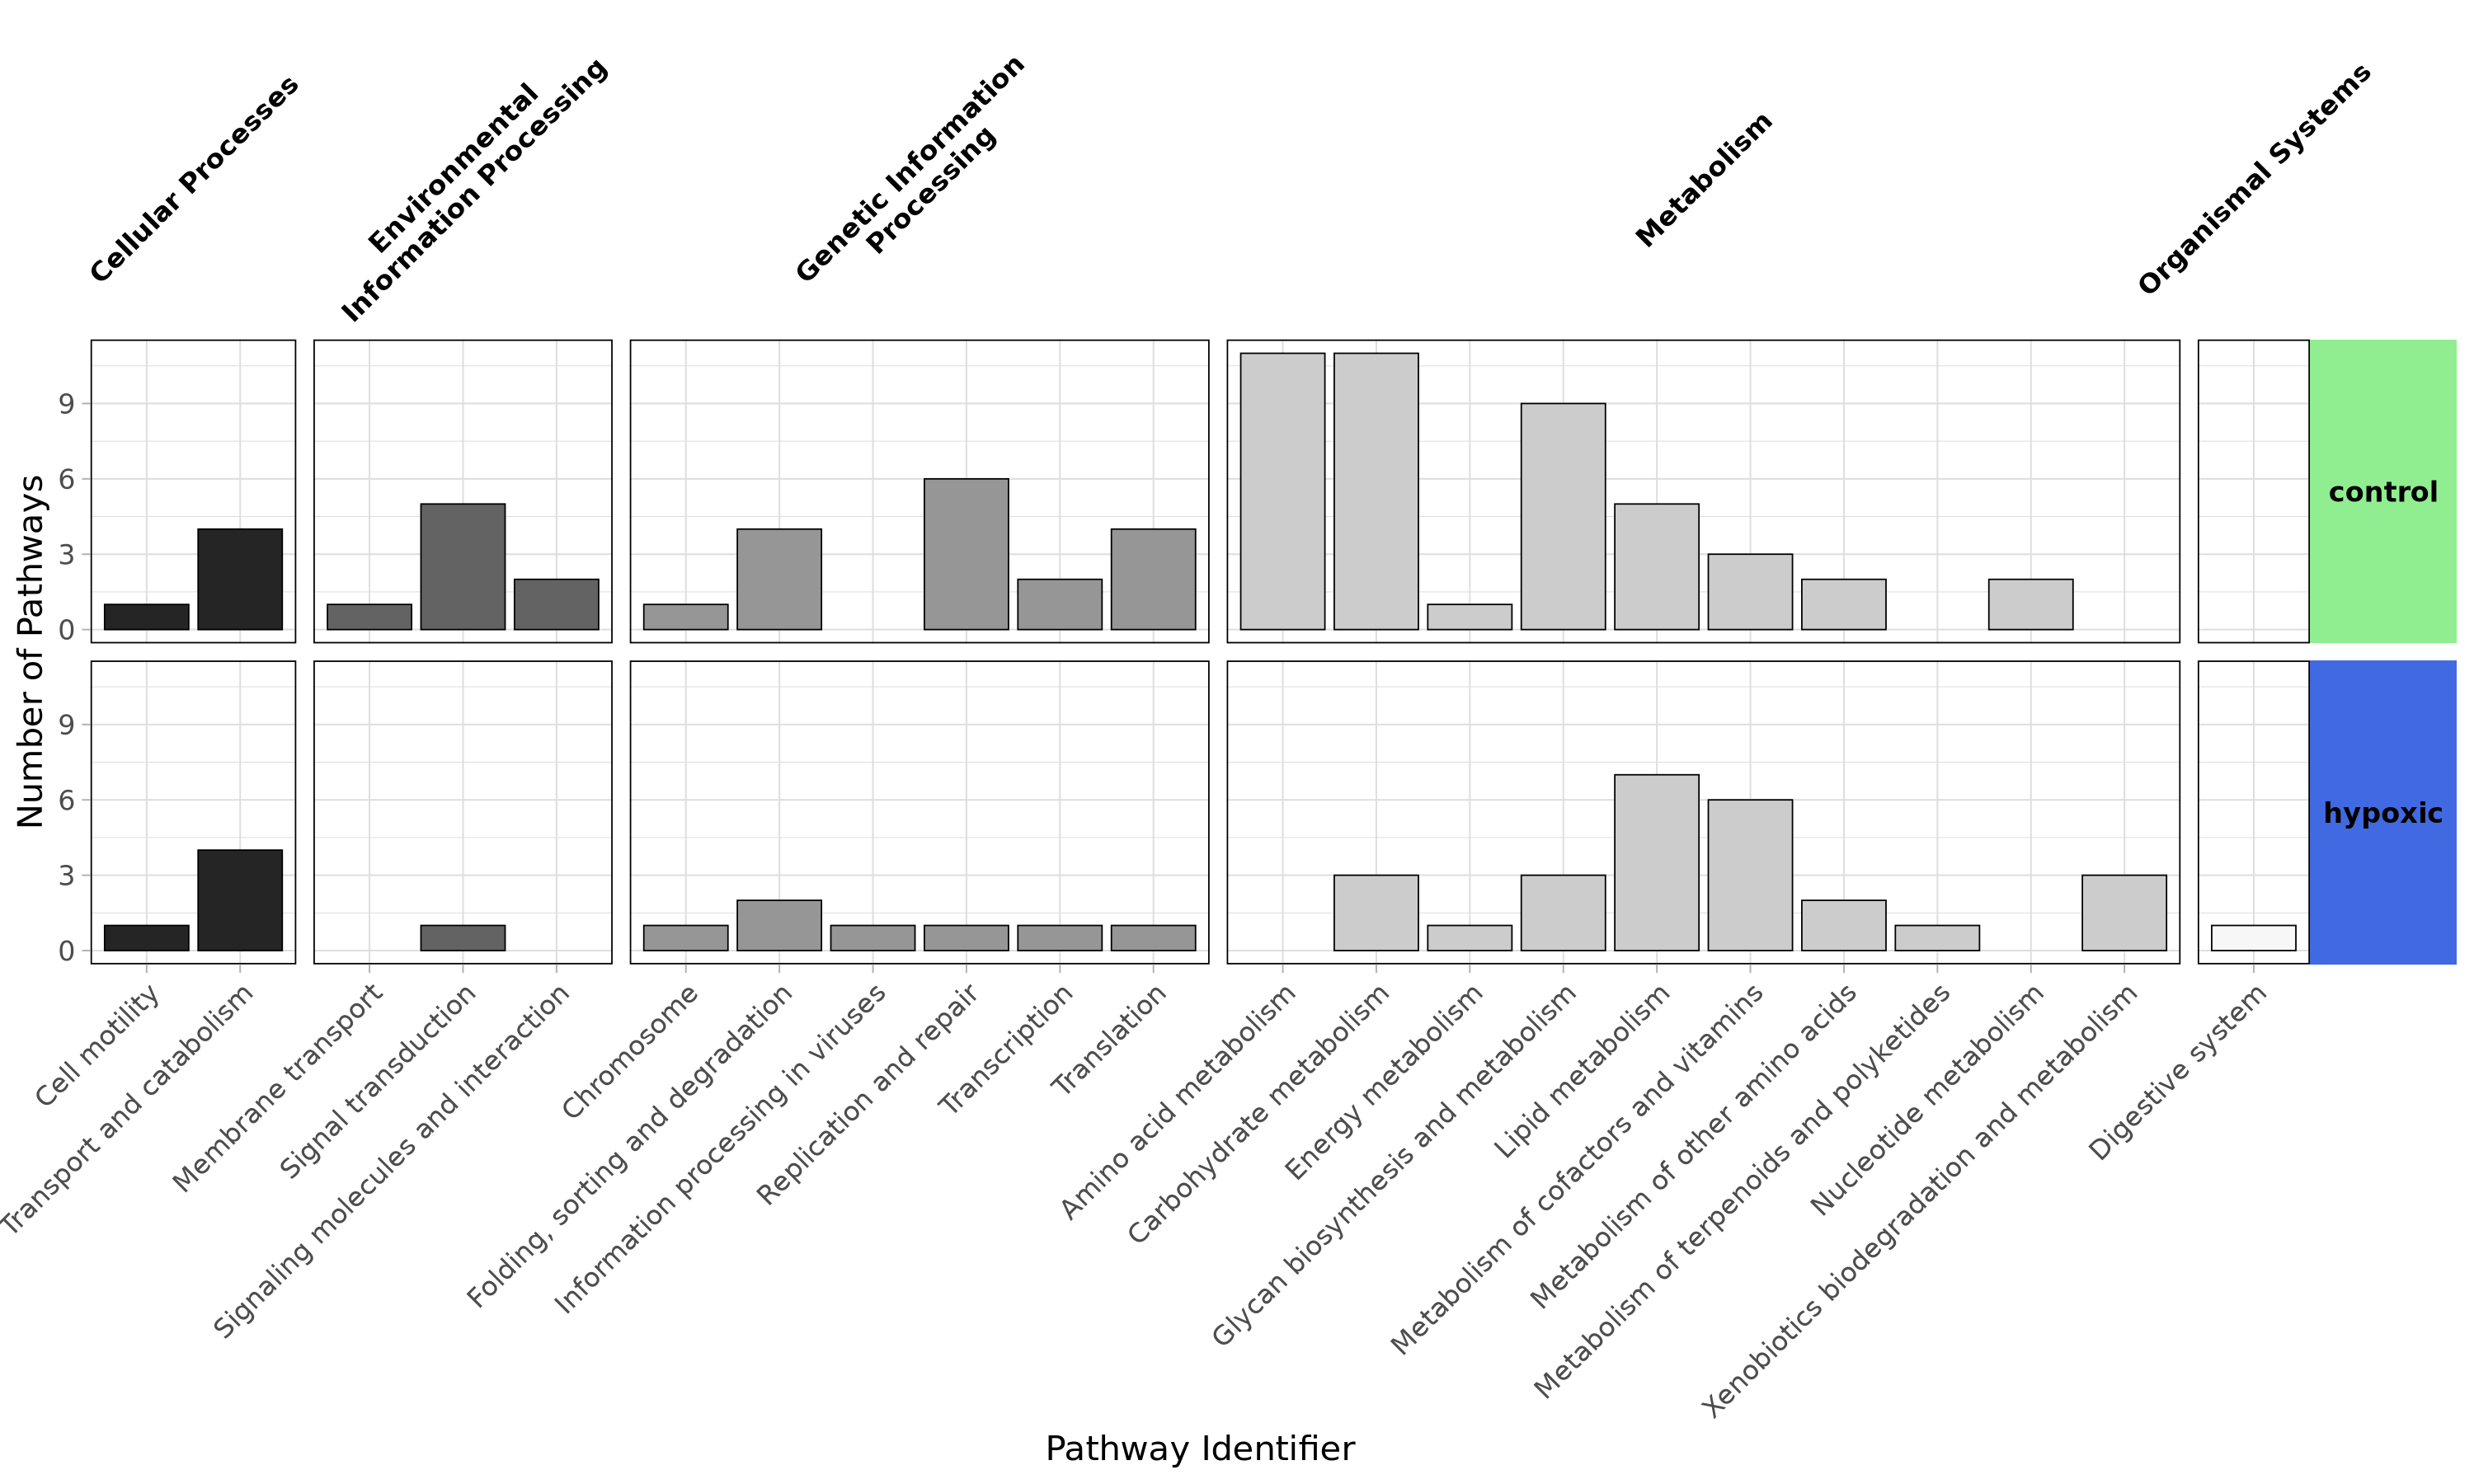

In [59]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_brewer(palette = 'Greys', direction=-1) +
theme(strip.text = element_text(size = 14),
      strip.text.x = element_text(color = 'black'),
     strip.text.y = element_text(color = 'black')) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot

not sure what to make of this... (but also remember these weren't filtered for lfc)

In [60]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p2c_ce_kegg_pathways.pdf', width=20, height=10)

# open plot
p2c_ce_kegg_plot

# close pdf file
dev.off()

png 
  2

## all oysters phase 1 = control
looking at the methylated pathways of second exposure to hypoxia

none of these genes are statistically differentially methylated, but interested in what pathways are being methylated

In [61]:
# load in data frame
p1c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/p1control_p2hc_genes.csv')

# select only needed columns
unfilter_df <- select(p1c, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/volcano_data/p1control_p2hc_genes.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

In [ ]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

In [ ]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

In [ ]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

In [ ]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1control_p2hc_pathways.csv')

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


```
# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```

**adding pathway meta data to data frame**

```
# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))
```

now need to **clean up data frame**

```
df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)
```

```
# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p1control_p2hc_pathways.csv')
```

In [63]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2c_ce_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [64]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [65]:
options(repr.plot.width=20, repr.plot.height=10)

just plotting the data to check it out first

want to get the same general pathway bars next to each other 

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [66]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for warm
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                             enrichmentScore
1 cvn00592 cvn00592 alpha-Linolenic acid metabolism          0.7812590     
2 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  0.5424550     
3 cvn00310 cvn00310 Lysine degradation                      -0.4896714     
4 cvn03008 cvn03008 Ribosome biogenesis in eukaryotes       -0.4223369     
5 cvn04146 cvn04146 Peroxisome                               0.3458777     
6 cvn04068 cvn04068 FoxO signaling pathway                  -0.3958920     
  GeneralPathway                       DetailedPathway          direction
1 Metabolism                           Lipid metabolism         hypoxic  
2 Metabolism                           Lipid metabolism         hypoxic  
3 Metabolism                           Amino acid metabolism    control  
4 Genetic Information Processing       Translation              control  
5 Cellular Processes                   Transport and catabolism hypoxic  
6 Environmental Information Processing Signal transduction      control

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

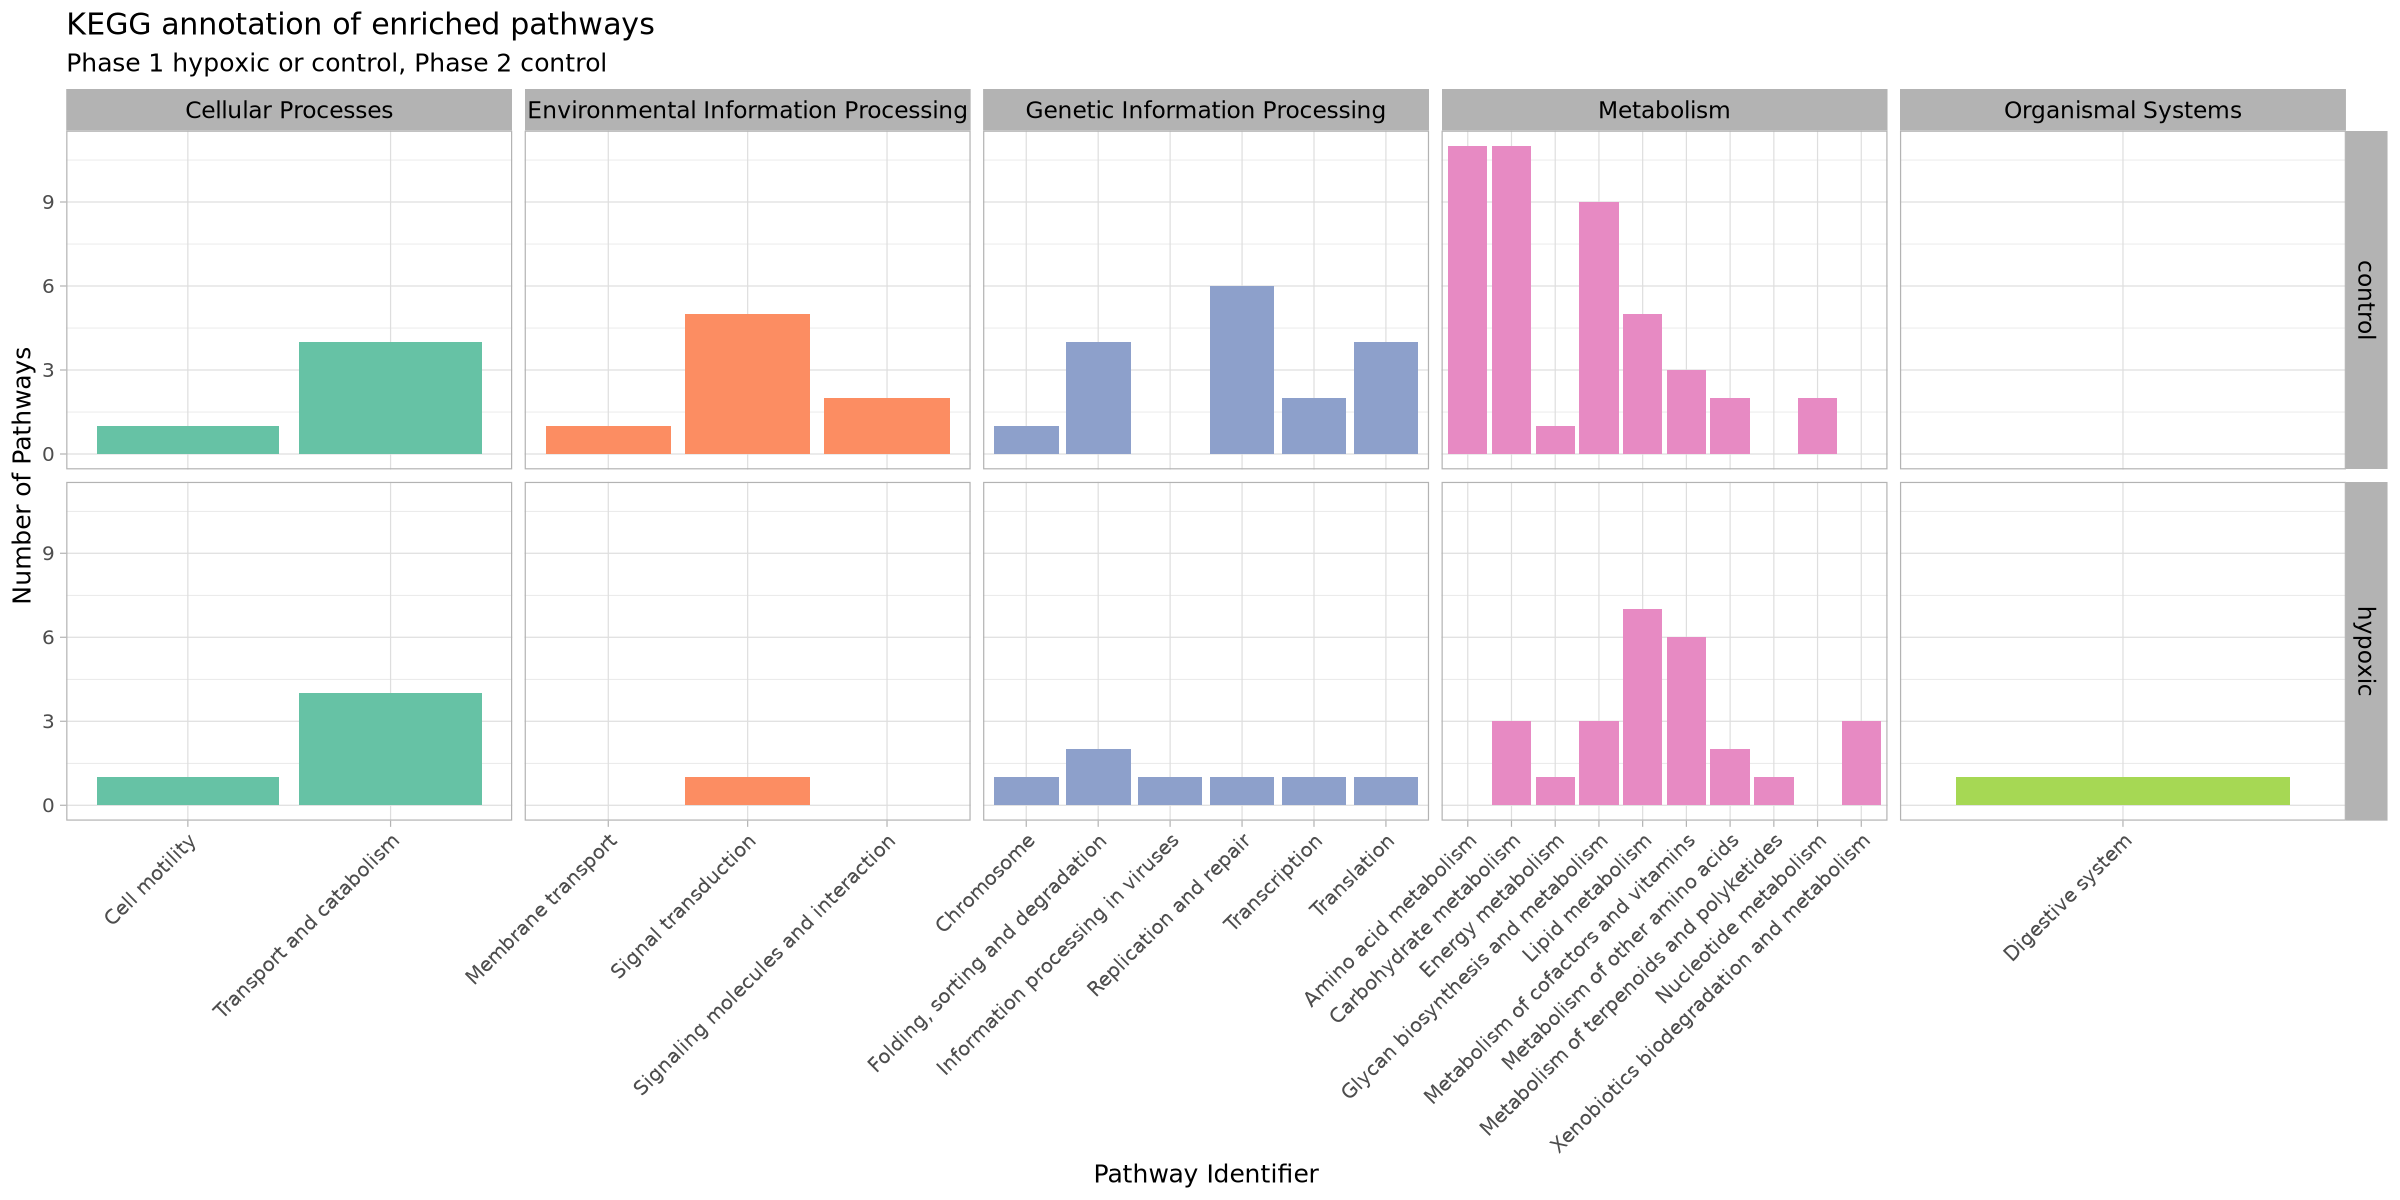

In [67]:
p2c_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 1 hypoxic or control, Phase 2 control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p2c_ce_kegg_plot

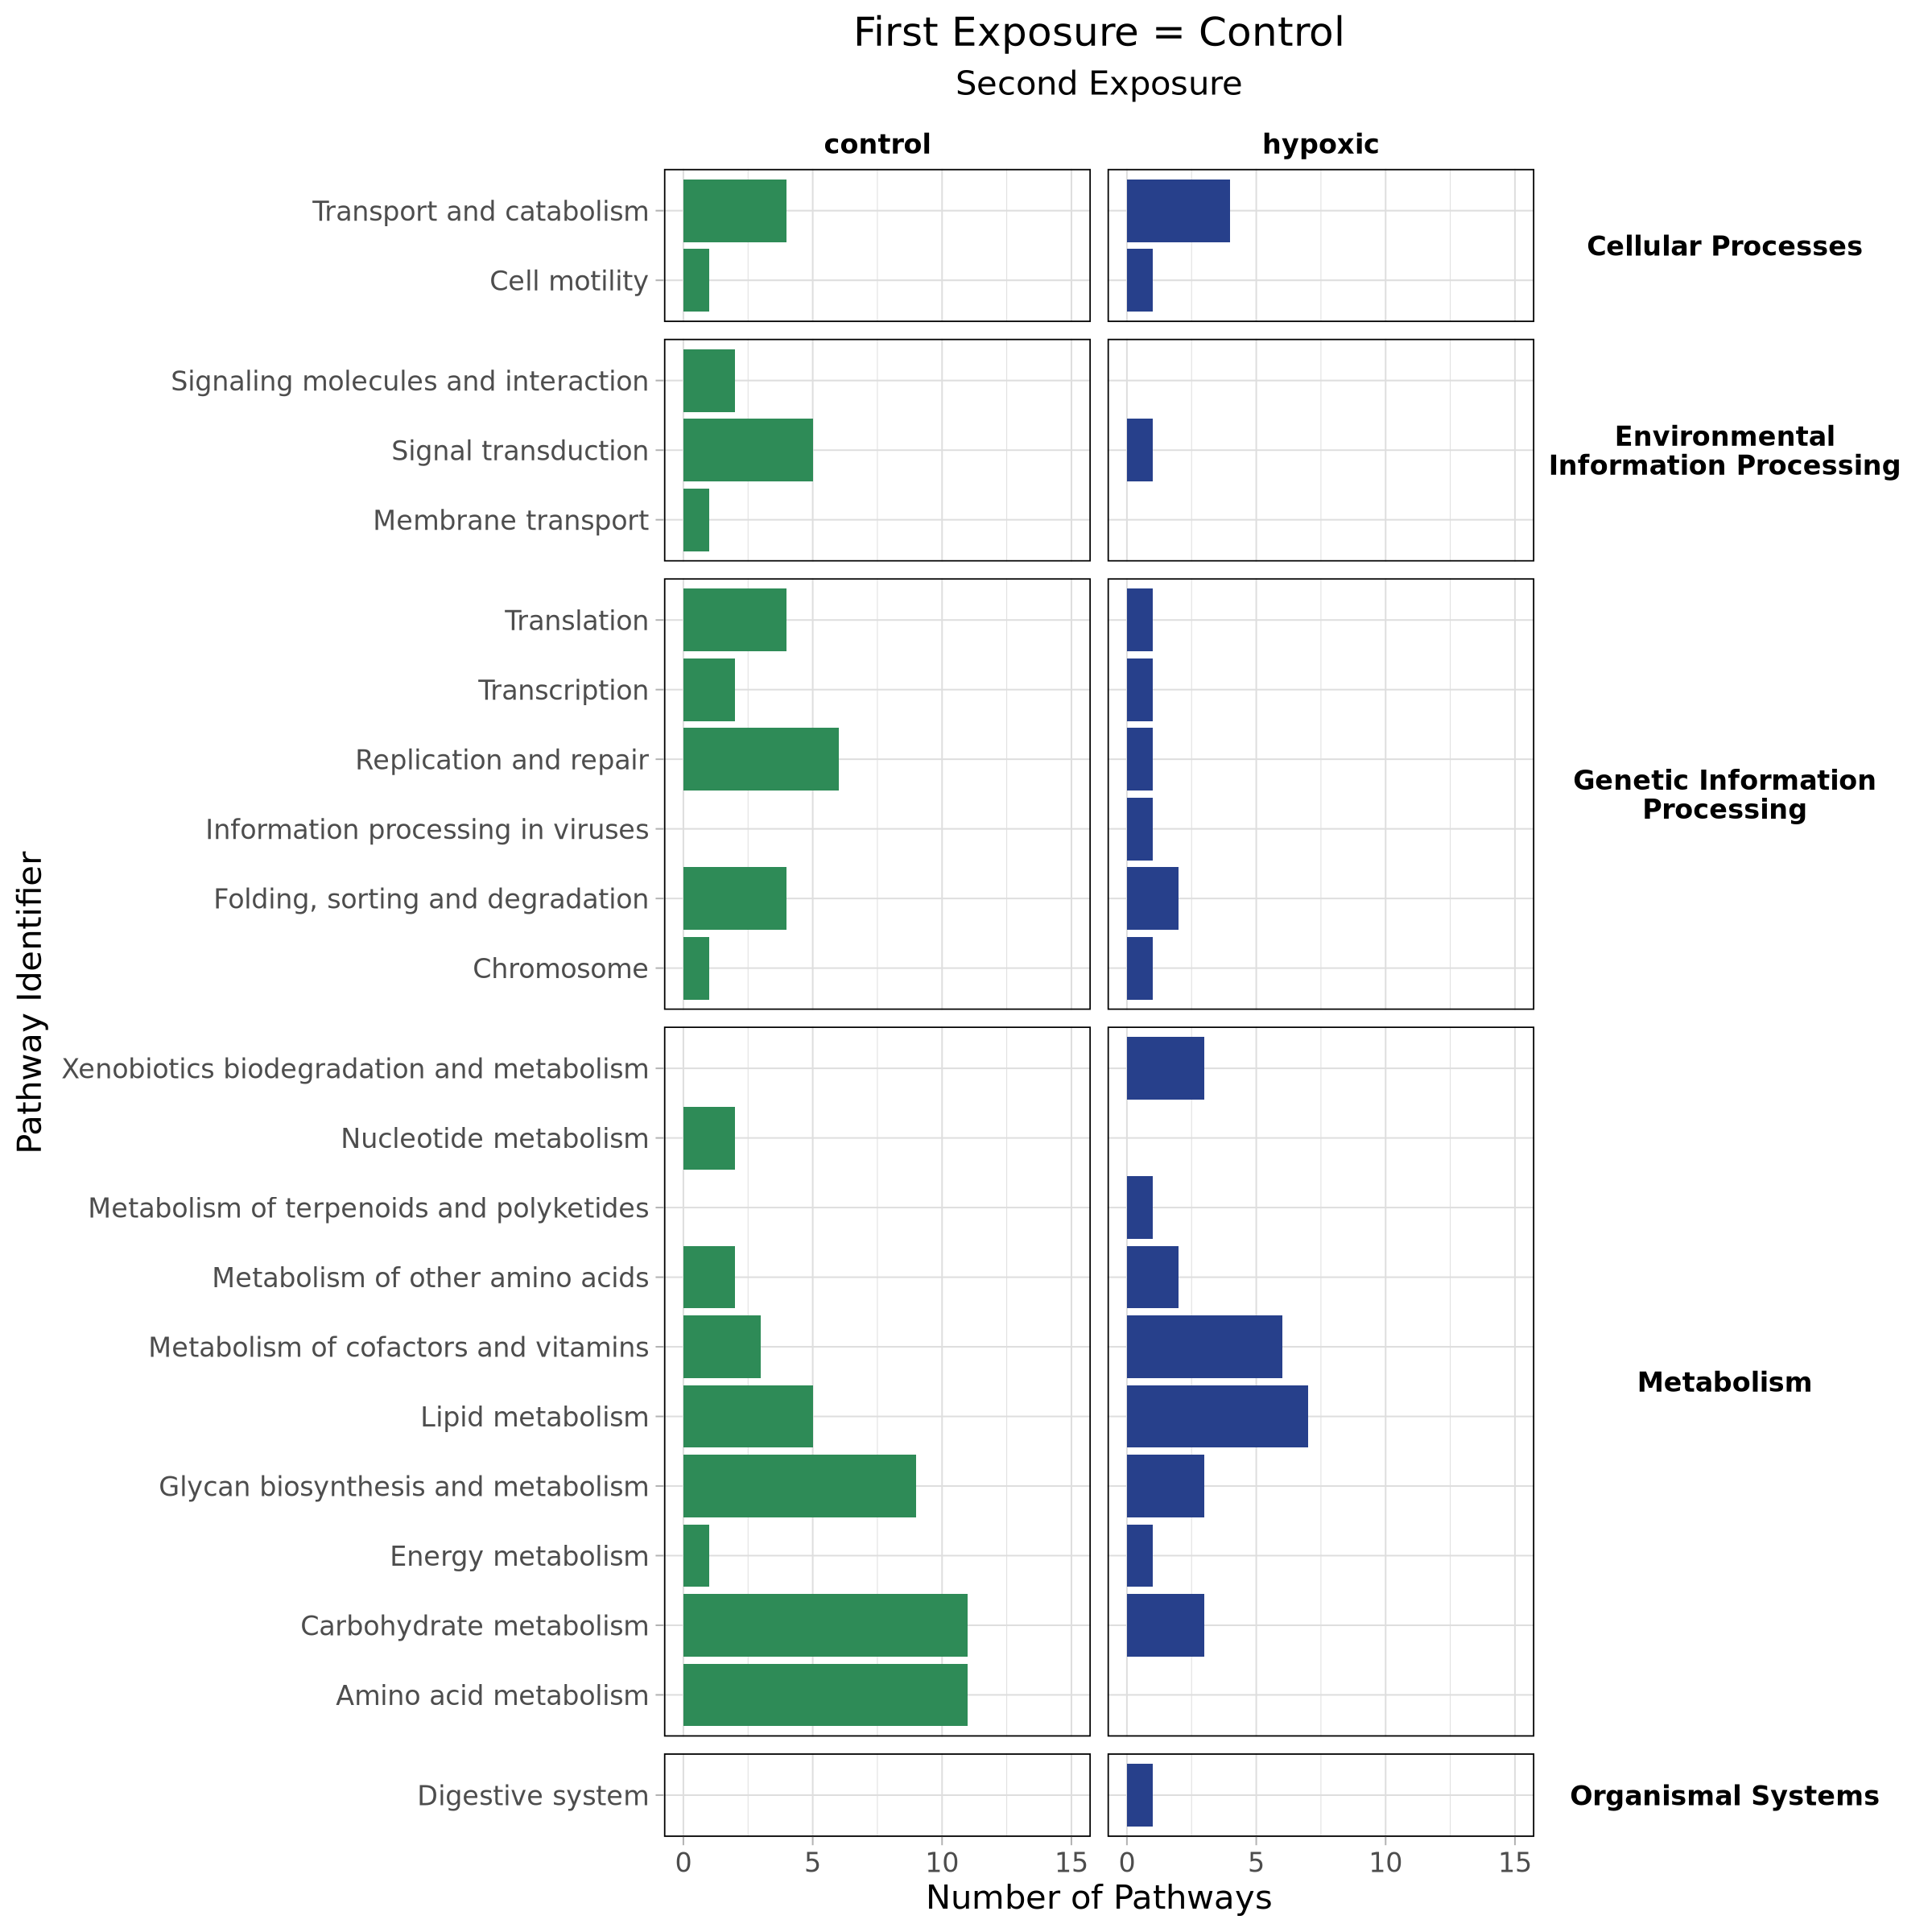

In [68]:
# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=20, repr.plot.height=20)

# changing color scheme

p2c_ce_kegg_plot <- ggplot(data= df2, aes(y = DetailedPathway, fill = direction)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_fill_manual(values = c('seagreen4', 'royalblue4')) + 
theme(strip.text = element_text(size = 14, color = "black")) +
facet_grid(GeneralPathway~direction, 
           scales='free_y', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_x_continuous(limits = c(0,15)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(size=20),
      plot.subtitle = element_text(hjust = 0.5),
      plot.title = element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) +
labs(subtitle = 'Second Exposure', x = 'Number of Pathways', title = 'First Exposure = Control', 
    y = 'Pathway Identifier')

p2c_ce_kegg_plot

not sure what to make of this... (but also remember these weren't filtered for lfc)

In [69]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p2c_ce_kegg_pathways.pdf', width=20, height=10)

# open plot
p2c_ce_kegg_plot

# close pdf file
dev.off()

png 
  2

## second exposure hypoxia vs. control (ignoring first exposure)

In [91]:
# load in data frame
unfiltered_p1h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p2_ch.csv')

# select only needed columns
unfilter_df <- select(unfiltered_p1h, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
unfilter_df$X <- substr(unfilter_df$X, start = 4, stop = nchar(unfilter_df$X))

# renaming columns
colnames(unfilter_df) <- c('gene', 'lfc', 'padj')

head(unfilter_df)

gene      lfc         padj
1 111120752 -0.17049899 NA  
2 111109452  0.17659462  1  
3 111124802 -0.02461241  1  
4 111101273 -0.14762283  1  
5 111101250  0.02005474  1  
6 111101262  0.03410497  1

In [92]:
# creating numeric vector for kegg object
kegg_gene_list <- unfilter_df$lfc
names(kegg_gene_list) <- unfilter_df$gene

# omitting anything with NA in a cell
kegg_gene_list <- na.omit(kegg_gene_list)

# sort list in descending order
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(kegg_gene_list)
class(kegg_gene_list)

111108235 111131029 111108786 111119407 111116124 111122179 
 1.744852  1.552122  1.413823  1.383288  1.329830  1.324683

[1] "numeric"

In [93]:
kegg_organism = 'cvn'
kk2 <- gseKEGG(geneList = kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.44% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [94]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df,15)

ID       Description                                 setSize
cvn00510 cvn00510 N-Glycan biosynthesis                        33    
cvn00260 cvn00260 Glycine, serine and threonine metabolism     35    
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids      18    
cvn00270 cvn00270 Cysteine and methionine metabolism           43    
cvn03460 cvn03460 Fanconi anemia pathway                       41    
cvn00513 cvn00513 Various types of N-glycan biosynthesis       31    
cvn01240 cvn01240 Biosynthesis of cofactors                   101    
cvn04120 cvn04120 Ubiquitin mediated proteolysis              117    
cvn00330 cvn00330 Arginine and proline metabolism              49    
cvn00670 cvn00670 One carbon pool by folate                    19    
cvn04145 cvn04145 Phagosome                                    57    
cvn04141 cvn04141 Protein processing in endoplasmic reticulum 108    
cvn00450 cvn00450 Selenocompound metabolism                    13    
cvn00910 cvn00910 Nitrogen metabolism                          10    
cvn03430 cvn03430 Mismatch repair                              21    
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00510 -0.5075696      -1.675656 0.004707226 0.3936349 0.3835329 3674
cvn00260  0.5044503       1.655459 0.006533554 0.3936349 0.3835329 2727
cvn01040 -0.5525344      -1.550835 0.024831746 0.3936349 0.3835329 2783
cvn00270  0.4500747       1.546201 0.022921493 0.3936349 0.3835329 1018
cvn03460  0.4427638       1.506452 0.025627156 0.3936349 0.3835329 1401
cvn00513 -0.4600723      -1.488366 0.026025445 0.3936349 0.3835329 3674
cvn01240 -0.3352150      -1.373644 0.015030346 0.3936349 0.3835329 2717
cvn04120  0.3350383       1.352428 0.023513648 0.3936349 0.3835329 3206
cvn00330  0.3974218       1.406262 0.038135342 0.5127085 0.4995507 2395
cvn00670  0.5133531       1.445659 0.064030132 0.7043315 0.6862560 2129
cvn04145  0.3787928       1.373039 0.058601134 0.7043315 0.6862560 1336
cvn04141 -0.2989229      -1.245387 0.076271186 0.7690678 0.7493310 3909
cvn00450  0.5701472       1.422783 0.096969697 0.7922619 0.7719298 2132
cvn00910 -0.5706263      -1.356727 0.120622568 0.7922619 0.7719298 1407
cvn03430  0.4630156       1.336964 0.117870722 0.7922619 0.7719298 1401
         leading_edge                  
cvn00510 tags=58%, list=27%, signal=42%
cvn00260 tags=40%, list=20%, signal=32%
cvn01040 tags=44%, list=21%, signal=35%
cvn00270 tags=23%, list=8%, signal=22% 
cvn03460 tags=24%, list=10%, signal=22%
cvn00513 tags=55%, list=27%, signal=40%
cvn01240 tags=35%, list=20%, signal=28%
cvn04120 tags=39%, list=24%, signal=30%
cvn00330 tags=29%, list=18%, signal=24%
cvn00670 tags=37%, list=16%, signal=31%
cvn04145 tags=19%, list=10%, signal=17%
cvn04141 tags=42%, list=29%, signal=30%
cvn00450 tags=46%, list=16%, signal=39%
cvn00910 tags=60%, list=10%, signal=54%
cvn03430 tags=29%, list=10%, signal=26%
         core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                                                            
cvn00510 111118581/111111013/111119558/111134828/111101197/111101820/111125632/111124498/111136555/111108423/111124588/111125283/111128282/111100575/111122131/111121994/111126213/111136571/111137033                                                                                                                                                                                                                                                                              
cvn00260 111122141/111137062/111125218/111109454/111100724/111131063/111119088/111106299/111128625/111130726/111106392/111116065/111123773/111119746           

In [95]:
# removes extra info on description column
kk2@result$Description <- gsub(pattern = " - Crassostrea virginica (eastern oyster)", 
                                 replacement = "", kk2@result$Description, fixed = T)
head(kk2)

ID       Description                              setSize
cvn00510 cvn00510 N-Glycan biosynthesis                    33     
cvn00260 cvn00260 Glycine, serine and threonine metabolism 35     
cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  18     
cvn00270 cvn00270 Cysteine and methionine metabolism       43     
cvn03460 cvn03460 Fanconi anemia pathway                   41     
cvn00513 cvn00513 Various types of N-glycan biosynthesis   31     
         enrichmentScore NES       pvalue      p.adjust  qvalue    rank
cvn00510 -0.5075696      -1.675656 0.004707226 0.3936349 0.3835329 3674
cvn00260  0.5044503       1.655459 0.006533554 0.3936349 0.3835329 2727
cvn01040 -0.5525344      -1.550835 0.024831746 0.3936349 0.3835329 2783
cvn00270  0.4500747       1.546201 0.022921493 0.3936349 0.3835329 1018
cvn03460  0.4427638       1.506452 0.025627156 0.3936349 0.3835329 1401
cvn00513 -0.4600723      -1.488366 0.026025445 0.3936349 0.3835329 3674
         leading_edge                  
cvn00510 tags=58%, list=27%, signal=42%
cvn00260 tags=40%, list=20%, signal=32%
cvn01040 tags=44%, list=21%, signal=35%
cvn00270 tags=23%, list=8%, signal=22% 
cvn03460 tags=24%, list=10%, signal=22%
cvn00513 tags=55%, list=27%, signal=40%
         core_enrichment                                                                                                                                                                              
cvn00510 111118581/111111013/111119558/111134828/111101197/111101820/111125632/111124498/111136555/111108423/111124588/111125283/111128282/111100575/111122131/111121994/111126213/111136571/111137033
cvn00260 111122141/111137062/111125218/111109454/111100724/111131063/111119088/111106299/111128625/111130726/111106392/111116065/111123773/111119746                                                  
cvn01040 111129331/111119054/111107112/111136066/111131209/111136438/111119293/111129730                                                                                                              
cvn00270 111122141/111137596/111135192/111100699/111129934/111130865/111122163/111136621/111133693/111110831                                                                                          
cvn03460 111122179/111119232/111128124/111131048/111126926/111136867/111113980/111133998/111129379/111118905                                                                                          
cvn00513 111118581/111111013/111133398/111119558/111134828/111101197/111101820/111119322/111136555/111108423/111124588/111131384/111125283/111128282/111100575/111126213/111136571

In [96]:
# saving enriched pathways info into csv file to further investigate 
write.csv(kk2, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2_only_pathways.csv')

## Connecting KEGG ID to Pathway Info
From gseKEGG and in the kk2 dataframe, we can these KEGG IDs cvn##### - these correspond to the specific KEGG pathway. KEGG has hierarchel pathways, and it's useful to know what broader pathway our pathway might belong too (metabolism? organismal systems? etc...) so from help with ChatGPT, you can have R go to the URL link with info from the KEGG ID, read the line with 'CLASS' and interpret that to form new columns including our general pathway and more detailed pathway.

I've turned the code below into markdown text - runs for a long time, so after first run you should save the data frame as a csv to be able to call it when you run this again.

**function to get pathway meta data from URL link:**


```
# generated with help of ChatGPT
# Function to get pathway names
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```

**adding pathway meta data to data frame**

```
# generated with help of ChatGPT
# Sample dataframe with KEGG IDs
gseKEGG_df <- select(kk2_df, ID, Description, enrichmentScore)

# Function to apply to each KEGG ID in the dataframe
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

# Combine pathway info into a dataframe
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

# Combine pathway info with original dataframe
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

# Rename columns for clarity
#colnames(gseKEGG_df) <- c("KEGG_ID", "General_Pathway", "Detailed_Pathway")

# Print the dataframe
head(as.data.frame(gseKEGG_df))
```

now need to **clean up data frame**

```
df <- as.data.frame(gseKEGG_df)
# cleaning up GeneralPathway column to only include the pathway name and not CLASS
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

# also changing DetailedPathway into character instead of list to be able to write csv
df$DetailedPathway <- as.character(df$DetailedPathway)

head(df)
```

```
# write csv file
write.csv(df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2only_kegg_pathway.csv')
```

In [102]:
# after running above code once, can just call df from csv file
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/enriched_pathways/p2only_kegg_pathway.csv')

### ggplot of pathways
With this information/meta data on the pathways, I want to do some analysis and try to generate some barplots/histograms

In [103]:
# taking out NAs
df2 <- filter(df, df$GeneralPathway!='NA')

In [104]:
options(repr.plot.width=20, repr.plot.height=10)

now want to add directionality... the above plot has both warm and control pathways put together, so want to separate those out

In [114]:
# making sure R see enrichment score as a number
df2$enrichmentScore <- as.numeric(df2$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
df2$direction <- ifelse(df2$enrichmentScore<0, "control", #neg ES = pathway for control
        ifelse(df2$enrichmentScore>0, "hypoxic", # pos ES = pathway for hypoxia
        "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

X        ID       Description                              enrichmentScore
1 cvn00510 cvn00510 N-Glycan biosynthesis                    -0.5075696     
2 cvn00260 cvn00260 Glycine, serine and threonine metabolism  0.5044503     
3 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  -0.5525344     
4 cvn00270 cvn00270 Cysteine and methionine metabolism        0.4500747     
5 cvn03460 cvn03460 Fanconi anemia pathway                    0.4427638     
6 cvn00513 cvn00513 Various types of N-glycan biosynthesis   -0.4600723     
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Glycan biosynthesis and metabolism control  
2 Metabolism                     Amino acid metabolism              hypoxic  
3 Metabolism                     Lipid metabolism                   control  
4 Metabolism                     Amino acid metabolism              hypoxic  
5 Genetic Information Processing Replication and repair             hypoxic  
6 Metabolism                     Glycan biosynthesis and metabolism control  
  exposure       
1 Second Exposure
2 Second Exposure
3 Second Exposure
4 Second Exposure
5 Second Exposure
6 Second Exposure

creating another ggplot, but this time adding phase variable to the facet grid so we can see what pathways were methylated for each phase

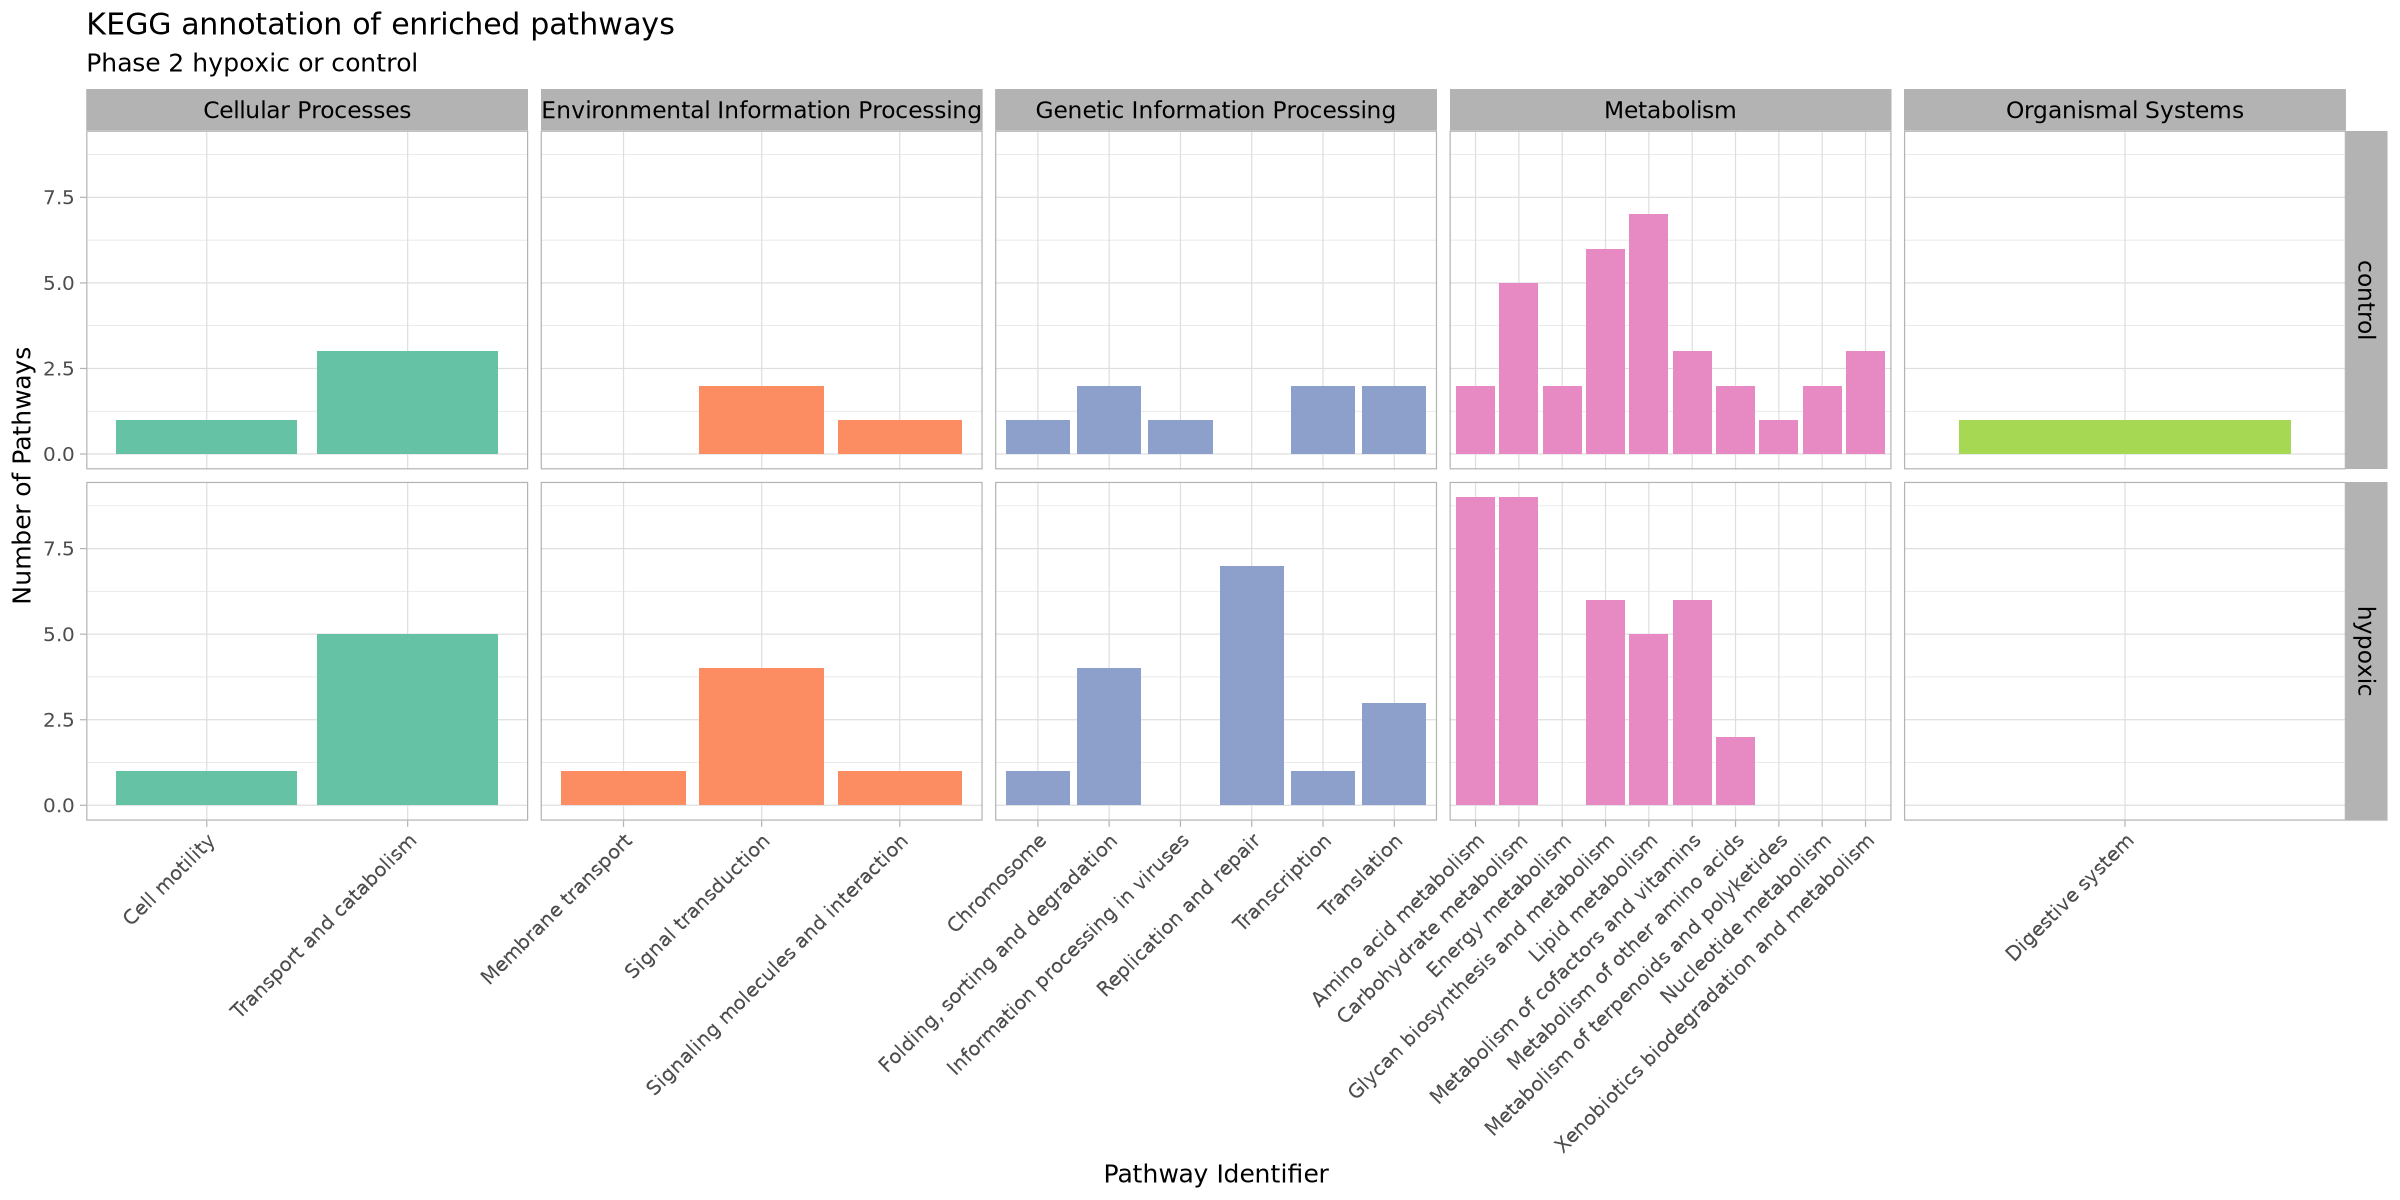

In [107]:
p1h_ce_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway)) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=15) + 
theme(strip.text = element_text(size = 14, color = "black")) +
scale_fill_brewer(palette = 'Set2') +
facet_grid(direction~GeneralPathway, scales='free_x') +
theme(axis.text.x = element_text(angle = 45, hjust=1)) +
labs(title = 'KEGG annotation of enriched pathways', subtitle = 'Phase 2 hypoxic or control', y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1h_ce_kegg_plot

In [112]:
strip1 <- strip_themed(background_y = elem_list_rect(fill = c("violetred1",'darkorange2')), clip='off')

strip2 <- strip_themed(by_layer_x=TRUE, clip='off')

In [109]:
# bc all had a first exposure of hypoxia here
df2$exposure <- 'Second Exposure'
head(df2)

X        ID       Description                              enrichmentScore
1 cvn00510 cvn00510 N-Glycan biosynthesis                    -0.5075696     
2 cvn00260 cvn00260 Glycine, serine and threonine metabolism  0.5044503     
3 cvn01040 cvn01040 Biosynthesis of unsaturated fatty acids  -0.5525344     
4 cvn00270 cvn00270 Cysteine and methionine metabolism        0.4500747     
5 cvn03460 cvn03460 Fanconi anemia pathway                    0.4427638     
6 cvn00513 cvn00513 Various types of N-glycan biosynthesis   -0.4600723     
  GeneralPathway                 DetailedPathway                    direction
1 Metabolism                     Glycan biosynthesis and metabolism control  
2 Metabolism                     Amino acid metabolism              hypoxic  
3 Metabolism                     Lipid metabolism                   control  
4 Metabolism                     Amino acid metabolism              hypoxic  
5 Genetic Information Processing Replication and repair             hypoxic  
6 Metabolism                     Glycan biosynthesis and metabolism control  
  exposure       
1 Second Exposure
2 Second Exposure
3 Second Exposure
4 Second Exposure
5 Second Exposure
6 Second Exposure

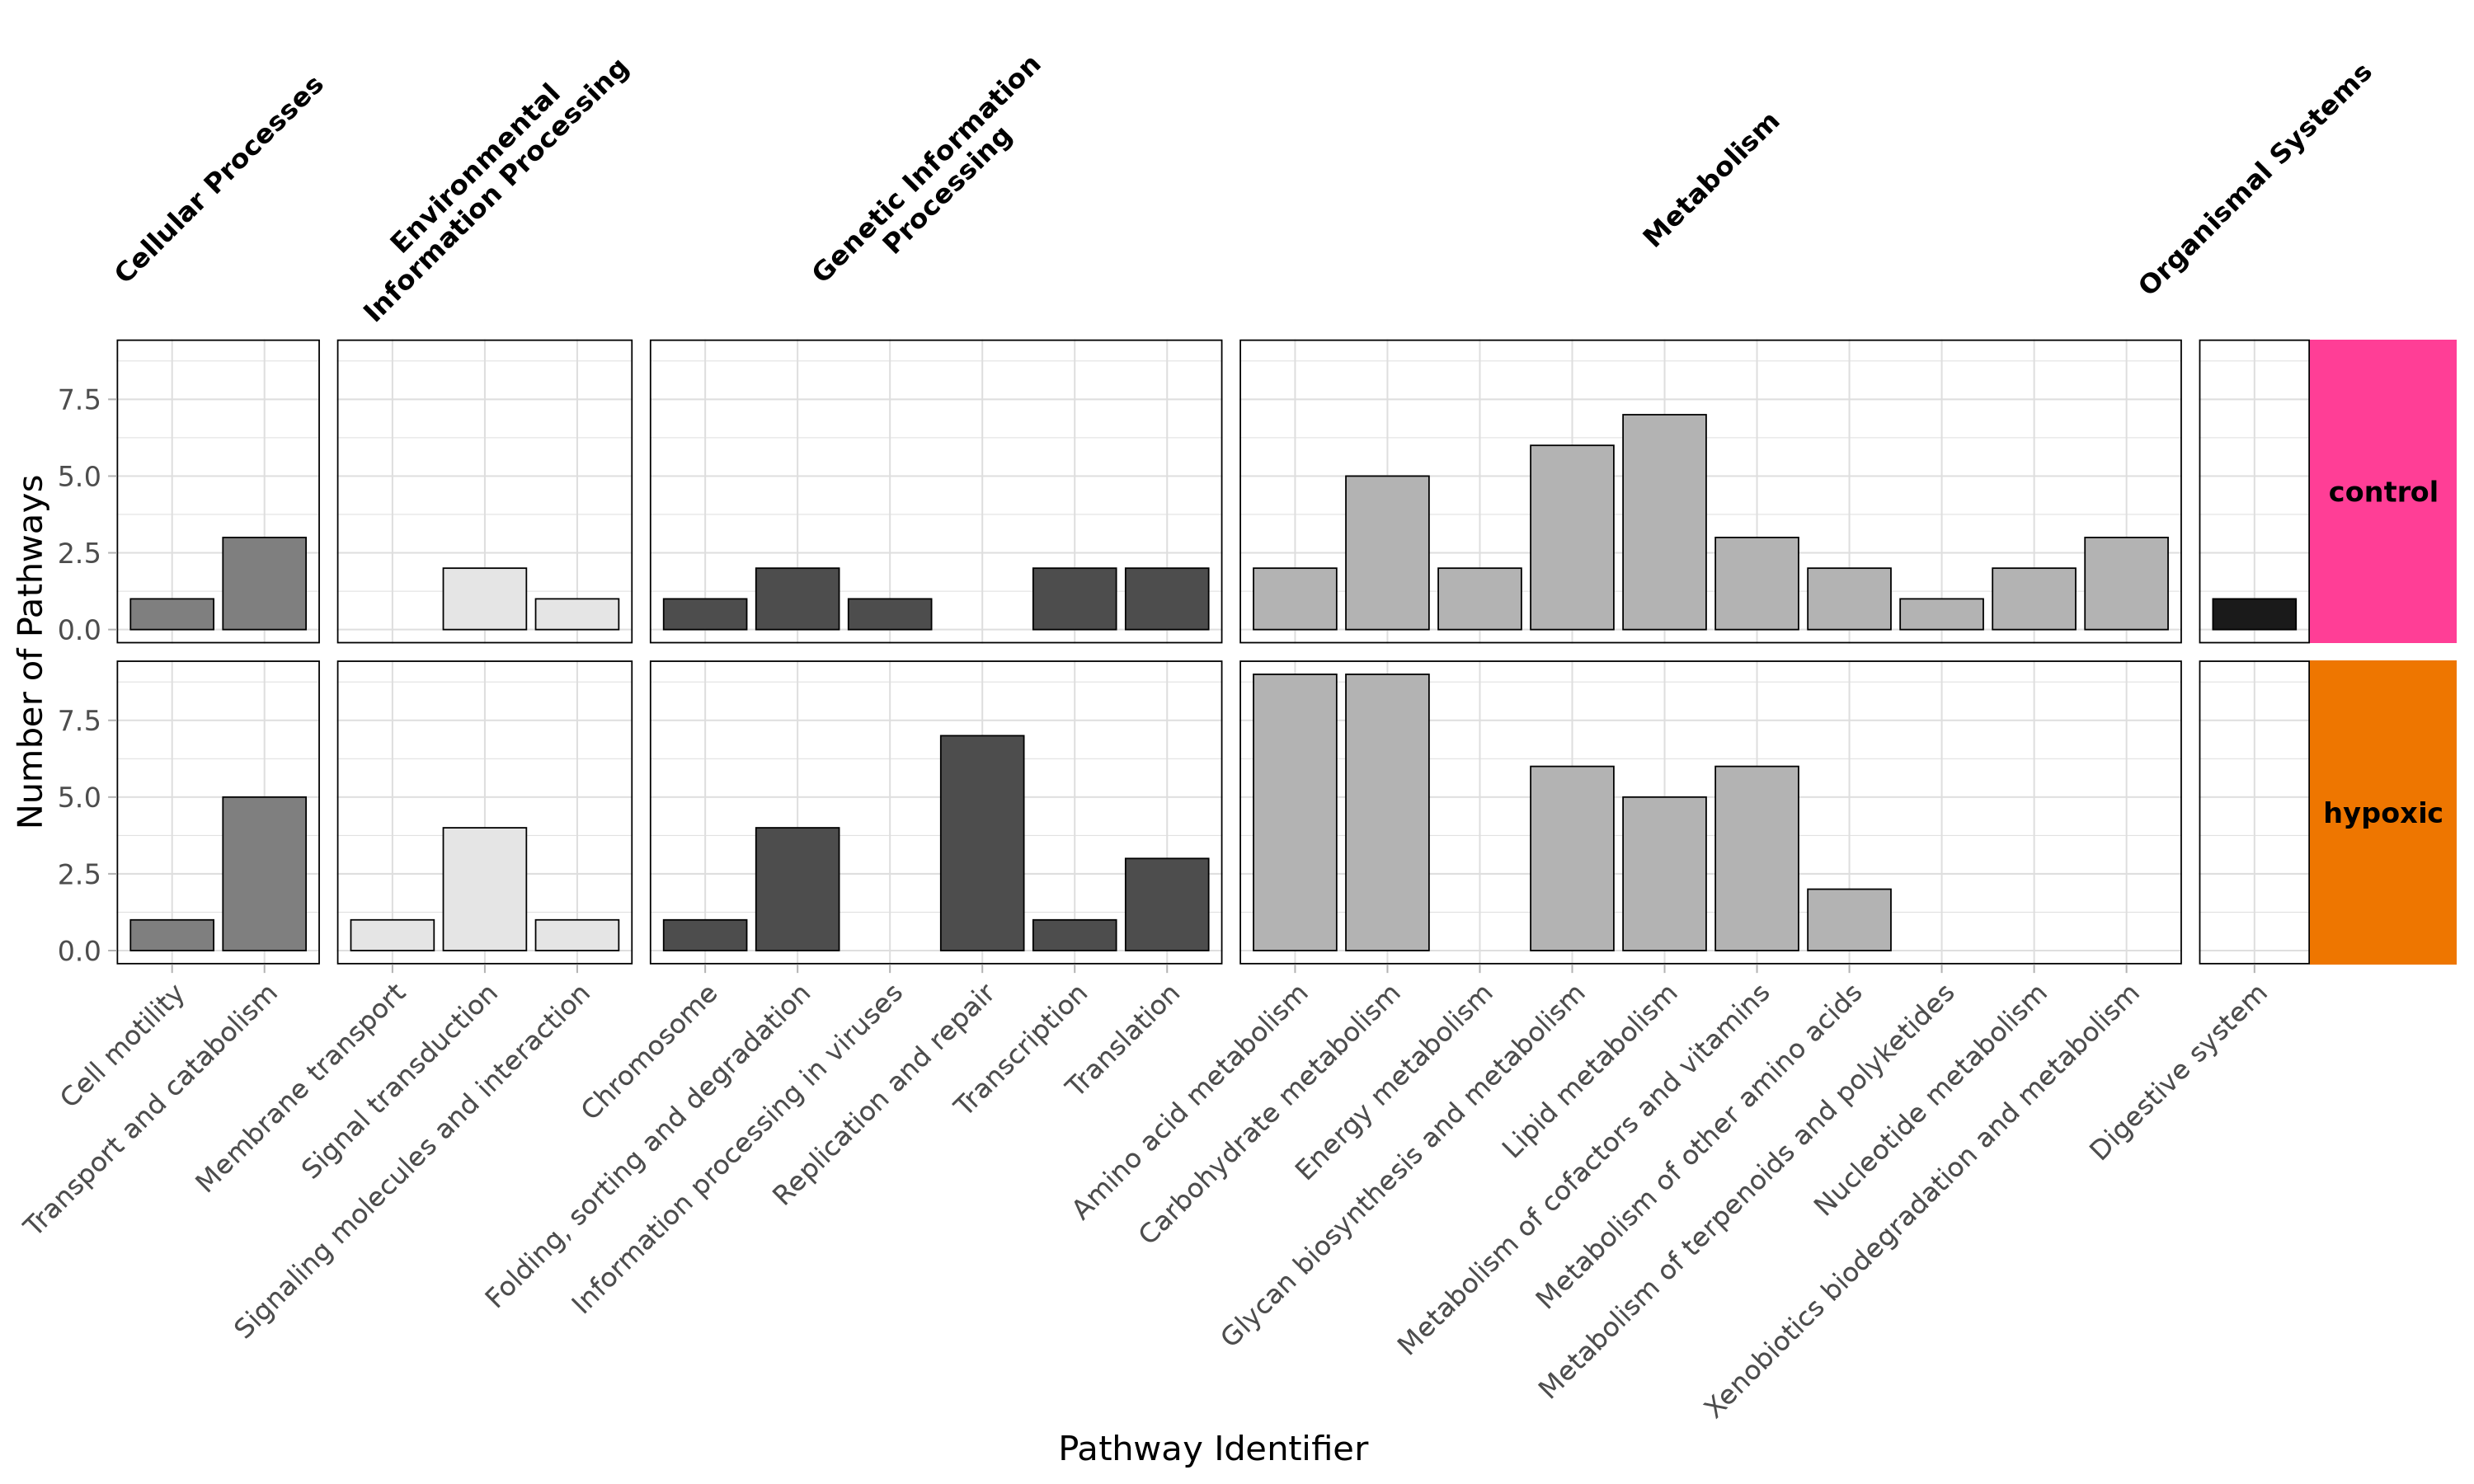

In [115]:
# horizontal, but color with gray scale

# trying to take that plot above and flip the faceting so control/warm is on top
options(repr.plot.width=25, repr.plot.height=15)

# changing color scheme

p1_wc_kegg_plot <- ggplot(data= df2, aes(x = DetailedPathway, fill = GeneralPathway, col = 'black')) +
geom_bar(show.legend=FALSE) + 
#coord_flip() +
theme_light(base_size=25) + 
scale_color_manual(values = c('black','black','black','black','black')) +
scale_fill_manual(values = c('grey50', 'grey90', 'grey30', 'grey70', 'grey10')) +
theme(strip.text = element_text(size = 14),
      strip.text.x = element_text(color = 'black'),
     strip.text.y = element_text(color = 'black')) +
facet_grid2(direction~GeneralPathway, 
           scales='free_x', # deletes unused y axis labels
           space = 'free', # keeps the bars the same width
           strip=strip1,
           labeller = label_wrap_gen(multi_line = TRUE)) +
theme(strip.text.y.right = element_text(angle = 0, size=20),
      axis.text.x = element_text(angle = 45, hjust = 1),
      strip.text = element_text(face = 'bold'),
      strip.text.x = element_text(angle=45, size=20),
      plot.subtitle = element_text(hjust = 0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      strip.clip = 'off',
     strip.background = element_rect('transparent')) +
labs(y = 'Number of Pathways', 
    x = 'Pathway Identifier')

p1_wc_kegg_plot